**1- Data Exploration**

**1.1. Univariate analysis**

In [1]:
import pandas as pd

base_df = pd.read_csv('train_data.csv')
base_df.head(2)

C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_30780\2325785726.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  base_df = pd.read_csv('train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


In [2]:
# Display data types for each column in the dataframe
print(base_df.dtypes)

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

In [3]:
# Display descriptive statistics for numerical columns
base_df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [4]:
# Select categorical columns and display unique value counts for each
categorical_columns = base_df.select_dtypes(include='object').columns

# Display unique value counts for each categorical column
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(base_df[col].value_counts(dropna=False))  # Include NaNs in count
    print("\n" + "-"*50 + "\n")

Value counts for Accident Date:
Accident Date
NaN           23134
2020-03-01     1245
2020-12-18     1001
2022-02-07      977
2022-01-05      883
              ...  
2017-05-17        1
2015-05-28        1
2002-08-18        1
2017-09-01        1
1980-05-17        1
Name: count, Length: 5540, dtype: int64

--------------------------------------------------

Value counts for Alternative Dispute Resolution:
Alternative Dispute Resolution
N      571412
NaN     19445
Y        2609
U           5
Name: count, dtype: int64

--------------------------------------------------

Value counts for Assembly Date:
Assembly Date
2020-03-06    1422
2021-05-11    1386
2022-04-01    1256
2022-02-04    1217
2022-08-15    1170
              ... 
2022-07-31      10
2021-12-19      10
2020-08-23      10
2020-07-04      10
2022-05-08      10
Name: count, Length: 1096, dtype: int64

--------------------------------------------------

Value counts for Attorney/Representative:
Attorney/Representative
N      39229

WCIO Part Of Body Description
LOWER BACK AREA                                          51862
KNEE                                                     47903
MULTIPLE                                                 42011
SHOULDER(S)                                              37811
NaN                                                      36527
FINGER(S)                                                36093
HAND                                                     31388
ANKLE                                                    24928
MULTIPLE BODY PARTS (INCLUDING BODY                      22608
SOFT TISSUE                                              19703
FOOT                                                     18765
WRIST                                                    18750
LOWER ARM                                                15372
LUNGS                                                    14000
EYE(S)                                                   12975
THUMB                    

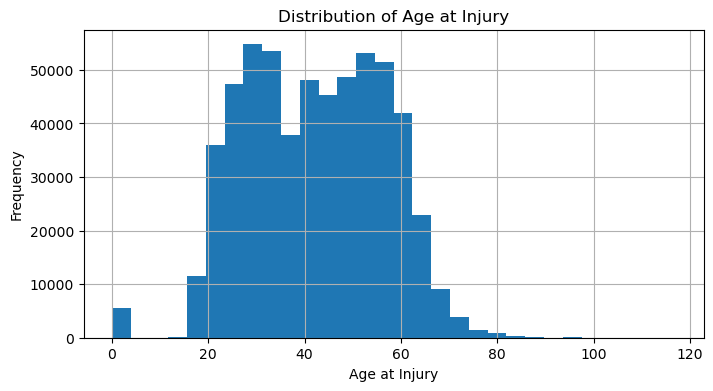

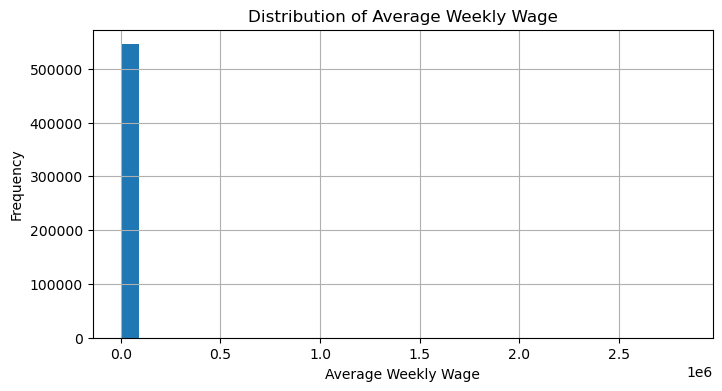

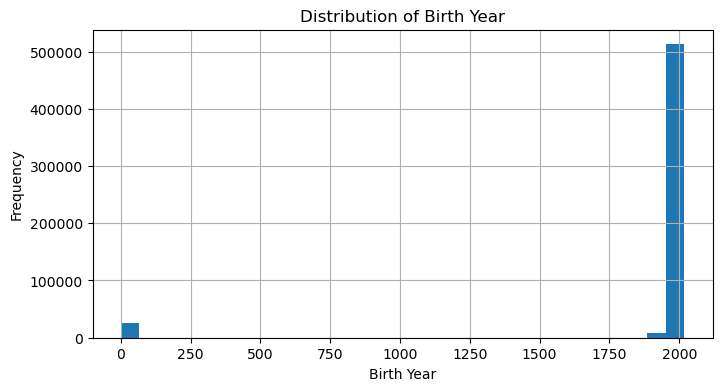

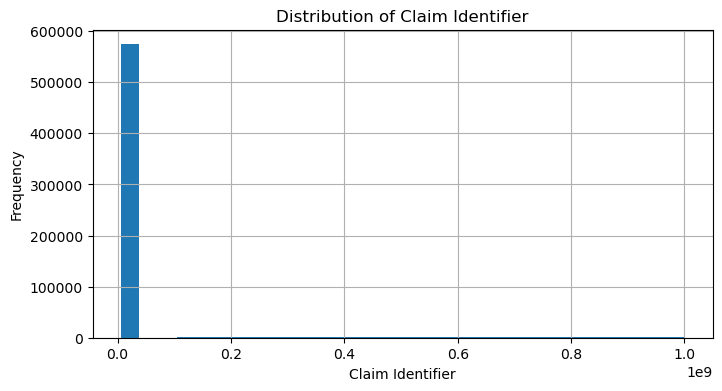

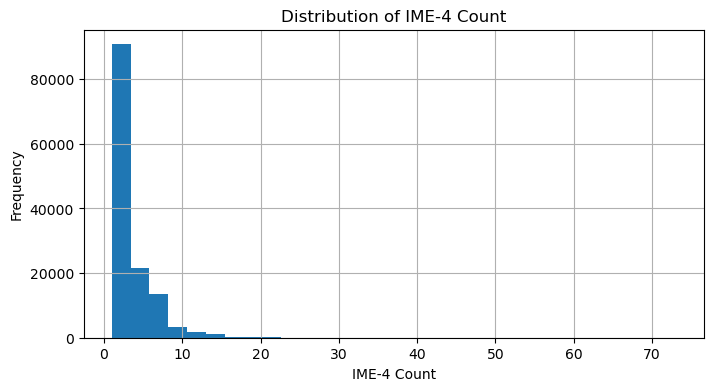

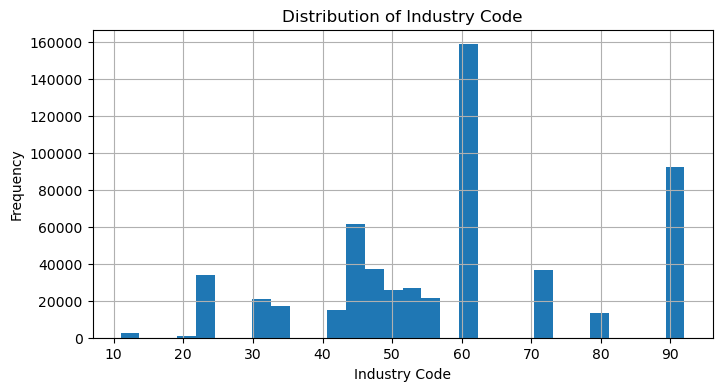

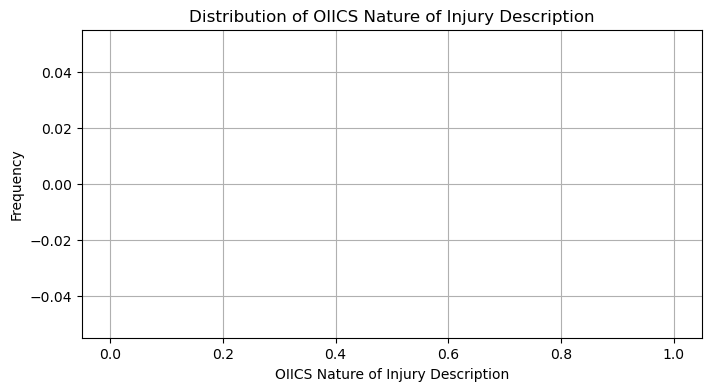

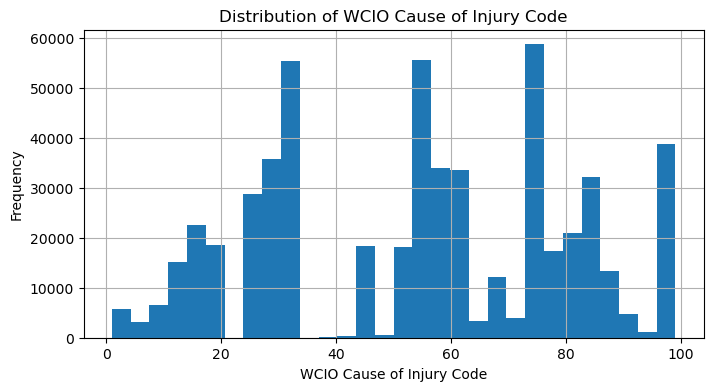

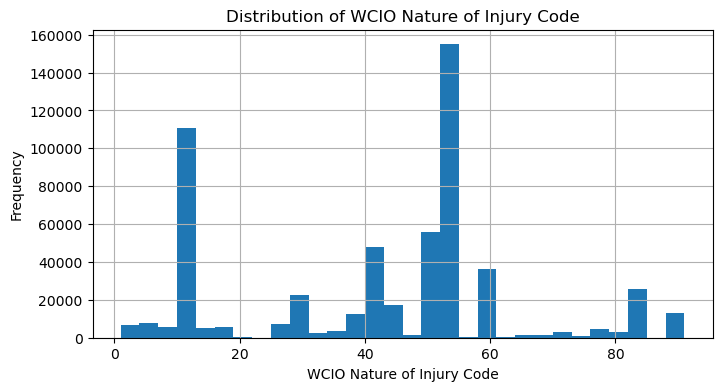

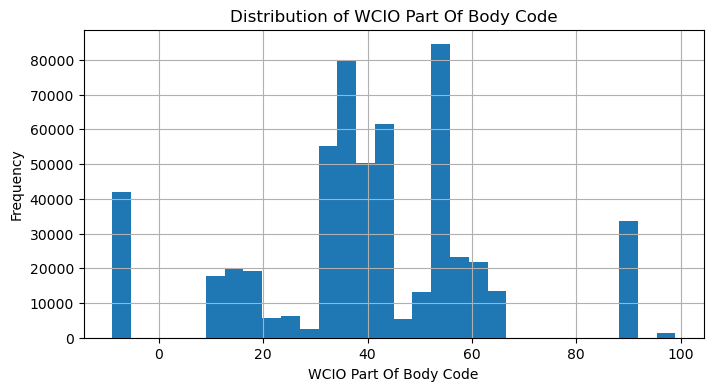

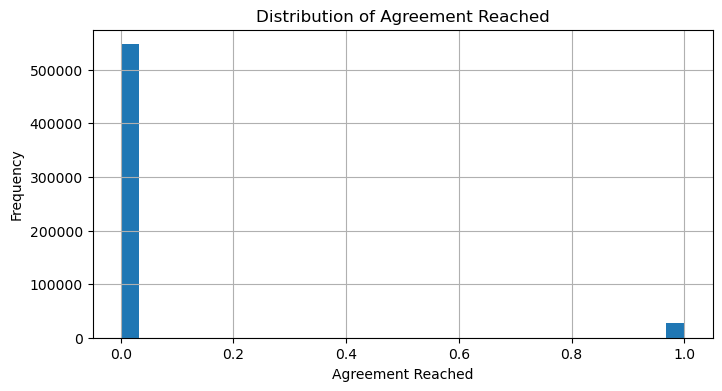

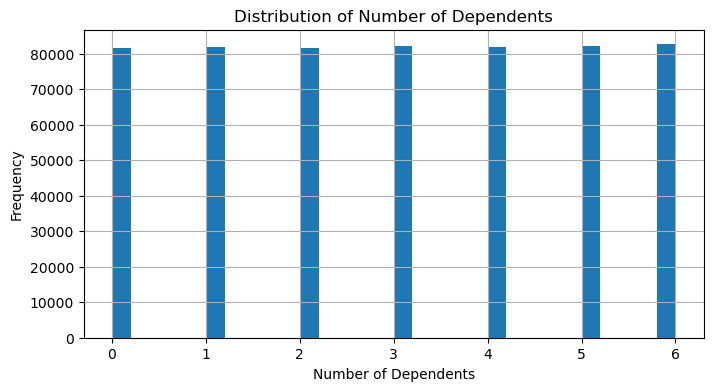

In [5]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = base_df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    base_df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
# Calculate missing values by column
missing_values = base_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
OIICS Nature of Injury Description    593471
IME-4 Count                           460668
First Hearing Date                    442673
C-3 Date                              406226
Birth Year                             48523
Average Weekly Wage                    48096
Zip Code                               48082
WCIO Part Of Body Description          36527
WCIO Part Of Body Code                 36527
WCIO Nature of Injury Description      35102
WCIO Nature of Injury Code             35102
WCIO Cause of Injury Code              35085
WCIO Cause of Injury Description       35085
C-2 Date                               34005
Industry Code                          29403
Industry Code Description              29403
Accident Date                          23134
Agreement Reached                      19445
WCB Decision                           19445
Gender                                 19445
Medical Fee Region                     19445
Age at Injury             

In [7]:
# Calculate missing values ratio by column
missing_values_ratio = base_df.isnull().mean() * 100  # Multiply by 100 to get percentage
missing_values_ratio = missing_values_ratio[missing_values_ratio > 0].sort_values(ascending=False)
print("Columns with missing values (as a percentage):")
print(missing_values_ratio)

Columns with missing values (as a percentage):
OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622664
First Hearing Date                     74.590502
C-3 Date                               68.449174
Birth Year                              8.176137
Average Weekly Wage                     8.104187
Zip Code                                8.101828
WCIO Part Of Body Description           6.154808
WCIO Part Of Body Code                  6.154808
WCIO Nature of Injury Description       5.914695
WCIO Nature of Injury Code              5.914695
WCIO Cause of Injury Code               5.911831
WCIO Cause of Injury Description        5.911831
C-2 Date                                5.729850
Industry Code                           4.954412
Industry Code Description               4.954412
Accident Date                           3.898084
Agreement Reached                       3.276487
WCB Decision                            3.276487
Gender                

In [8]:
#base_df['OIICS Nature of Injury Description']
#base_df['IME-4 Count']
#base_df['First Hearing Date']
#base_df['C-3 Date']

In [9]:
# Select categorical columns
categorical_columns = base_df.select_dtypes(include='object').columns

# Calculate the ratio of each value for each categorical variable
for col in categorical_columns:
    print(f"Value ratios for {col}:")
    value_ratios = base_df[col].value_counts(normalize=True, dropna=False) * 100  # Convert to percentage
    print(value_ratios)
    print("\n" + "-"*50 + "\n")

Value ratios for Accident Date:
Accident Date
NaN           3.898084
2020-03-01    0.209783
2020-12-18    0.168669
2022-02-07    0.164625
2022-01-05    0.148786
                ...   
2017-05-17    0.000169
2015-05-28    0.000169
2002-08-18    0.000169
2017-09-01    0.000169
1980-05-17    0.000169
Name: proportion, Length: 5540, dtype: float64

--------------------------------------------------

Value ratios for Alternative Dispute Resolution:
Alternative Dispute Resolution
N      96.283053
NaN     3.276487
Y       0.439617
U       0.000843
Name: proportion, dtype: float64

--------------------------------------------------

Value ratios for Assembly Date:
Assembly Date
2020-03-06    0.239607
2021-05-11    0.233541
2022-04-01    0.211636
2022-02-04    0.205065
2022-08-15    0.197145
                ...   
2022-07-31    0.001685
2021-12-19    0.001685
2020-08-23    0.001685
2020-07-04    0.001685
2022-05-08    0.001685
Name: proportion, Length: 1096, dtype: float64

--------------------

In [10]:
# Display the value counts and ratios for the target variable
target_col = 'Claim Injury Type'
print(f"Value counts for '{target_col}':")
print(base_df[target_col].value_counts())

print("\nPercentage distribution for each category in '{target_col}':")
print(base_df[target_col].value_counts(normalize=True) * 100)

Value counts for 'Claim Injury Type':
Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

Percentage distribution for each category in '{target_col}':
Claim Injury Type
2. NON-COMP        50.708156
4. TEMPORARY       25.871128
3. MED ONLY        12.003986
5. PPD SCH LOSS     8.410769
1. CANCELLED        2.173595
6. PPD NSL          0.733590
8. DEATH            0.081878
7. PTD              0.016898
Name: proportion, dtype: float64


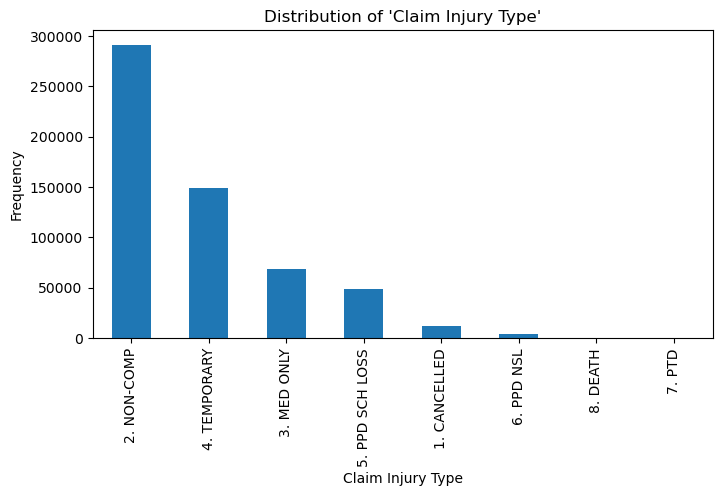

In [11]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
base_df[target_col].value_counts().plot(kind='bar')
plt.title(f"Distribution of '{target_col}'")
plt.xlabel("Claim Injury Type")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Check for missing values in the target column
missing_ratio = base_df[target_col].isnull().mean() * 100
print(f"\nPercentage of missing values in '{target_col}': {missing_ratio:.2f}%")


Percentage of missing values in 'Claim Injury Type': 3.28%


**1.2. Multivariate Analysis**

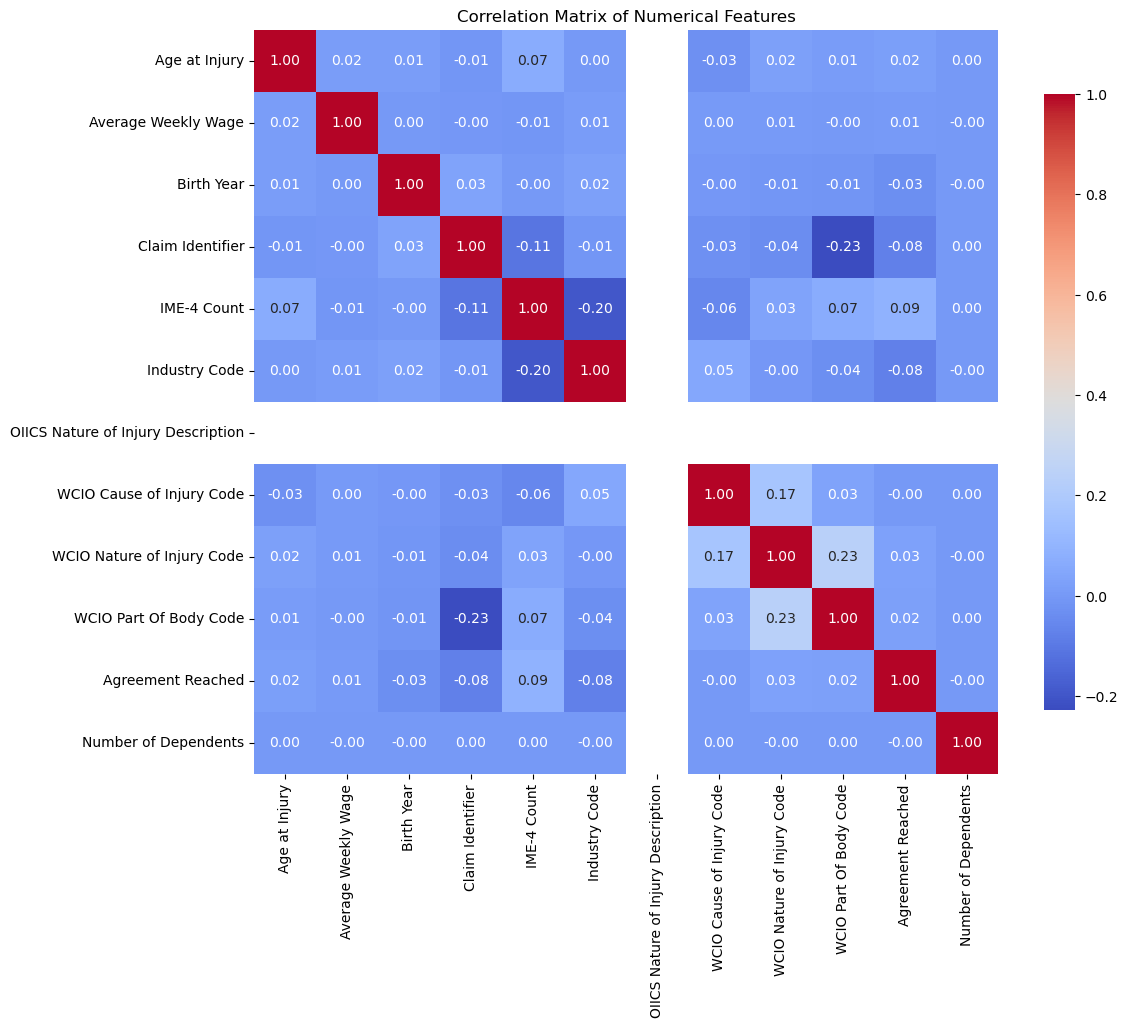

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = base_df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = base_df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [14]:
# Group by Gender and calculate the mean of Average Weekly Wage
gender_wage_stats = base_df.groupby('Gender')['Average Weekly Wage'].mean()
print("Average Weekly Wage by Gender:")
print(gender_wage_stats)

Average Weekly Wage by Gender:
Gender
F    387.795556
M    566.352392
U    264.574615
X    859.978864
Name: Average Weekly Wage, dtype: float64


In [15]:
# Group by Claim Injury Type and calculate the mean age at the time of injury
age_injury_type_stats = base_df.groupby('Claim Injury Type')['Age at Injury'].mean()
print("Average Age at Injury by Claim Injury Type:")
print(age_injury_type_stats)

Average Age at Injury by Claim Injury Type:
Claim Injury Type
1. CANCELLED       38.277631
2. NON-COMP        40.746391
3. MED ONLY        42.469916
4. TEMPORARY       43.590356
5. PPD SCH LOSS    45.643351
6. PPD NSL         48.030397
7. PTD             53.412371
8. DEATH           54.712766
Name: Age at Injury, dtype: float64


In [16]:
# Group by Claim Injury Type and calculate the mean age at the time of injury
age_injury_type_stats = base_df.groupby('Claim Injury Type')['Age at Injury'].mean()
print("Average Age at Injury by Claim Injury Type:")
print(age_injury_type_stats)

Average Age at Injury by Claim Injury Type:
Claim Injury Type
1. CANCELLED       38.277631
2. NON-COMP        40.746391
3. MED ONLY        42.469916
4. TEMPORARY       43.590356
5. PPD SCH LOSS    45.643351
6. PPD NSL         48.030397
7. PTD             53.412371
8. DEATH           54.712766
Name: Age at Injury, dtype: float64


In [17]:
# Group by County of Injury and Claim Injury Type, count the occurrences
county_injury_type_stats = base_df.groupby(['County of Injury', 'Claim Injury Type']).size().unstack(fill_value=0)
print("Claim Injury Type Counts by County:")
county_injury_type_stats

Claim Injury Type Counts by County:


Claim Injury Type,1. CANCELLED,2. NON-COMP,3. MED ONLY,4. TEMPORARY,5. PPD SCH LOSS,6. PPD NSL,7. PTD,8. DEATH
County of Injury,,,,,,,,
ALBANY,208,7448,1899,3126,891,79,3,11
ALLEGANY,24,958,192,412,147,7,1,2
BRONX,1080,19282,4037,11246,3587,361,3,22
BROOME,78,3670,1190,1480,283,17,4,5
CATTARAUGUS,56,1503,293,780,281,18,0,2
...,...,...,...,...,...,...,...,...
WASHINGTON,28,890,269,484,128,7,0,2
WAYNE,25,889,167,401,137,8,0,1
WESTCHESTER,619,13822,2864,6473,1780,167,3,26


In [18]:
# Calculate the proportion of agreements reached by Carrier Type
carrier_agreement_stats = base_df.groupby('Carrier Type')['Agreement Reached'].mean()
print("Agreement Reached Ratio by Carrier Type:")
carrier_agreement_stats

Agreement Reached Ratio by Carrier Type:


Carrier Type
1A. PRIVATE                                    0.061776
2A. SIF                                        0.049674
3A. SELF PUBLIC                                0.005766
4A. SELF PRIVATE                               0.052815
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)    0.000000
5C. SPECIAL FUND - POI CARRIER WCB MENANDS     0.600000
5D. SPECIAL FUND - UNKNOWN                     0.104594
UNKNOWN                                        0.020293
Name: Agreement Reached, dtype: float64

In [19]:
# Group by District Name and calculate the mean of Average Weekly Wage and Age at Injury
district_stats = base_df.groupby('District Name')[['Average Weekly Wage', 'Age at Injury']].mean()
print("Average Weekly Wage and Age at Injury by District Name:")
district_stats


Average Weekly Wage and Age at Injury by District Name:


,Average Weekly Wage,Age at Injury
District Name,,
ALBANY,449.958094,41.731186
BINGHAMTON,340.795867,41.509651
BUFFALO,408.827415,42.026817
HAUPPAUGE,575.442234,43.044767
NYC,542.963080,42.264252
ROCHESTER,321.955504,41.627679
STATEWIDE,760.835440,42.890594
SYRACUSE,428.374328,41.439479


In [20]:
# Convert date columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    base_df[col] = pd.to_datetime(base_df[col], errors='coerce')  # Errors='coerce' handles invalid dates by setting them to NaT

In [21]:
# Calculate the time difference in days between Accident Date and Assembly Date
base_df['Accident_to_Assembly_Days'] = (base_df['Assembly Date'] - base_df['Accident Date']).dt.days

# Group by Claim Injury Type to see average reporting times by injury type
accident_assembly_stats = base_df.groupby('Claim Injury Type')['Accident_to_Assembly_Days'].mean()
print("Average Days from Accident to Assembly by Claim Injury Type:")
accident_assembly_stats

Average Days from Accident to Assembly by Claim Injury Type:


Claim Injury Type
1. CANCELLED       460.843021
2. NON-COMP         65.822805
3. MED ONLY         45.650348
4. TEMPORARY       115.160577
5. PPD SCH LOSS     46.286350
6. PPD NSL          38.630967
7. PTD             139.350515
8. DEATH           130.382979
Name: Accident_to_Assembly_Days, dtype: float64

In [22]:
# Extract month and year from Accident Date
base_df['Accident_Month'] = base_df['Accident Date'].dt.month
base_df['Accident_Year'] = base_df['Accident Date'].dt.year

# Count the number of accidents per month and year
monthly_accidents = base_df.groupby('Accident_Month').size()
yearly_accidents = base_df.groupby('Accident_Year').size()

print("Accidents by Month:")
print(monthly_accidents)
print("\nAccidents by Year:")
print(yearly_accidents)

Accidents by Month:
Accident_Month
1.0     49431
2.0     48295
3.0     51063
4.0     41902
5.0     42831
6.0     47976
7.0     48919
8.0     48950
9.0     48996
10.0    49554
11.0    44759
12.0    47661
dtype: int64

Accidents by Year:
Accident_Year
1961.0         1
1963.0         1
1966.0         2
1967.0         3
1969.0         2
1970.0         1
1971.0         3
1972.0         4
1973.0         7
1974.0         5
1975.0         8
1976.0         3
1977.0         8
1978.0         7
1979.0         4
1980.0        12
1981.0        10
1982.0        10
1983.0        10
1984.0        12
1985.0        10
1986.0         7
1987.0        25
1988.0        46
1989.0        35
1990.0        49
1991.0        46
1992.0        59
1993.0        44
1994.0        65
1995.0        77
1996.0       100
1997.0       112
1998.0       111
1999.0       112
2000.0       148
2001.0       491
2002.0       143
2003.0       138
2004.0       174
2005.0       139
2006.0       149
2007.0       162
2008.0       203
20

In [23]:
# Calculate the time difference in days between Assembly Date and First Hearing Date
base_df['Assembly_to_FirstHearing_Days'] = (base_df['First Hearing Date'] - base_df['Assembly Date']).dt.days

# Group by Claim Injury Type to see average time to first hearing
hearing_delay_stats = base_df.groupby('Claim Injury Type')['Assembly_to_FirstHearing_Days'].mean()
print("Average Days from Assembly to First Hearing by Claim Injury Type:")
hearing_delay_stats

Average Days from Assembly to First Hearing by Claim Injury Type:


Claim Injury Type
1. CANCELLED       171.941230
2. NON-COMP        148.928797
3. MED ONLY        307.694136
4. TEMPORARY       251.995436
5. PPD SCH LOSS    358.043151
6. PPD NSL         308.930778
7. PTD             268.886598
8. DEATH           120.880851
Name: Assembly_to_FirstHearing_Days, dtype: float64

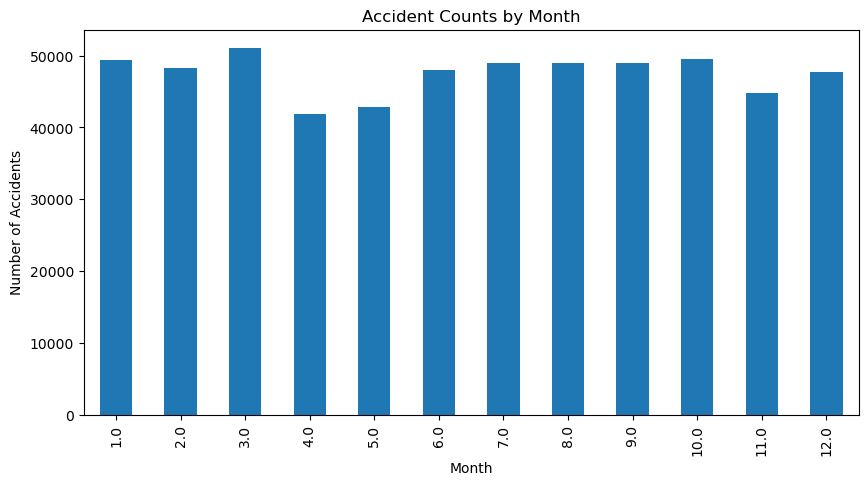

In [24]:
import matplotlib.pyplot as plt

# Plot number of accidents by month
plt.figure(figsize=(10, 5))
monthly_accidents.plot(kind='bar')
plt.title("Accident Counts by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

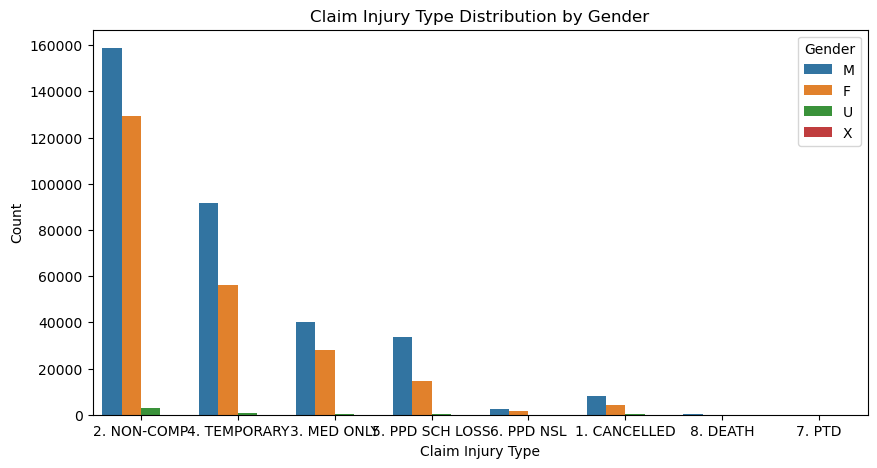

In [25]:
# Bar plot of the count of each Claim Injury Type by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=base_df, x='Claim Injury Type', hue='Gender')
plt.title("Claim Injury Type Distribution by Gender")
plt.xlabel("Claim Injury Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

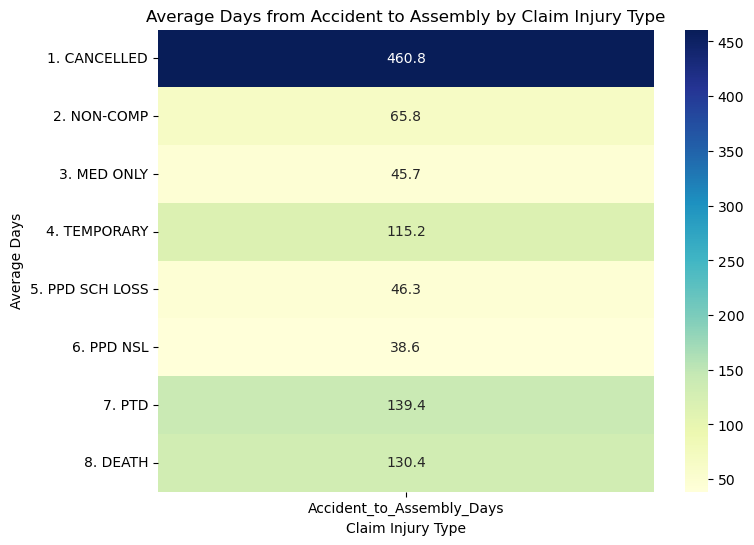

In [26]:
# Calculate the average Accident to Assembly Days by Claim Injury Type
assembly_delay_matrix = base_df.pivot_table(values='Accident_to_Assembly_Days', index='Claim Injury Type', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(assembly_delay_matrix, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average Days from Accident to Assembly by Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Average Days")
plt.show()

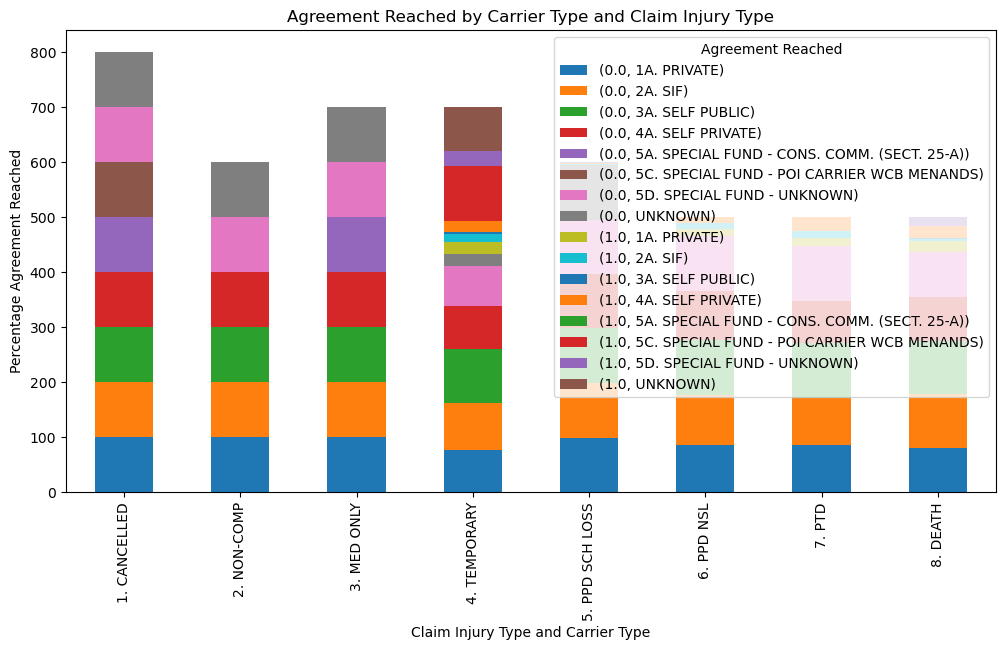

In [27]:
# Create a crosstab for Carrier Type and Agreement Reached by Claim Injury Type
carrier_agreement = pd.crosstab([base_df['Claim Injury Type'], base_df['Carrier Type']], base_df['Agreement Reached'], normalize='index') * 100

# Plot stacked bar chart
carrier_agreement.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Agreement Reached by Carrier Type and Claim Injury Type")
plt.xlabel("Claim Injury Type and Carrier Type")
plt.ylabel("Percentage Agreement Reached")
plt.legend(title="Agreement Reached")
plt.show()

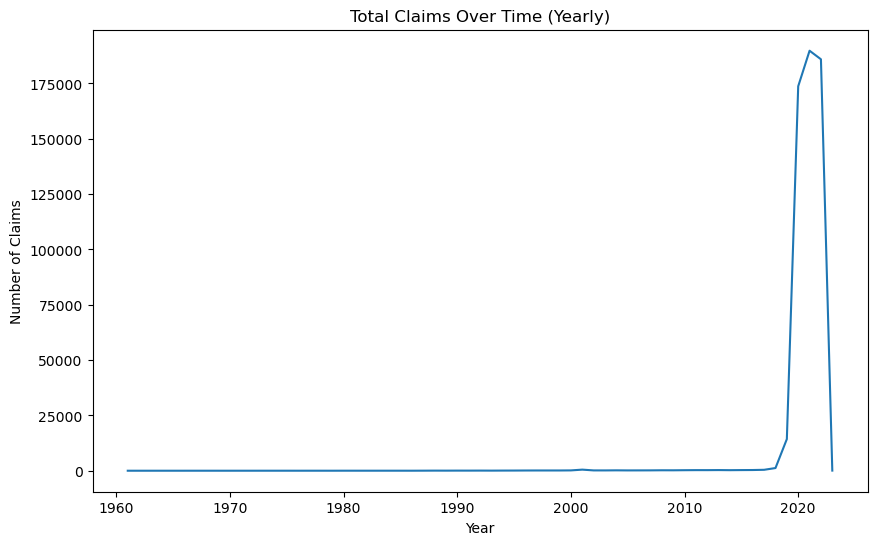

In [28]:
# Group by year and count claims
yearly_claims = base_df.groupby('Accident_Year').size()

# Plot the line plot for yearly claims
plt.figure(figsize=(10, 6))
yearly_claims.plot(kind='line')
plt.title("Total Claims Over Time (Yearly)")
plt.xlabel("Year")
plt.ylabel("Number of Claims")
plt.show()

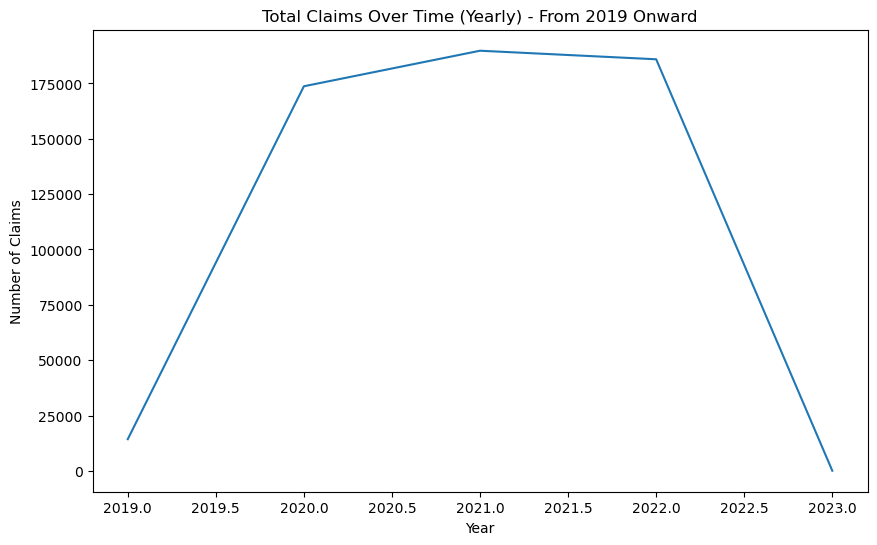

In [29]:
# Filter the dataset to include only data from 2019 onward
yearly_claims_recent = yearly_claims[yearly_claims.index >= 2019]

# Plot the line plot for yearly claims from 2019 onward
plt.figure(figsize=(10, 6))
yearly_claims_recent.plot(kind='line')
plt.title("Total Claims Over Time (Yearly) - From 2019 Onward")
plt.xlabel("Year")
plt.ylabel("Number of Claims")
plt.show()

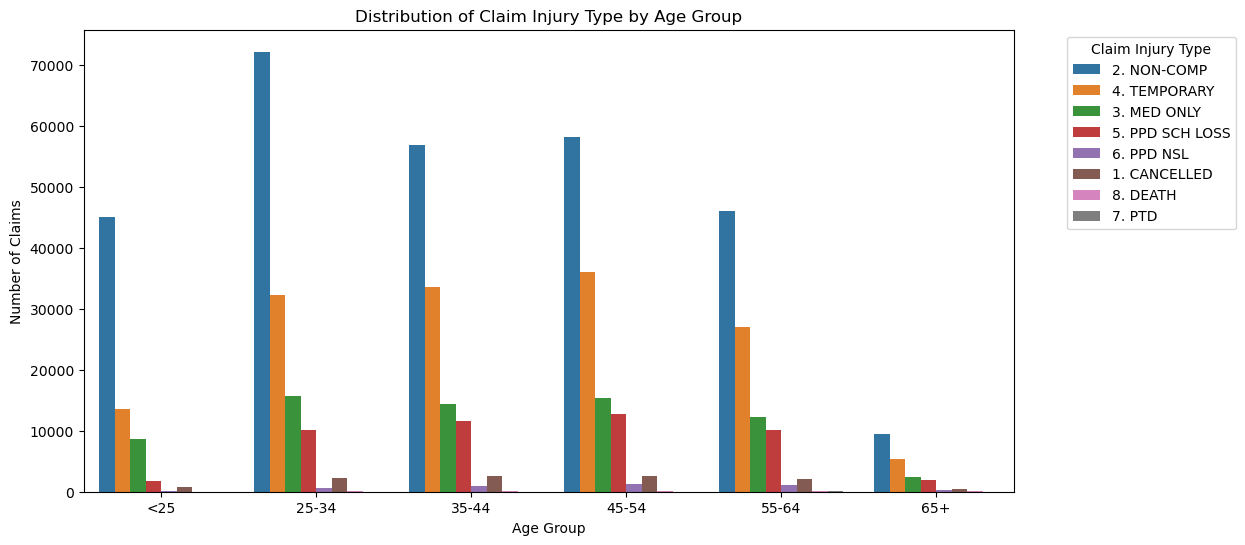

In [30]:
# Create age groups
base_df['Age Group'] = pd.cut(base_df['Age at Injury'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])

# Plot count of Claim Injury Type by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.countplot(data=base_df, x='Age Group', hue='Claim Injury Type')
plt.title("Distribution of Claim Injury Type by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Claims")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

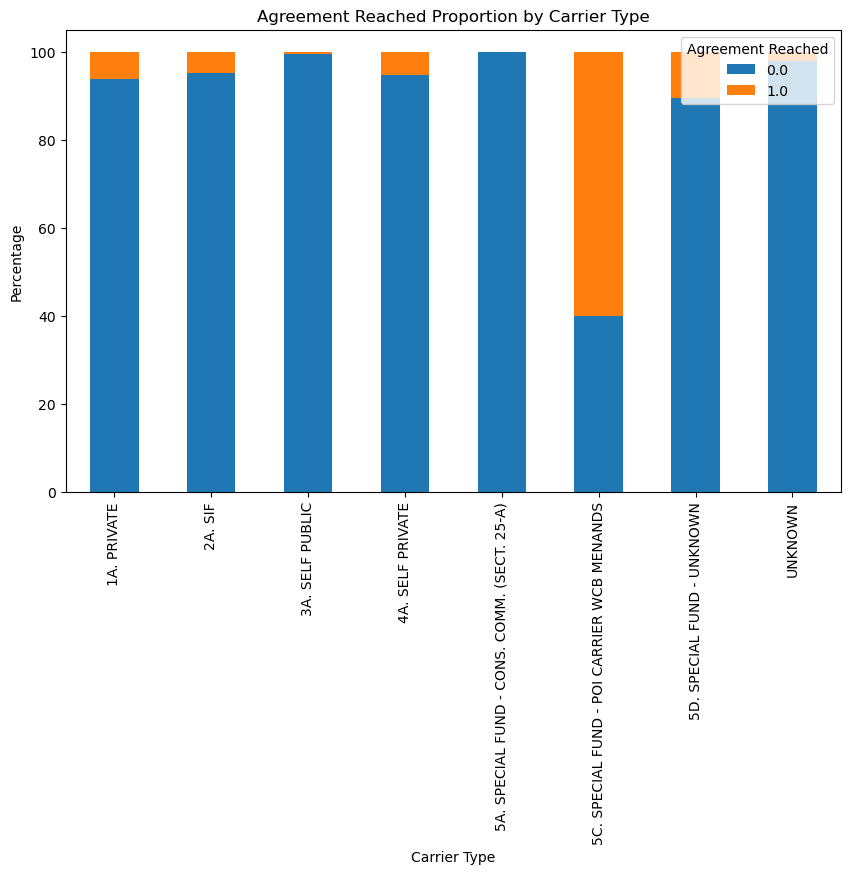

In [31]:
# Plot the proportion of Agreement Reached by Carrier Type
carrier_agreement = pd.crosstab(base_df['Carrier Type'], base_df['Agreement Reached'], normalize='index') * 100
carrier_agreement.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Agreement Reached Proportion by Carrier Type")
plt.xlabel("Carrier Type")
plt.ylabel("Percentage")
plt.legend(title="Agreement Reached", loc="upper right")
plt.show()

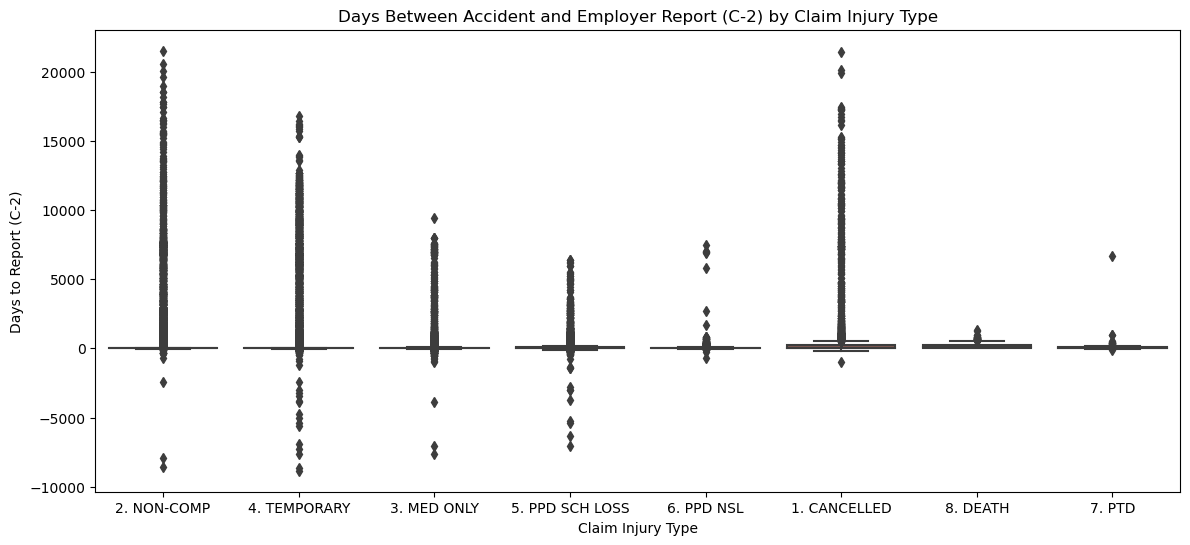

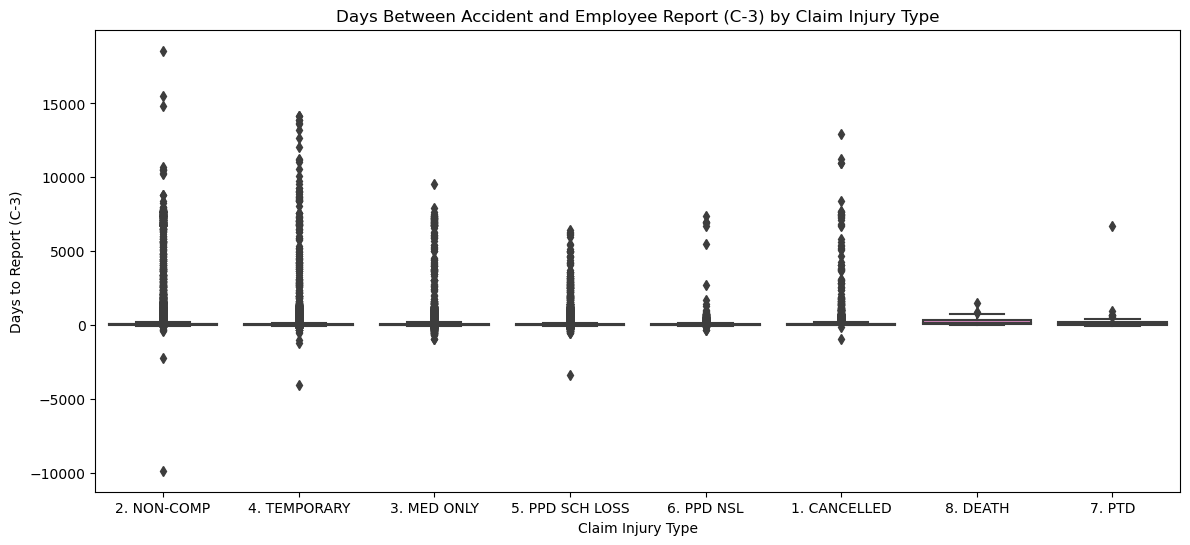

In [32]:
# Calculate days between Accident Date and C-2 Date, and Accident Date and C-3 Date
base_df['Accident_to_C2_Days'] = (base_df['C-2 Date'] - base_df['Accident Date']).dt.days
base_df['Accident_to_C3_Days'] = (base_df['C-3 Date'] - base_df['Accident Date']).dt.days

# Plot boxplot of delays by Claim Injury Type
plt.figure(figsize=(14, 6))
sns.boxplot(data=base_df, x='Claim Injury Type', y='Accident_to_C2_Days')
plt.title("Days Between Accident and Employer Report (C-2) by Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Days to Report (C-2)")
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=base_df, x='Claim Injury Type', y='Accident_to_C3_Days')
plt.title("Days Between Accident and Employee Report (C-3) by Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Days to Report (C-3)")
plt.show()

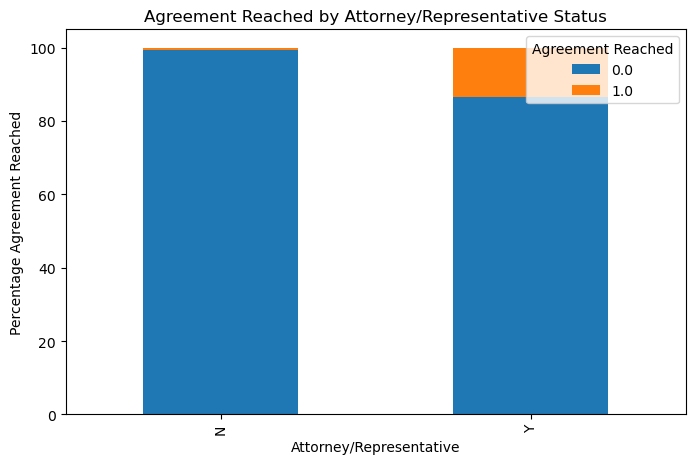

In [33]:
# Calculate the proportion of Agreement Reached based on Attorney/Representative status
attorney_agreement_stats = pd.crosstab(base_df['Attorney/Representative'], base_df['Agreement Reached'], normalize='index') * 100

# Plot the stacked bar chart
attorney_agreement_stats.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Agreement Reached by Attorney/Representative Status")
plt.xlabel("Attorney/Representative")
plt.ylabel("Percentage Agreement Reached")
plt.legend(title="Agreement Reached", loc="upper right")
plt.show()

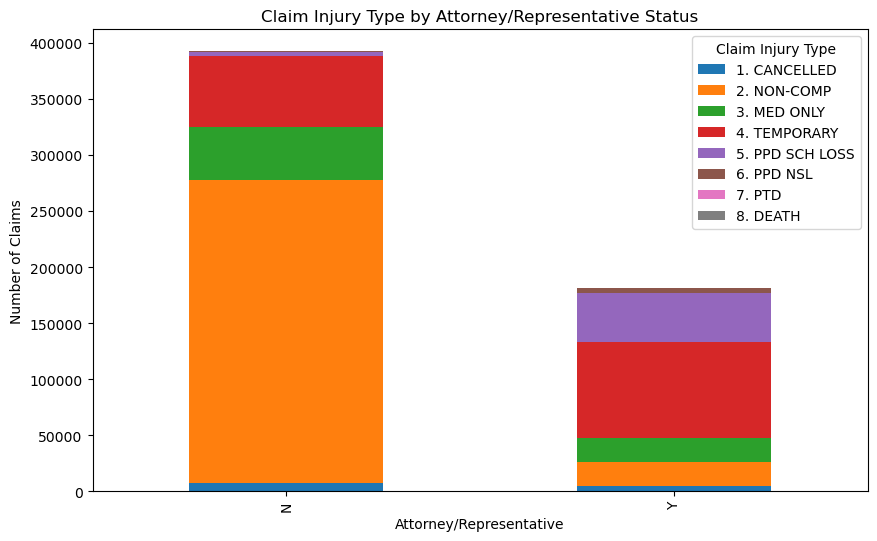

In [34]:
# Calculate the count of each Claim Injury Type by Attorney/Representative status
attorney_injury_stats = pd.crosstab(base_df['Attorney/Representative'], base_df['Claim Injury Type'])

# Plot the count plot
attorney_injury_stats.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Claim Injury Type by Attorney/Representative Status")
plt.xlabel("Attorney/Representative")
plt.ylabel("Number of Claims")
plt.legend(title="Claim Injury Type", loc="upper right")
plt.show()

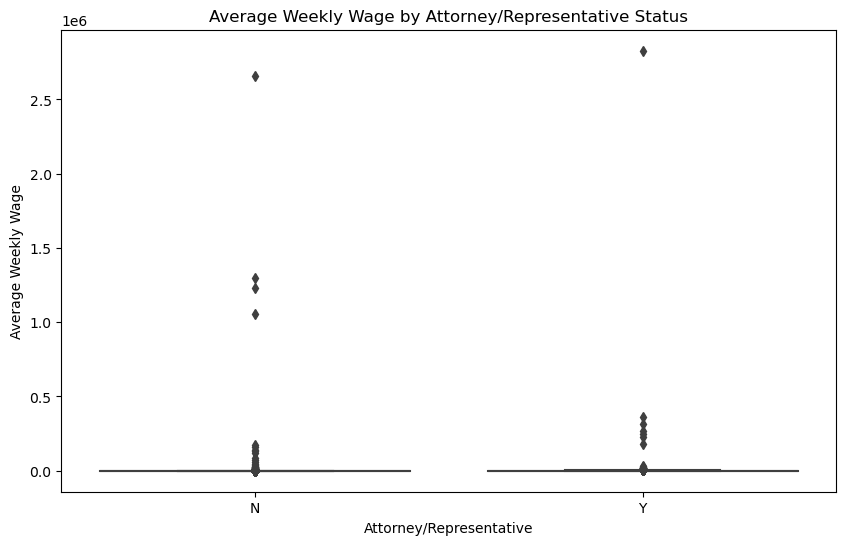

In [35]:
# Boxplot of Average Weekly Wage by Attorney/Representative status
plt.figure(figsize=(10, 6))
sns.boxplot(data=base_df, x='Attorney/Representative', y='Average Weekly Wage')
plt.title("Average Weekly Wage by Attorney/Representative Status")
plt.xlabel("Attorney/Representative")
plt.ylabel("Average Weekly Wage")
plt.show()

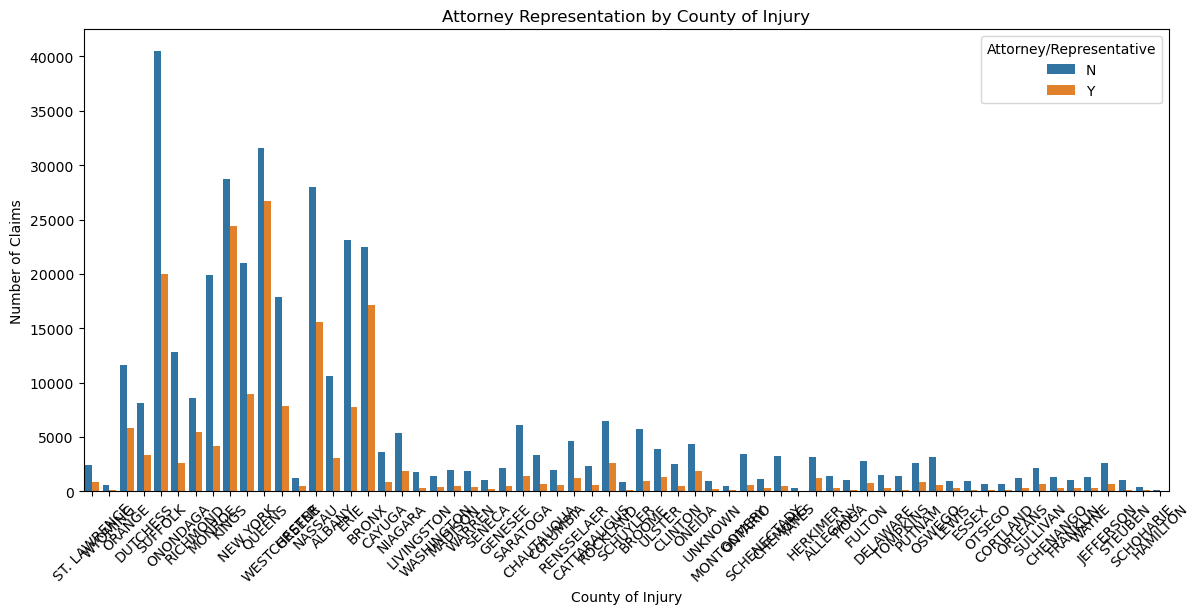

In [36]:
# Count plot of Attorney/Representative status by County of Injury
plt.figure(figsize=(14, 6))
sns.countplot(data=base_df, x='County of Injury', hue='Attorney/Representative')
plt.title("Attorney Representation by County of Injury")
plt.xlabel("County of Injury")
plt.ylabel("Number of Claims")
plt.legend(title="Attorney/Representative")
plt.xticks(rotation=45)
plt.show()

**1.3. Multivariate analysis pivoting from the target variable**

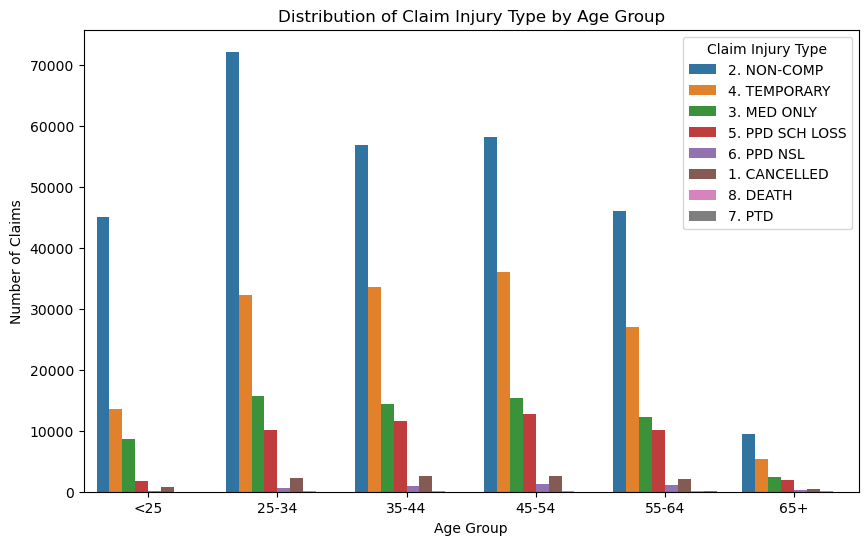

In [37]:
# Create age groups
base_df['Age Group'] = pd.cut(base_df['Age at Injury'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])

# Plot Claim Injury Type distribution across age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=base_df, x='Age Group', hue='Claim Injury Type')
plt.title("Distribution of Claim Injury Type by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Claims")
plt.legend(title="Claim Injury Type")
plt.show()

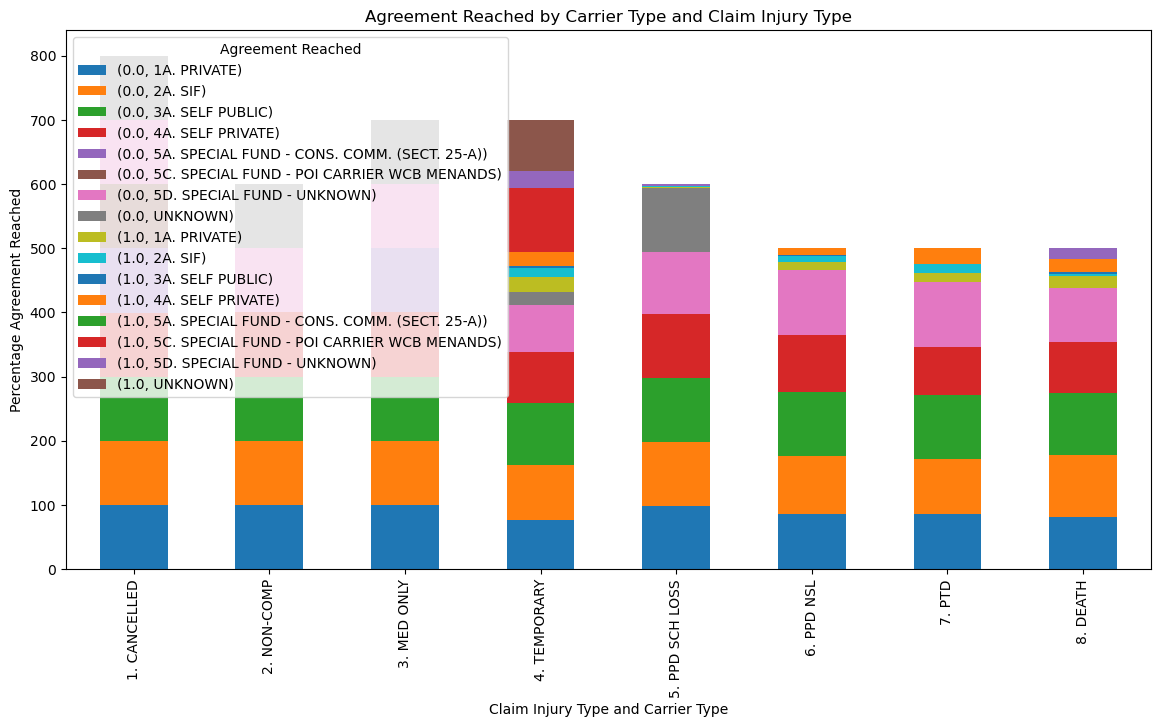

In [38]:
# Create a crosstab for Claim Injury Type by Carrier Type and Agreement Reached
carrier_agreement = pd.crosstab([base_df['Claim Injury Type'], base_df['Carrier Type']], base_df['Agreement Reached'], normalize='index') * 100

# Plot stacked bar chart
carrier_agreement.unstack().plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Agreement Reached by Carrier Type and Claim Injury Type")
plt.xlabel("Claim Injury Type and Carrier Type")
plt.ylabel("Percentage Agreement Reached")
plt.legend(title="Agreement Reached")
plt.show()


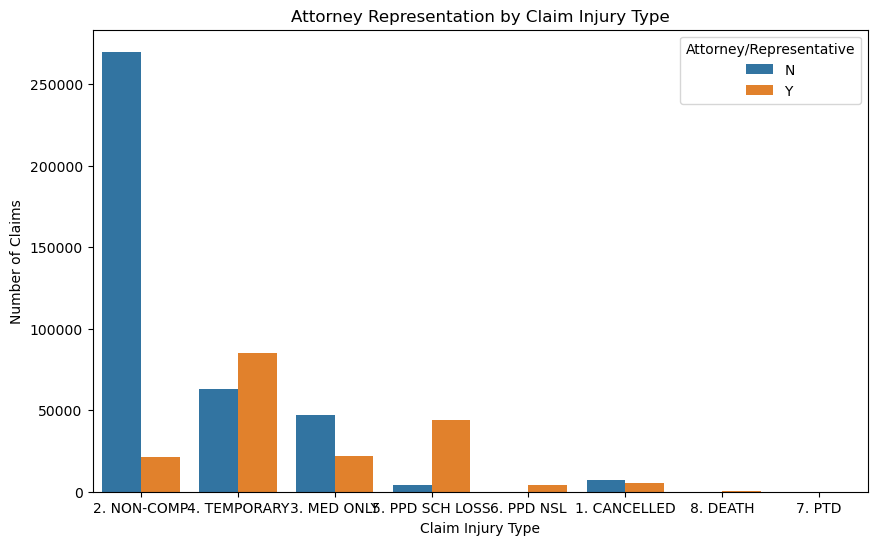

In [39]:
# Count plot of Claim Injury Type with Attorney/Representative status
plt.figure(figsize=(10, 6))
sns.countplot(data=base_df, x='Claim Injury Type', hue='Attorney/Representative')
plt.title("Attorney Representation by Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Number of Claims")
plt.legend(title="Attorney/Representative")
plt.show()

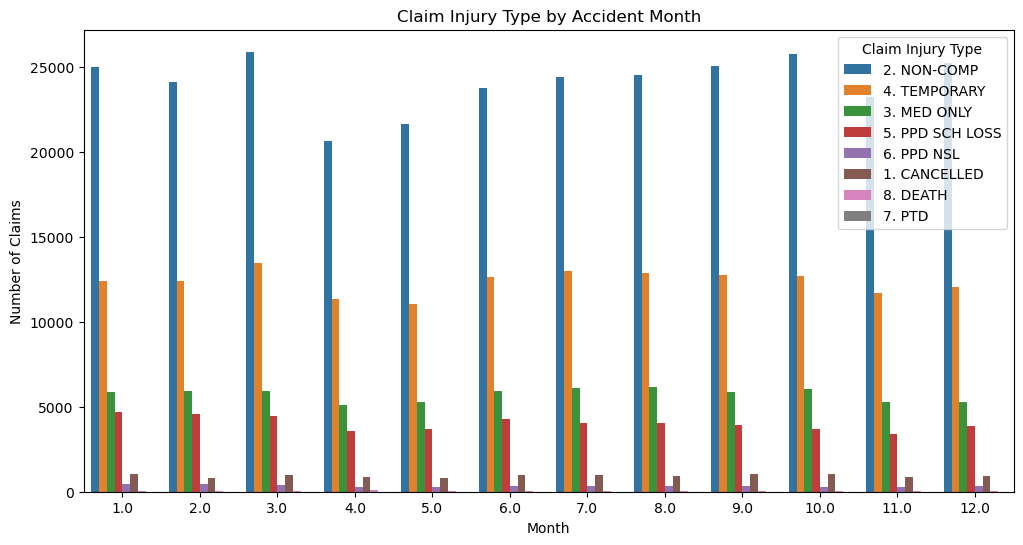

In [40]:
# Extract month from Accident Date
base_df['Accident_Month'] = base_df['Accident Date'].dt.month

# Count plot of Claim Injury Type by Accident Month
plt.figure(figsize=(12, 6))
sns.countplot(data=base_df, x='Accident_Month', hue='Claim Injury Type')
plt.title("Claim Injury Type by Accident Month")
plt.xlabel("Month")
plt.ylabel("Number of Claims")
plt.legend(title="Claim Injury Type")
plt.show()

**1.4. Outliers, irregular and duplicate values**

In [41]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

# Example usage: Detect outliers for 'Average Weekly Wage'
outliers_weekly_wage = detect_outliers_iqr(base_df, 'Average Weekly Wage')
print(f"Outliers in 'Average Weekly Wage':\n{outliers_weekly_wage[['Average Weekly Wage']]}")

Outliers in 'Average Weekly Wage':
        Average Weekly Wage
27                  2115.00
95                  2615.80
176                 2175.45
199                 4371.78
209                 2606.99
...                     ...
593302              2144.73
593370              2290.36
593388              2407.46
593426              2224.10
593446              2277.28

[22257 rows x 1 columns]


C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_30780\3812569534.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


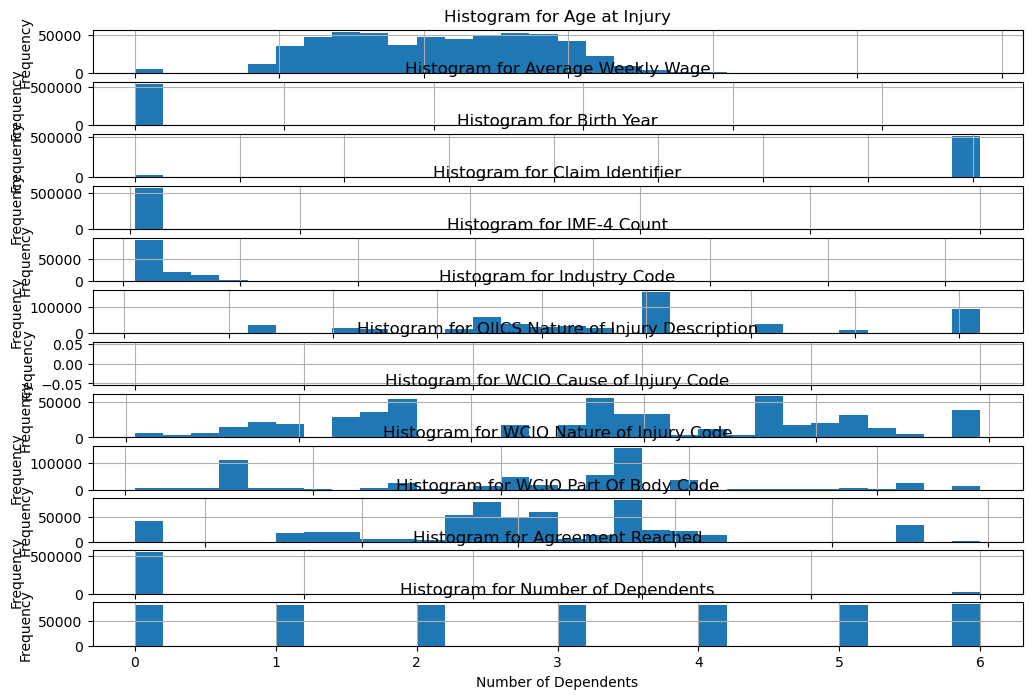

In [42]:
# Plot histograms for relevant numerical columns
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    base_df[col].hist(bins=30)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [43]:
# Summary of outliers per feature using IQR method
outlier_summary = {col: detect_outliers_iqr(base_df, col).shape[0] for col in numerical_columns}
print("Summary of possible Outlier Counts per Feature (IQR Method):")
print(outlier_summary)

Summary of possible Outlier Counts per Feature (IQR Method):
{'Age at Injury': 197, 'Average Weekly Wage': 22257, 'Birth Year': 25330, 'Claim Identifier': 19445, 'IME-4 Count': 7169, 'Industry Code': 0, 'OIICS Nature of Injury Description': 0, 'WCIO Cause of Injury Code': 0, 'WCIO Nature of Injury Code': 0, 'WCIO Part Of Body Code': 76818, 'Agreement Reached': 26787, 'Number of Dependents': 0}


In [44]:
# Example: Check unique values in a categorical column (e.g., 'Gender')
print("Unique values in 'Gender':", base_df['Gender'].unique())

# You can also loop over all categorical columns to check for any unusual values
categorical_columns = base_df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"Unique values in '{col}':", base_df[col].unique())

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
Unique values in 'Attorney/Representative': ['N' 'Y' nan]
Unique values in 'Carrier Name': ['NEW HAMPSHIRE INSURANCE CO' 'ZURICH AMERICAN INSURANCE CO'
 'INDEMNITY INSURANCE CO OF' ... 'MARATHON CENTRAL SCHOOL DIST'
 'CAMBRIDGE CENTRAL SCHOOL' 'HERMON-DEKALB CENTRAL']
Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
Unique values in 'County of Injury': ['ST. LAWRENCE' 'WYOMING' 'ORANGE' nan 'DUTCHESS' 'SUFFOLK' 'ONONDAGA'
 'RICHMOND' 'MONROE' 'KINGS' 'NEW YORK' 'QUEENS' 'WESTCHESTER' 'GREENE'
 'NASSAU' 'ALBANY' 'ERIE' 'BRONX' 'CAYUGA' 'NI

In [45]:
# Example: Find rows with unusual 'Age at Injury' values
irregular_ages = base_df[(base_df['Age at Injury'] < 0) | (base_df['Age at Injury'] > 100)]
print("Irregular values in 'Age at Injury':")
print(irregular_ages[['Age at Injury']])

# Example: Detect extremely high or low values in 'Average Weekly Wage'
irregular_wages = base_df[(base_df['Average Weekly Wage'] < 0) | (base_df['Average Weekly Wage'] > 10000)]
print("Irregular values in 'Average Weekly Wage':")
print(irregular_wages[['Average Weekly Wage']])

Irregular values in 'Age at Injury':
        Age at Injury
17450           102.0
23806           117.0
29805           113.0
45403           104.0
50528           117.0
119218          115.0
127420          110.0
242557          110.0
317047          101.0
332092          111.0
372363          111.0
454043          112.0
459845          112.0
461415          112.0
470416          112.0
474878          112.0
476474          112.0
479106          112.0
486345          112.0
494272          111.0
494359          111.0
494388          111.0
494434          109.0
494447          111.0
494555          111.0
494608          112.0
494695          110.0
494800          109.0
495038          112.0
499774          112.0
506432          110.0
506476          112.0
521520          112.0
522062          112.0
536654          110.0
537772          110.0
545156          112.0
545199          112.0
545215          112.0
545395          112.0
545428          112.0
545444          112.0
545480          1

In [46]:
# Check for duplicate rows based on a unique identifier, such as Claim Identifier
duplicate_records = base_df[base_df.duplicated(subset=['Claim Identifier'], keep=False)]
print("Duplicate records based on 'Claim Identifier':")
duplicate_records

Duplicate records based on 'Claim Identifier':


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Agreement Reached,WCB Decision,Number of Dependents,Accident_to_Assembly_Days,Accident_Month,Accident_Year,Assembly_to_FirstHearing_Days,Age Group,Accident_to_C2_Days,Accident_to_C3_Days
257901,NaT,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaT,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Example: Flag irregular ages
#base_df['Irregular_Age'] = base_df['Age at Injury'].apply(lambda x: 1 if x < 0 or x > 100 else 0)

# Example: Flag negative or unusually high weekly wages
#base_df['Irregular_Wage'] = base_df['Average Weekly Wage'].apply(lambda x: 1 if x < 0 or x > 10000 else 0)

In [48]:
# Count the total number of duplicate rows across all columns
duplicate_count = base_df.duplicated().sum()
print(f"Total number of entirely duplicate rows: {duplicate_count}")

# Count duplicates based on a specific column
duplicate_identifier_count = base_df.duplicated(subset=['Claim Identifier']).sum()
print(f"Total number of duplicate records based on 'Claim Identifier': {duplicate_identifier_count}")

Total number of entirely duplicate rows: 0
Total number of duplicate records based on 'Claim Identifier': 1


In [49]:
# Display entirely duplicate rows across all columns
duplicate_rows_all = base_df[base_df.duplicated(keep=False)]
print("Entirely duplicate rows across all columns:")
print(duplicate_rows_all)

Entirely duplicate rows across all columns:
Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents, Accident_to_Assembly_Days, Accident_Month, Accident_Year, Assembly_to_FirstHearing_Days, Age Group, Accident_to_C2_Days, Accident_to_C3_Days]
Index: []

[0 rows x 40 columns]


**1.5. Some initial insights**

#### 1. **Univariate Analysis Insights**

   - **Numerical Variables**:
     - **Age at Injury**:
       - Range: 0 to 117 years.
       - Mean: 42.1 years, with a standard deviation of 14.3.
       - Some extreme values (e.g., 0 and over 100) suggest potential data entry issues or outliers.
     - **Average Weekly Wage**:
       - Range: $0 to approximately $2.83 million, with a mean wage of around $491.
       - The wide range indicates extreme outliers, likely skewed by high-income claims.
     - **Number of Dependents**:
       - Range: 0 to 6 dependents, with a mean of about 3.
   
   - **Categorical Variables**:
     - **Claim Injury Type**:
       - The most frequent types are `2. NON-COMP` (49%) and `4. TEMPORARY` (25%).
       - Categories, such as `8. DEATH` and `7. PTD`, make up a small fraction of the data.
     - **Gender**:
       - Distribution: 335,218 male claims, 234,051 female claims, 19,445 missing, and 4,757 with unusual values (`U` and `X`).
     - **District Name**:
       - Most claims are from `NYC` (270,779 claims), followed by `ALBANY` and `HAUPPAUGE`.
       - Missing data for about 19,445 records.

#### 2. **Multivariate Analysis Insights**

   - **Correlations**:
     - Low correlations among most numerical variables (e.g., `Average Weekly Wage`, `Age at Injury`)
   
   - **Groupby Analyses**:
     - **Gender vs. Claim Injury Type**:
       - Males appear to have a higher occurrence of severe injury types, indicating potential gender-based differences in injury claims.
     - **District and Industry Distributions**:
       - Industries like `HEALTH CARE AND SOCIAL ASSISTANCE` and `PUBLIC ADMINISTRATION` have higher claim volumes.
     - **COVID-19 Indicator**:
       - Approximately 4.6% of claims are marked `Y` for COVID-19.

#### 3. **Target Variable Analysis (`Claim Injury Type`)**

   - **Class Imbalance**:
       - `NON-COMP` and `TEMPORARY` claims make up the majority, indicating a class imbalance that could impact model performance.
   - **Demographic and Economic Influence**:
       - Higher wages are often associated with more severe claims, such as permanent disability (`PPD SCH LOSS`).
       - Younger individuals (under 25) tend to have more temporary claims, while older workers report more serious injury types.

#### 4. **Outliers and Irregular Values**

   - **Outliers**:
     - **Age at Injury**: Ages above 100 and below 18 may represent data entry errors or rare events.
     - **Average Weekly Wage**: Extreme wages (either $0 or exceptionally high values) indicate outliers.
   
   - **Irregular Values**:
     - **Date Irregularities**: Possible data issues exist if `Accident Date` is after `Assembly Date`.
     - **Categorical Irregularities**: Inconsistent entries in fields like `Gender` (e.g., `U` and `X`).

**2- Pre-processing and new features**

**2.1. Outliers removal- testing but not changing**

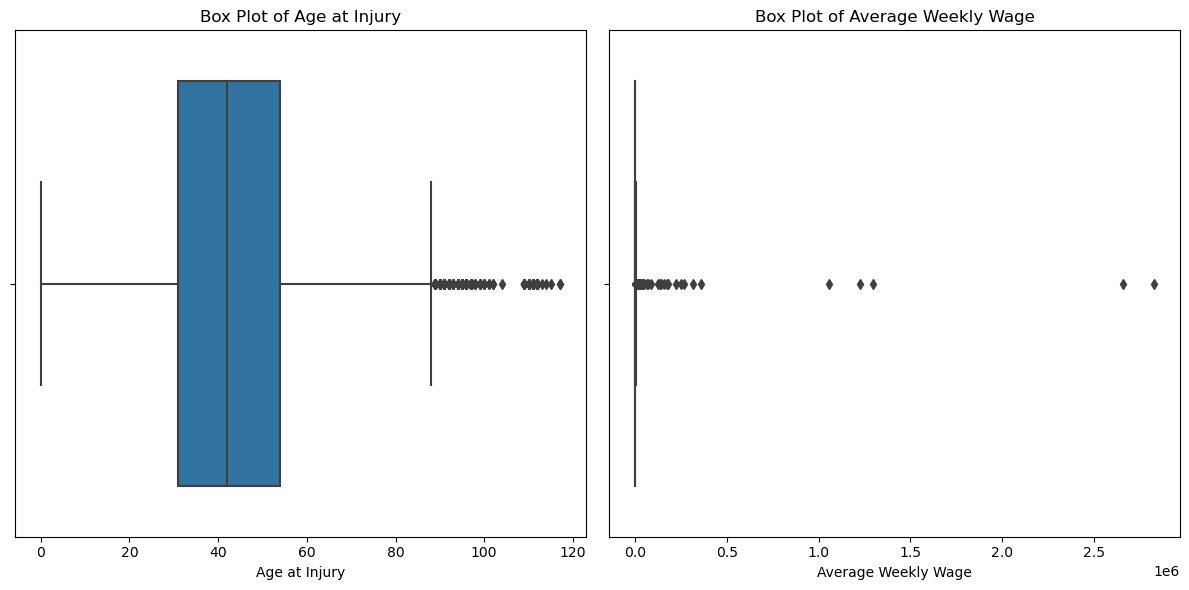

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns to inspect for outliers
numerical_columns = ['Age at Injury', 'Average Weekly Wage']  # Replace with your numerical columns

# Plot box plots for each numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(data=base_df, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [51]:
# Display the top 50 values for 'Age at Injury', sorted in descending order
top_50_ages = base_df['Age at Injury'].sort_values(ascending=False).head(100)
print(top_50_ages)

23806     117.0
50528     117.0
119218    115.0
591462    114.0
29805     113.0
          ...  
472075     97.0
444766     97.0
576887     97.0
453619     97.0
473362     97.0
Name: Age at Injury, Length: 100, dtype: float64


In [52]:
#Given that average life expectancy for US citizens is 77.5 years old and the retirement age is 67 years old, it's highly unlikely that there's workers over a certain age that are still getting injured at work.
#We will remove outliers in age using the IQR method

In [53]:
# Define the column
age_column = 'Age at Injury'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = base_df[age_column].quantile(0.25)
Q3 = base_df[age_column].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Identify outliers
outliers = base_df[(base_df[age_column] < (Q1 - 1.5 * IQR)) | (base_df[age_column] > (Q3 + 1.5 * IQR))]

# Count the number of outliers
num_outliers = outliers.shape[0]
print(f"Number of outliers in '{age_column}': {num_outliers}")

Number of outliers in 'Age at Injury': 197


In [54]:
Q1 = base_df['Age at Injury'].quantile(0.25)
Q3 = base_df['Age at Injury'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on the IQR rule
base_df_no_outliers = base_df[~((base_df['Age at Injury'] < (Q1 - 1.5 * IQR)) | (base_df['Age at Injury'] > (Q3 + 1.5 * IQR)))]

# Display the new shape of the dataset after removing outliers
print(f"New dataset shape after removing outliers: {base_df_no_outliers.shape}")

New dataset shape after removing outliers: (593274, 40)


In [55]:
# Display the top 50 values for 'Average Weekly Wage', sorted in descending order
top_50_salaries = base_df['Average Weekly Wage'].sort_values(ascending=False).head(50)
print(top_50_salaries)

327023    2828079.00
143846    2659398.00
414888    1297304.00
342165    1227017.00
106250    1055027.00
6436       360000.00
512406     315528.00
154699     266855.00
208520     248573.00
99984      224083.00
495202     177524.00
427086     171169.00
99691      158160.52
108321     140979.00
65460      132895.77
200601     121269.00
479102      83850.00
92697       70521.00
75592       61684.70
439472      48096.72
37245       41787.00
220835      35000.00
430809      33146.68
390126      27805.83
591021      25222.37
4642        24792.24
431408      23370.03
279390      22496.46
575263      22374.68
407800      21600.00
293266      21260.52
259064      20280.72
455938      20000.00
412247      19063.87
210344      18233.17
397322      17602.00
307426      17600.00
260768      17500.00
231826      17458.09
205304      17151.71
564062      16849.07
269734      16386.86
592473      14868.33
53465       14493.15
62739       14013.17
309202      13704.75
215002      13519.33
431400      1

**2.2. Categorical features- Step 1: Binary Features**

In [56]:
# Binary Categorical Features
binary_categorical_features = [
    'Attorney/Representative',
    'COVID-19 Indicator',
    'Agreement Reached'
]

# Non-Binary Categorical Features
non_binary_categorical_features = [
    'Carrier Name',
    'Carrier Type',
    'County of Injury',
    'District Name',
    'Gender',
    'Industry Code',
    'Industry Code Description',
    'Medical Fee Region',
    'OIICS Nature of Injury Description',
    'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',
    'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',
    'Zip Code',
    'WCB Decision',
    'Alternative Dispute Resolution'
]

# Numerical Features
numerical_features = [
    'Age at Injury',
    'Average Weekly Wage',
    'Birth Year',
    'IME-4 Count'
]

# Time-Related Features
time_related_features = [
    'Accident Date',
    'Assembly Date',
    'C-2 Date',
    'C-3 Date',
    'First Hearing Date'
]

# Target Variable
target_variable = 'Claim Injury Type'

In [57]:
#base_df['Attorney/Representative'].unique()
# Convert 'Attorney/Representative' column to a binary flag
base_df['Attorney/Representative'] = base_df['Attorney/Representative'].apply(lambda x: 1 if x == 'Y' else 0)

In [58]:
#base_df['COVID-19 Indicator'].unique()
# Convert 'COVID-19 Indicator' column to a binary flag
base_df['COVID-19 Indicator'] = base_df['COVID-19 Indicator'].apply(lambda x: 1 if x == 'Y' else 0)

In [59]:
# Convert 'Agreement Reached' column to integer format, ignoring missing values
base_df['Agreement Reached'] = pd.to_numeric(base_df['Agreement Reached'], errors='coerce').astype('Int64')

**2.3. Missing values further analysis and strategies**

**2.3.1. Dropping features with high percentage of missing values**

In [60]:
# Calculate the percentage of missing values for each column
missing_values_percent = base_df.isnull().mean() * 100

# Sort by highest percentage and display columns with missing values
missing_values_percent_sorted = missing_values_percent[missing_values_percent > 0].sort_values(ascending=False)
missing_values_percent_sorted

OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622664
First Hearing Date                     74.590502
Assembly_to_FirstHearing_Days          74.590502
Accident_to_C3_Days                    69.029995
C-3 Date                               68.449174
Birth Year                              8.176137
Average Weekly Wage                     8.104187
Zip Code                                8.101828
WCIO Part Of Body Description           6.154808
WCIO Part Of Body Code                  6.154808
Accident_to_C2_Days                     6.087071
WCIO Nature of Injury Description       5.914695
WCIO Nature of Injury Code              5.914695
WCIO Cause of Injury Description        5.911831
WCIO Cause of Injury Code               5.911831
C-2 Date                                5.729850
Industry Code Description               4.954412
Industry Code                           4.954412
Age Group                               4.206271
Accident Date       

In [61]:
#First, we'll drop variables the variable with 100% missing values
#Other variables eventhough having a high percentage of missing values, we'll keep them for now since they might bring valuable information
# Dropping the specified columns with high percentages of missing values
#We will also drop variables that are text descriptions of other variables since they will not bring additional information to the model
columns_to_drop = [
    'OIICS Nature of Injury Description',
    'WCIO Part Of Body Description',
    'Industry Code Description',
    'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Description'
]

# Drop the columns from the DataFrame
base_df = base_df.drop(columns=columns_to_drop)

# Confirm that the columns have been removed
base_df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents', 'Accident_to_Assembly_Days',
       'Accident_Month', 'Accident_Year', 'Assembly_to_FirstHearing_Days',
       'Age Group', 'Accident_to_C2_Days', 'Accident_to_C3_Days'],
      dtype='object')

In [62]:
#base_df.shape

In [63]:
#In order to attempt to extract value for the features with a high percentage of missing values we will create flag features
#1 if the respective value is missing, 0 if it isn't. We will only do this for the colums with the highest percentage of missing values

# Columns with high percentages of missing values
columns_with_high_missing = [
    'IME-4 Count',
    'First Hearing Date',
    'Assembly_to_FirstHearing_Days',
    'Accident_to_C3_Days',
    'C-3 Date'
]

# Create a new flag column for each of these columns
for column in columns_with_high_missing:
    base_df[f'{column}_missing_flag'] = base_df[column].isnull().astype(int)

# Display the first few rows of the new flag columns to confirm
base_df[[f'{col}_missing_flag' for col in columns_with_high_missing]].head()

,IME-4 Count_missing_flag,First Hearing Date_missing_flag,Assembly_to_FirstHearing_Days_missing_flag,Accident_to_C3_Days_missing_flag,C-3 Date_missing_flag
0,1,1,1,1,1
1,0,0,0,0,0
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [64]:
#For now, we'll drop the original columns, but we might revisit this topic for the final deliverable

# Drop the original columns with high percentages of missing values
base_df = base_df.drop(columns=columns_with_high_missing)

#base_df.columns

**2.3.2. Analyzing features with lower percentages of missing values**

**In this section we'll be analyzing other feature with missing values and presenting strategies to deal with them. They will only be dealt with later since we do not want to incur in data leakage**

In [65]:
#While exploring the data, birthyears with 0 were detected, these are clearly irregular values. We will treat them as missing values

import pandas as pd

# Convert '0' values in the 'Birth Year' column to missing values (NaN)
base_df['Birth Year'].replace(0, pd.NA, inplace=True)

# Confirm that 0 values have been converted to NaN by checking the count of missing values
missing_birth_year_count = base_df['Birth Year'].isna().sum()
print(f"Number of missing values in 'Birth Year' after conversion: {missing_birth_year_count}")

Number of missing values in 'Birth Year' after conversion: 73604


In [66]:
# Calculate the percentage of missing values for each column
missing_values_percent = base_df.isnull().mean() * 100

# Sort by highest percentage and display columns with missing values
missing_values_percent_sorted = missing_values_percent[missing_values_percent > 0].sort_values(ascending=False)
missing_values_percent_sorted

Birth Year                        12.402291
Average Weekly Wage                8.104187
Zip Code                           8.101828
WCIO Part Of Body Code             6.154808
Accident_to_C2_Days                6.087071
WCIO Nature of Injury Code         5.914695
WCIO Cause of Injury Code          5.911831
C-2 Date                           5.729850
Industry Code                      4.954412
Age Group                          4.206271
Accident_Year                      3.898084
Accident_Month                     3.898084
Accident_to_Assembly_Days          3.898084
Accident Date                      3.898084
Age at Injury                      3.276487
Gender                             3.276487
District Name                      3.276487
County of Injury                   3.276487
Agreement Reached                  3.276487
WCB Decision                       3.276487
Number of Dependents               3.276487
Claim Injury Type                  3.276487
Carrier Type                    

**2.3.2.1. Birth Year/Age of Injury**

In [67]:
#We will be dropping birthyear and using Age of injury instead. The reason for this is that birthyear variable has a lot of irregular values i.e. values with 0 and other irregulr birth years
#it also has much more missing values

# Drop the 'Birth Year' column as it's no longer needed
base_df = base_df.drop(columns=['Birth Year'])

Descriptive statistics for Age at Injury:
count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64


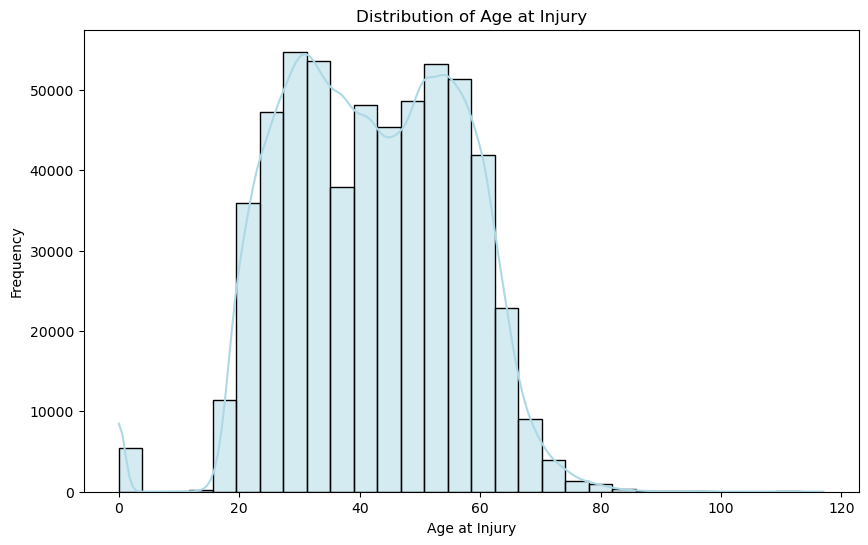

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display descriptive statistics for the 'Age at Injury' column
age_at_injury_stats = base_df['Age at Injury'].describe()
print("Descriptive statistics for Age at Injury:")
print(age_at_injury_stats)

# Plot the distribution of the 'Age at Injury' column
plt.figure(figsize=(10, 6))
sns.histplot(base_df['Age at Injury'], bins=30, kde=True, color='lightblue')
plt.title("Distribution of Age at Injury")
plt.xlabel("Age at Injury")
plt.ylabel("Frequency")
plt.show()

**Missing values Age of Injury: The recommended strategy is to fill missing `Age of Injury` values with the **median**, as this approach is impervious to slight skewness and potential outliers, preserving the central tendency without being affected by extreme values (outliers will be dealth with later)**

**2.3.2.2. Average Weekly Wage**

In [69]:
#As we've seen before there's a lot of salaries at 0. These are probably not irregular values though because there's a lot of volunteer workers...
#It's a reasonable assumption that missing values for salary would correspond to 0
#However, since the volume of 0 salaries makes up most of the dataset, we will create a new variable that distinguishes volunteer workers from non volunteer workers

**Missing values Average Weekly Wage: The recommended strategy is to fill missing `Average Weekly Wage` values with 0, as it's reasonable to assume that these values correspond to volunteer workers (later we'll create a variable to distinguish there workers)**

In [70]:
# Replace missing values in the 'Average Weekly Wage' column with 0
base_df['Average Weekly Wage'].fillna(0, inplace=True)

# Display the first few rows of the column to confirm the change
print(base_df['Average Weekly Wage'].head())

0       0.00
1    1745.93
2    1434.80
3       0.00
4       0.00
Name: Average Weekly Wage, dtype: float64


**2.3.3. Zip Code**

In [71]:
#base_df['Zip Code']

Number of unique Zip Codes: 10060
Most common Zip Code: 11236 (Frequency: 3302)


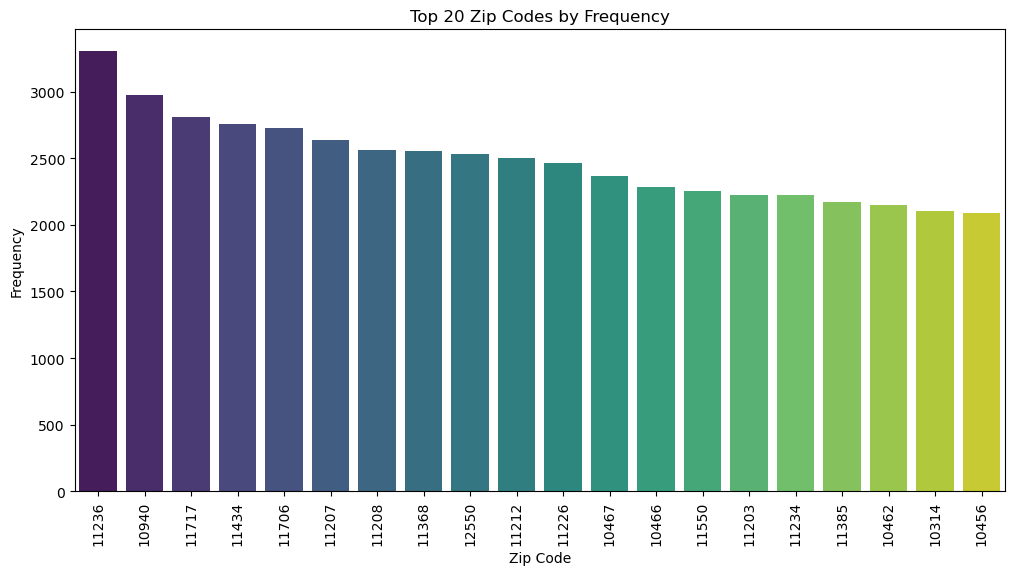

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unique count and mode of 'Zip Code'
unique_zip_codes = base_df['Zip Code'].nunique()
most_common_zip_code = base_df['Zip Code'].mode()[0]
most_common_zip_code_freq = base_df['Zip Code'].value_counts().iloc[0]

print(f"Number of unique Zip Codes: {unique_zip_codes}")
print(f"Most common Zip Code: {most_common_zip_code} (Frequency: {most_common_zip_code_freq})")

# Frequency distribution for the top 20 Zip Codes
top_zip_codes = base_df['Zip Code'].value_counts().nlargest(20)

# Plot distribution of the top 20 Zip Codes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_zip_codes.index, y=top_zip_codes.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 20 Zip Codes by Frequency")
plt.xlabel("Zip Code")
plt.ylabel("Frequency")
plt.show()

**Missing values Zip Code**: The recommended strategy is to fill missing `Zip Code` values with the mode. This approach will help maintain data consistency while minimizing the introduction of potential bias.


**2.3.4. WCIO Part Of Body Code**

Most common WCIO Part Of Body Code (including -9): 42.0 (Frequency: 51862)


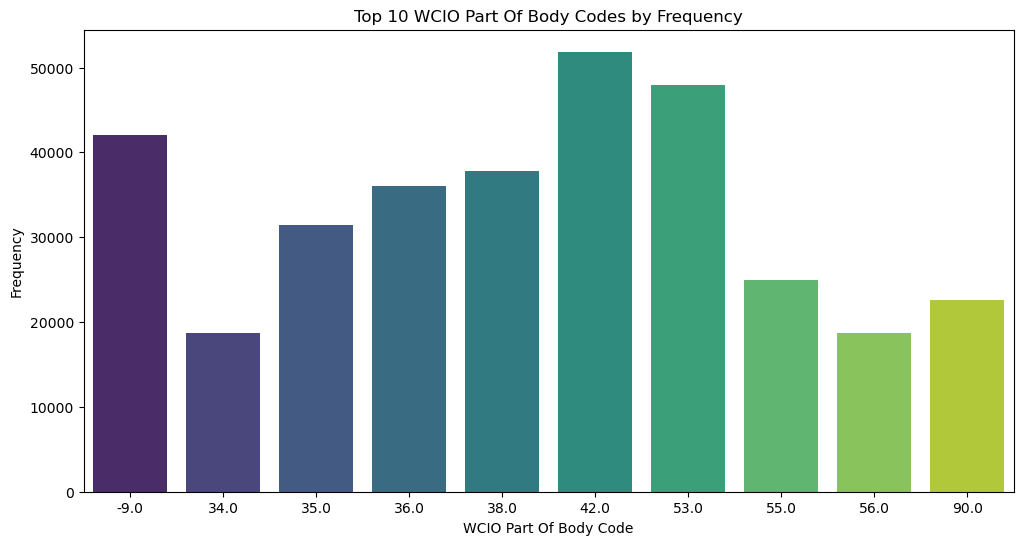

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency counts for 'WCIO Part Of Body Code' including -9
part_of_body_code_counts = base_df['WCIO Part Of Body Code'].value_counts()

# Calculate mode and its frequency
most_common_code = part_of_body_code_counts.idxmax()
most_common_code_freq = part_of_body_code_counts.max()

# Display mode information
print(f"Most common WCIO Part Of Body Code (including -9): {most_common_code} (Frequency: {most_common_code_freq})")

# Show frequency distribution of the top 10 WCIO Part Of Body Codes
top_part_of_body_codes = part_of_body_code_counts.head(10)

# Plot the distribution for the top 10 WCIO Part Of Body Codes by frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=top_part_of_body_codes.index, y=top_part_of_body_codes.values, palette="viridis")
plt.title("Top 10 WCIO Part Of Body Codes by Frequency")
plt.xlabel("WCIO Part Of Body Code")
plt.ylabel("Frequency")
plt.show()

**Missing values WCIO Part Of Body Code**: The recommended strategy is to fill missing values with the mode. This approach maintains consistency in the categorical distribution without introducing arbitrary or outlier values.

**2.3.5. Accident_to_C2_Days**

In [74]:
# Drop the 'Age Group' column from the DataFrame if it exists
if 'Age Group' in base_df.columns:
    base_df = base_df.drop(columns=['Age Group'])

In [75]:
# Calculate the percentage of missing values for each column
missing_values_percent = base_df.isnull().mean() * 100

# Sort by highest percentage and display columns with missing values
missing_values_percent_sorted = missing_values_percent[missing_values_percent > 0].sort_values(ascending=False)
missing_values_percent_sorted

Zip Code                          8.101828
WCIO Part Of Body Code            6.154808
Accident_to_C2_Days               6.087071
WCIO Nature of Injury Code        5.914695
WCIO Cause of Injury Code         5.911831
C-2 Date                          5.729850
Industry Code                     4.954412
Accident_Year                     3.898084
Accident_Month                    3.898084
Accident_to_Assembly_Days         3.898084
Accident Date                     3.898084
Age at Injury                     3.276487
Gender                            3.276487
District Name                     3.276487
County of Injury                  3.276487
Claim Injury Type                 3.276487
Agreement Reached                 3.276487
WCB Decision                      3.276487
Number of Dependents              3.276487
Carrier Type                      3.276487
Carrier Name                      3.276487
Alternative Dispute Resolution    3.276487
Medical Fee Region                3.276487
dtype: floa

In [76]:
import pandas as pd

# Ensure 'C-2 Date', 'C-3 Date', and 'Accident Date' are in datetime format
base_df['C-2 Date'] = pd.to_datetime(base_df['C-2 Date'], errors='coerce')
base_df['Accident Date'] = pd.to_datetime(base_df['Accident Date'], errors='coerce')

# Count records where 'C-2 Date' is before 'Accident Date'
c2_before_accident_count = (base_df['C-2 Date'] < base_df['Accident Date']).sum()

print(f"Number of records where 'C-2 Date' is before 'Accident Date': {c2_before_accident_count}")

Number of records where 'C-2 Date' is before 'Accident Date': 982


In [77]:
#We will eliminate records where c2 comes before accident date

import pandas as pd

# Ensure 'C-2 Date' and 'Accident Date' are in datetime format
base_df['C-2 Date'] = pd.to_datetime(base_df['C-2 Date'], errors='coerce')
base_df['Accident Date'] = pd.to_datetime(base_df['Accident Date'], errors='coerce')

# Remove records where 'C-2 Date' is before 'Accident Date'
base_df = base_df[~(base_df['C-2 Date'] < base_df['Accident Date'])]

# Confirm removal by recounting such records
c2_before_accident_count_after = (base_df['C-2 Date'] < base_df['Accident Date']).sum()
print(f"Number of records where 'C-2 Date' is before 'Accident Date' after removal: {c2_before_accident_count_after}")

Number of records where 'C-2 Date' is before 'Accident Date' after removal: 0


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display descriptive statistics for 'Accident_to_C2_Days'
accident_to_c2_days_stats = base_df['Accident_to_C2_Days'].describe()
print("Descriptive statistics for Accident_to_C2_Days:")
print(accident_to_c2_days_stats)

Descriptive statistics for Accident_to_C2_Days:
count    556364.000000
mean         70.896045
std         510.318861
min           0.000000
25%           5.000000
50%          10.000000
75%          27.000000
max       21503.000000
Name: Accident_to_C2_Days, dtype: float64


In [79]:
# Drop the 'C-2 Date' column from the DataFrame
base_df = base_df.drop(columns=['C-2 Date'])

# Confirm that the column has been removed
print("C-2 Date column removed. Remaining columns:")
print(base_df.columns)

C-2 Date column removed. Remaining columns:
Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Carrier Name', 'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents',
       'Accident_to_Assembly_Days', 'Accident_Month', 'Accident_Year',
       'Accident_to_C2_Days', 'IME-4 Count_missing_flag',
       'First Hearing Date_missing_flag',
       'Assembly_to_FirstHearing_Days_missing_flag',
       'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag'],
      dtype='object')


****Missing values Accident_to_C2**: fill with mean

****2.3.6. WCIO Nature of Injury Code, WCIO Cause of Injury Code, and Industry Code- FILL WITH MODE****

Most common WCIO Nature of Injury Code: 52.0 (Frequency: 153106)
Most common WCIO Cause of Injury Code: 56.0 (Frequency: 46581)
Most common Industry Code: 62.0 (Frequency: 114248)


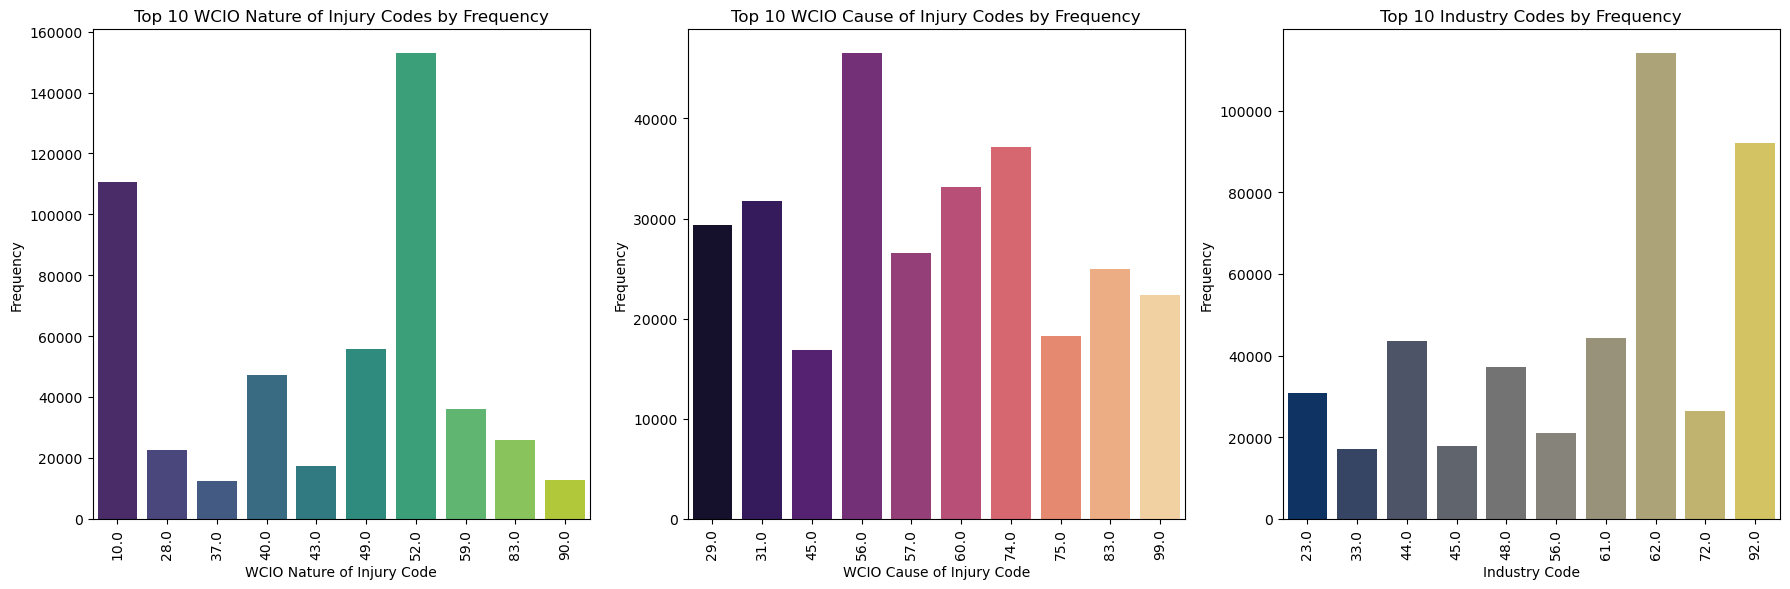

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency counts for 'WCIO Nature of Injury Code', 'WCIO Cause of Injury Code', and 'Industry Code'
nature_of_injury_counts = base_df['WCIO Nature of Injury Code'].value_counts()
cause_of_injury_counts = base_df['WCIO Cause of Injury Code'].value_counts()
industry_code_counts = base_df['Industry Code'].value_counts()

# Display mode and its frequency for each column
nature_of_injury_mode = nature_of_injury_counts.idxmax()
nature_of_injury_mode_freq = nature_of_injury_counts.max()

cause_of_injury_mode = cause_of_injury_counts.idxmax()
cause_of_injury_mode_freq = cause_of_injury_counts.max()

industry_code_mode = industry_code_counts.idxmax()
industry_code_mode_freq = industry_code_counts.max()

print(f"Most common WCIO Nature of Injury Code: {nature_of_injury_mode} (Frequency: {nature_of_injury_mode_freq})")
print(f"Most common WCIO Cause of Injury Code: {cause_of_injury_mode} (Frequency: {cause_of_injury_mode_freq})")
print(f"Most common Industry Code: {industry_code_mode} (Frequency: {industry_code_mode_freq})")

# Plot distributions of the top 10 codes for each column
plt.figure(figsize=(18, 6))

# Plot for 'WCIO Nature of Injury Code'
plt.subplot(1, 3, 1)
sns.barplot(x=nature_of_injury_counts.index[:10], y=nature_of_injury_counts.values[:10], palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 10 WCIO Nature of Injury Codes by Frequency")
plt.xlabel("WCIO Nature of Injury Code")
plt.ylabel("Frequency")

# Plot for 'WCIO Cause of Injury Code'
plt.subplot(1, 3, 2)
sns.barplot(x=cause_of_injury_counts.index[:10], y=cause_of_injury_counts.values[:10], palette="magma")
plt.xticks(rotation=90)
plt.title("Top 10 WCIO Cause of Injury Codes by Frequency")
plt.xlabel("WCIO Cause of Injury Code")
plt.ylabel("Frequency")

# Plot for 'Industry Code'
plt.subplot(1, 3, 3)
sns.barplot(x=industry_code_counts.index[:10], y=industry_code_counts.values[:10], palette="cividis")
plt.xticks(rotation=90)
plt.title("Top 10 Industry Codes by Frequency")
plt.xlabel("Industry Code")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**2.3.7. Accident Date**

Descriptive statistics for Accident Date:
count                           569355
mean     2021-04-28 17:27:20.709223680
min                1961-09-06 00:00:00
25%                2020-09-14 00:00:00
50%                2021-06-27 00:00:00
75%                2022-03-21 00:00:00
max                2023-05-09 00:00:00
Name: Accident Date, dtype: object


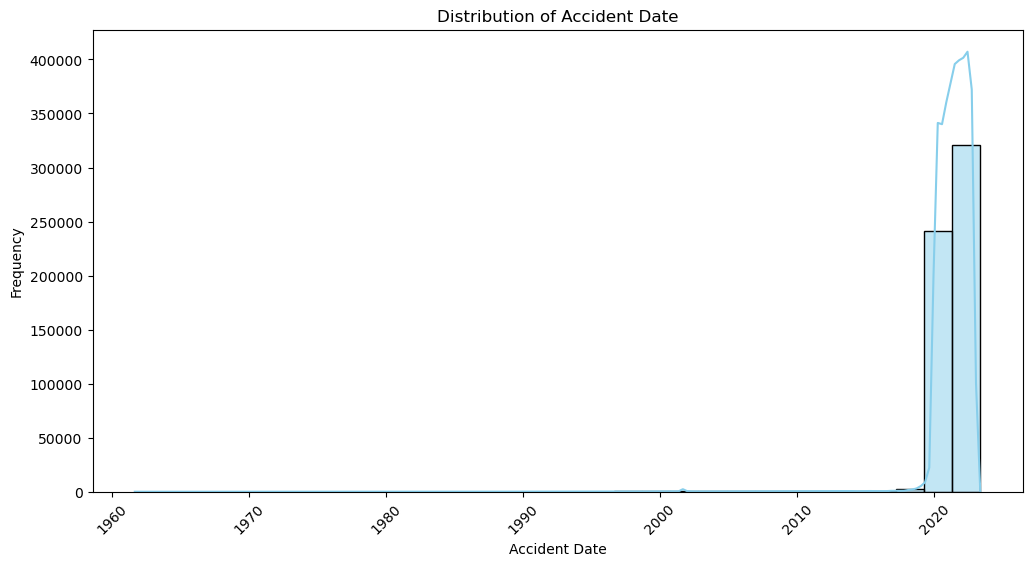

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display descriptive statistics for 'Accident Date'
accident_date_stats = base_df['Accident Date'].describe()
print("Descriptive statistics for Accident Date:")
print(accident_date_stats)

# Plot the distribution of 'Accident Date' over time
plt.figure(figsize=(12, 6))
sns.histplot(base_df['Accident Date'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Accident Date")
plt.xlabel("Accident Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

**Missing values Accident Date**: The recommended strategy is to fill missing `Accident Date` values with the median date. This approach is appropriate given the concentration of dates in recent years, ensuring that missing values are imputed with a typical date that represents the central tendency of the observed data without introducing bias from outliers or unusual values.

In [82]:
# Check for records where 'Accident_to_Assembly_Days' is negative
negative_accident_to_assembly = base_df[base_df['Accident_to_Assembly_Days'] < 0]

# Display the count of records with negative 'Accident_to_Assembly_Days' and the records themselves
negative_count = negative_accident_to_assembly.shape[0]
print(f"Number of records with negative Accident_to_Assembly_Days: {negative_count}")
negative_accident_to_assembly.head()

Number of records with negative Accident_to_Assembly_Days: 510


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,...,Number of Dependents,Accident_to_Assembly_Days,Accident_Month,Accident_Year,Accident_to_C2_Days,IME-4 Count_missing_flag,First Hearing Date_missing_flag,Assembly_to_FirstHearing_Days_missing_flag,Accident_to_C3_Days_missing_flag,C-3 Date_missing_flag
1926,2020-01-20,54.0,N,2020-01-06,1,0.00,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5395857,5. PPD SCH LOSS,...,1.0,-14.0,1.0,2020.0,59.0,1,0,0,0,0
2141,2020-01-22,64.0,N,2020-01-06,1,2285.61,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5395859,5. PPD SCH LOSS,...,0.0,-16.0,1.0,2020.0,57.0,0,0,0,0,0
3197,2020-01-16,56.0,N,2020-01-08,1,0.00,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5397886,5. PPD SCH LOSS,...,0.0,-8.0,1.0,2020.0,245.0,1,0,0,0,0
3348,2020-03-05,60.0,N,2020-01-08,1,1730.09,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5396990,5. PPD SCH LOSS,...,0.0,-57.0,3.0,2020.0,22.0,0,0,0,0,0
4364,2020-01-21,36.0,N,2020-01-09,1,2250.00,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,5399133,5. PPD SCH LOSS,...,3.0,-12.0,1.0,2020.0,403.0,0,0,0,0,0


In [83]:
# Remove records where 'Accident_to_Assembly_Days' is negative
base_df = base_df[base_df['Accident_to_Assembly_Days'] >= 0]

# Confirm removal by checking if there are any negative values remaining
negative_remaining = (base_df['Accident_to_Assembly_Days'] < 0).sum()
print(f"Number of records with negative Accident_to_Assembly_Days after removal: {negative_remaining}")

Number of records with negative Accident_to_Assembly_Days after removal: 0


**2.3.8. Alternative Dispute Resolution- DROPPING DUE TO LOW VARIANCE**

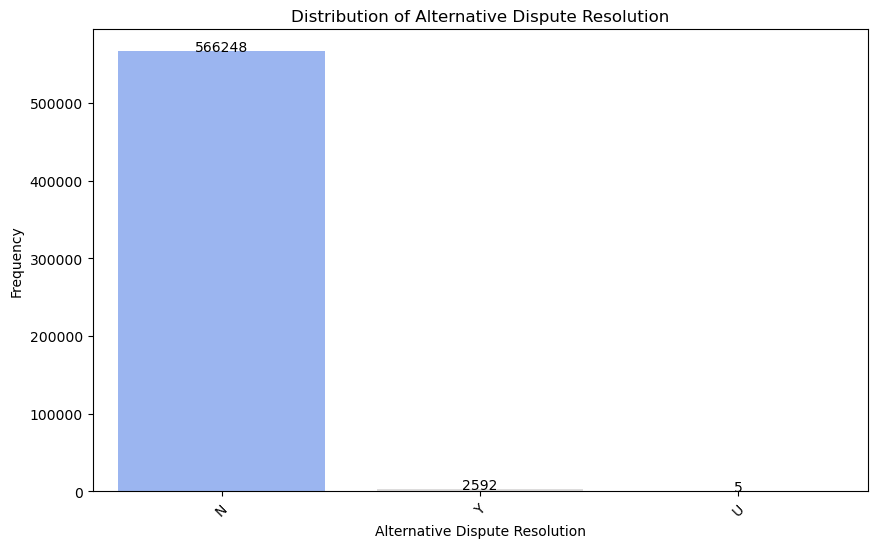

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'base_df' is your DataFrame and it has a column named 'Alternative Dispute Resolution'
# Replace this with the actual column name if it's different
adr_counts = base_df['Alternative Dispute Resolution'].value_counts()

# Plot the distribution of 'Alternative Dispute Resolution' with value labels on top of bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=adr_counts.index, y=adr_counts.values, palette="coolwarm")
plt.title("Distribution of Alternative Dispute Resolution")
plt.xlabel("Alternative Dispute Resolution")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Add value labels on top of each bar
for index, value in enumerate(adr_counts.values):
    ax.text(index, value + 50, f'{value}', ha='center')

plt.show()

In [85]:
# Drop the 'Alternative Dispute Resolution' column from the DataFrame
base_df = base_df.drop(columns=['Alternative Dispute Resolution'])

# Confirm that the column has been removed
print("Alternative Dispute Resolution column removed. Remaining columns:")
print(base_df.columns)

Alternative Dispute Resolution column removed. Remaining columns:
Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents',
       'Accident_to_Assembly_Days', 'Accident_Month', 'Accident_Year',
       'Accident_to_C2_Days', 'IME-4 Count_missing_flag',
       'First Hearing Date_missing_flag',
       'Assembly_to_FirstHearing_Days_missing_flag',
       'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag'],
      dtype='object')


****2.3.9. Number of Dependents****

Descriptive statistics for Number of Dependents:
count    568845.000000
mean          3.006575
std           2.001012
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64


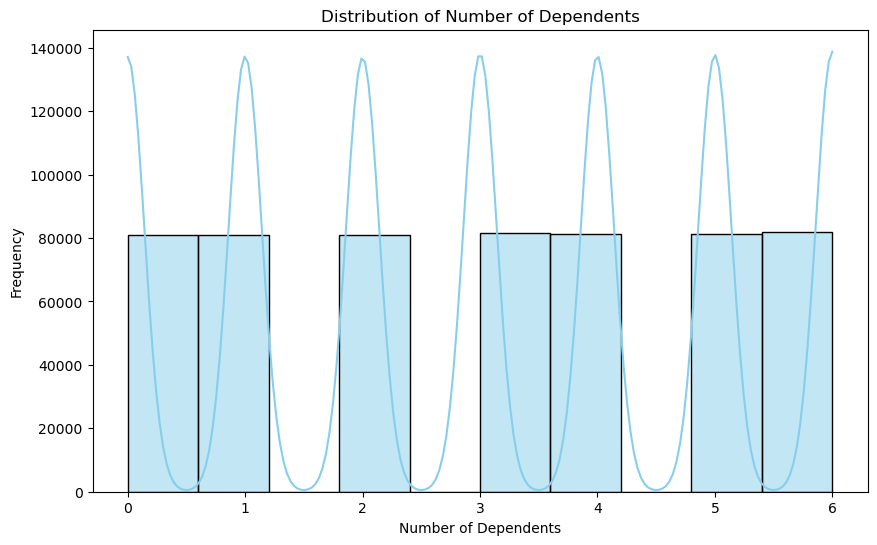

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display descriptive statistics for 'Number of Dependents'
dependents_stats = base_df['Number of Dependents'].describe()
print("Descriptive statistics for Number of Dependents:")
print(dependents_stats)

# Plot the distribution of 'Number of Dependents'
plt.figure(figsize=(10, 6))
sns.histplot(base_df['Number of Dependents'].dropna(), bins=10, kde=True, color='skyblue')
plt.title("Distribution of Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Frequency")
plt.show()

In [87]:
dependents_median = base_df['Number of Dependents'].median()
print(f"Median of Number of Dependents: {dependents_median}")

Median of Number of Dependents: 3.0


**Missing values Number of Dependents**: The recommended strategy is to fill missing values using random sampling based on the observed distribution. This approach is appropriate given the fairly uniform distribution across different values for `Number of Dependents`, allowing us to preserve the diversity of the data without over-representing any single category.

**2.3.10. Agreement Reached,
County of Injury,
Carrier Type,
Medical Fee Region,
District Name- FILL WITH MODE**

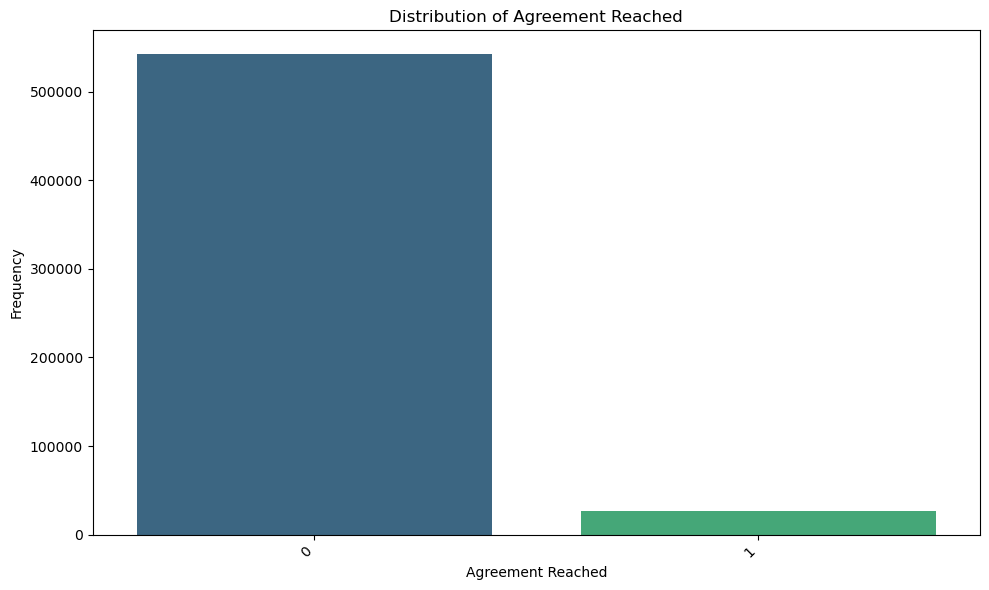

Most common value (mode) for Agreement Reached: 0



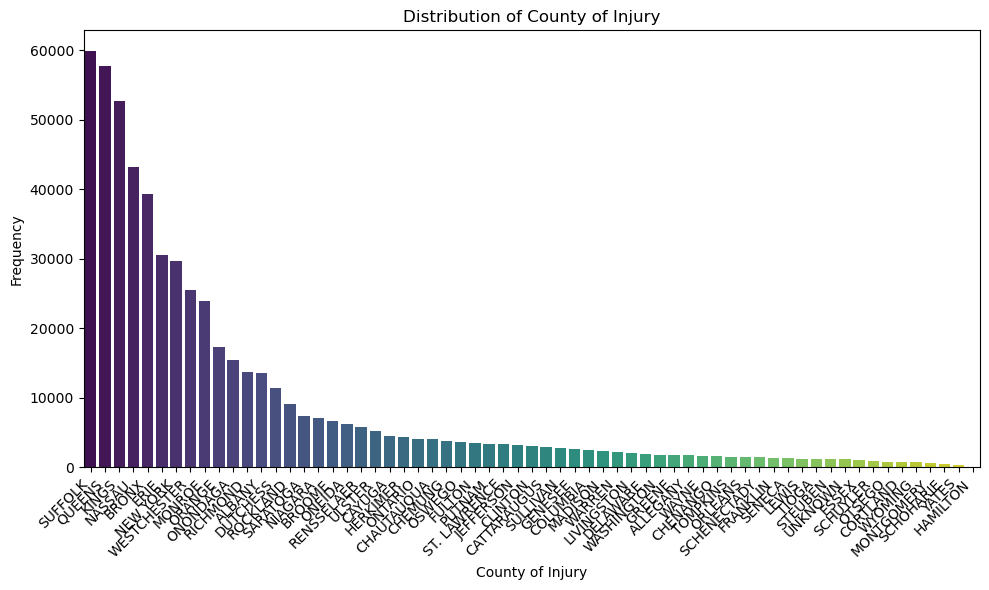

Most common value (mode) for County of Injury: SUFFOLK



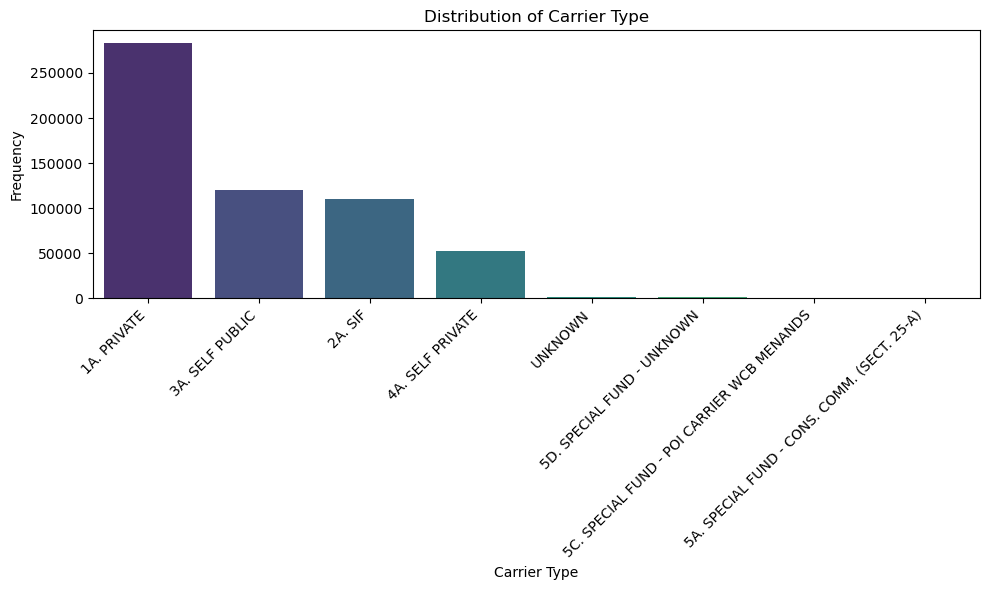

Most common value (mode) for Carrier Type: 1A. PRIVATE



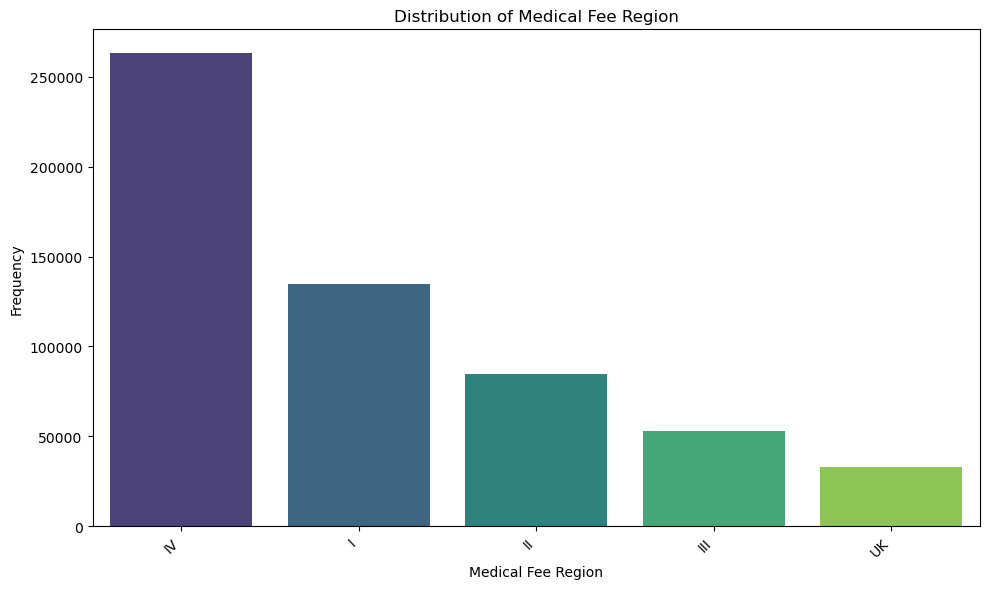

Most common value (mode) for Medical Fee Region: IV



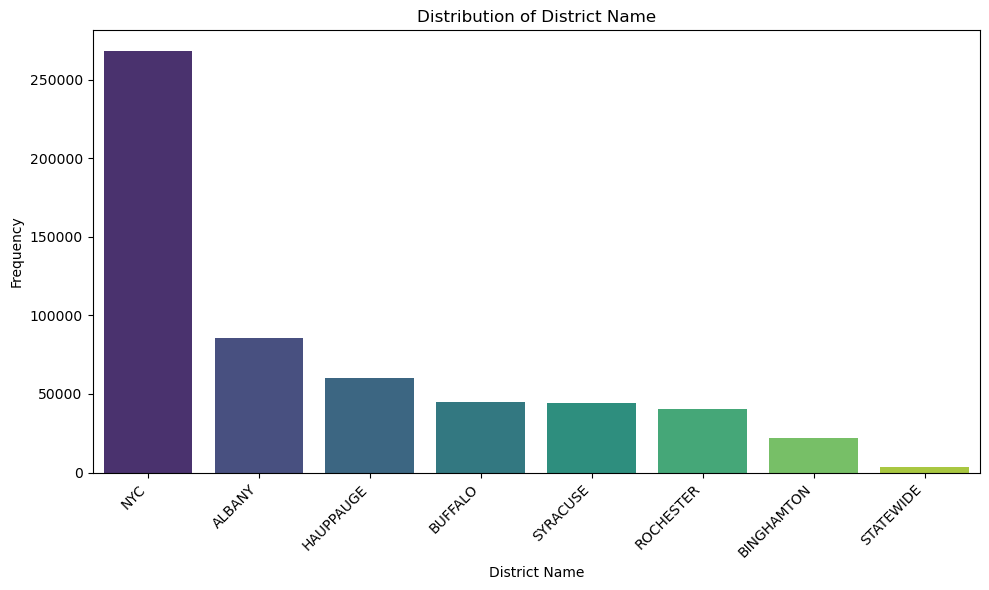

Most common value (mode) for District Name: NYC



In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns for analysis, excluding 'Carrier Name'
categorical_columns = [
    'Agreement Reached', 'County of Injury',
    'Carrier Type', 'Medical Fee Region', 'District Name'
]

# Iterate over each categorical column to calculate mode and display distribution
for column in categorical_columns:
    # Calculate the mode for each column
    mode = base_df[column].mode()[0]

    # Plot the distribution for each column
    plt.figure(figsize=(10, 6))
    sns.countplot(data=base_df, x=column, order=base_df[column].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Print mode for each column
    print(f"Most common value (mode) for {column}: {mode}\n")

**2.3.11. WCB Decision- DROPPING DUE TO NO VARIANCE**

In [89]:
# Drop the 'WCB Decision' column from the DataFrame
base_df = base_df.drop(columns=['WCB Decision'])

# Confirm that the column has been removed
print("WCB Decision column removed. Remaining columns:")
print(base_df.columns)

WCB Decision column removed. Remaining columns:
Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents',
       'Accident_to_Assembly_Days', 'Accident_Month', 'Accident_Year',
       'Accident_to_C2_Days', 'IME-4 Count_missing_flag',
       'First Hearing Date_missing_flag',
       'Assembly_to_FirstHearing_Days_missing_flag',
       'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag'],
      dtype='object')


**2.3.12. Carrier Name- Unknown category for missing values**

Most common value (mode) for Carrier Name: STATE INSURANCE FUND


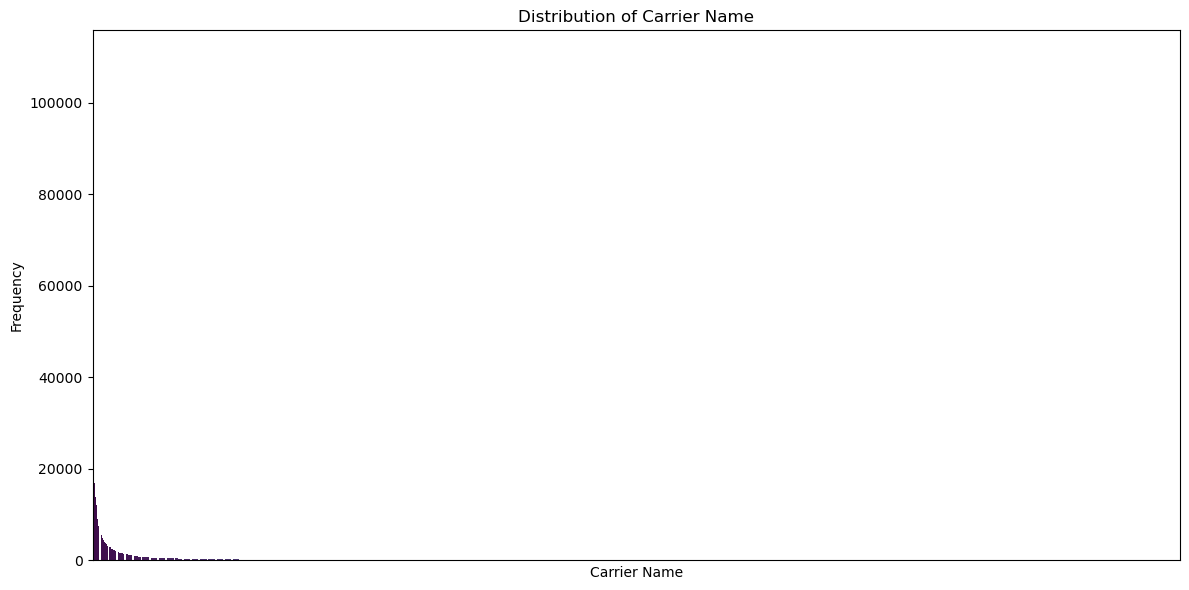

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mode for 'Carrier Name'
carrier_name_mode = base_df['Carrier Name'].mode()[0]

# Display the mode for 'Carrier Name'
print(f"Most common value (mode) for Carrier Name: {carrier_name_mode}")

# Plot the distribution of 'Carrier Name' without x-axis labels (due to potentially high number of categories)
plt.figure(figsize=(12, 6))
sns.countplot(data=base_df, x='Carrier Name', order=base_df['Carrier Name'].value_counts().index, palette="viridis")
plt.title("Distribution of Carrier Name")
plt.xlabel("Carrier Name")
plt.ylabel("Frequency")
plt.xticks([])  # Omitting x-axis labels for readability
plt.tight_layout()
plt.show()

In [91]:
# Convert missing values in 'Carrier Name' to a new category called 'Unknown'
base_df['Carrier Name'].fillna('Unknown', inplace=True)

# Confirm the replacement by checking if there are any remaining missing values
missing_values_count = base_df['Carrier Name'].isnull().sum()
print(f"Number of missing values in 'Carrier Name' after replacement: {missing_values_count}")
print("Updated 'Carrier Name' column with 'Unknown' category for missing values.")

Number of missing values in 'Carrier Name' after replacement: 0
Updated 'Carrier Name' column with 'Unknown' category for missing values.


**2.3.13. Gender**

In [92]:
# Display unique values in the 'Gender' column
unique_genders = base_df['Gender'].unique()
print("Unique values in Gender column:")
print(unique_genders)

Unique values in Gender column:
['M' 'F' 'U' 'X']


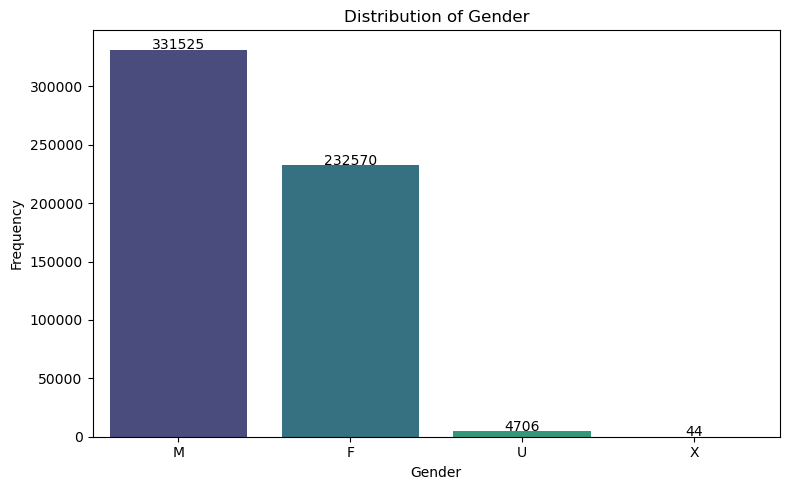

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency counts for each gender category
gender_counts = base_df['Gender'].value_counts()

# Plot the distribution of 'Gender' with values displayed on top of bars
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")

# Add value labels on top of each bar
for index, value in enumerate(gender_counts.values):
    ax.text(index, value + 500, f'{value}', ha='center')

plt.tight_layout()
plt.show()

In [94]:
# Replace any values in the 'Gender' column labeled as 'X' with 'U'
base_df['Gender'] = base_df['Gender'].replace('X', 'U')

# Confirm the replacement by displaying the unique values in the 'Gender' column
unique_genders_updated = base_df['Gender'].unique()
print("Updated unique values in Gender column:")
print(unique_genders_updated)

Updated unique values in Gender column:
['M' 'F' 'U']


**Missing values Gender**: The recommended strategy is to fill missing values with "U" (Unknown). This approach is appropriate because it avoids making assumptions about missing gender information and keeps a clear distinction between known and unknown values. Using "U" preserves the integrity of the data by indicating that these entries had missing values rather than inferring gender based on the distribution, which aligns with best practices for handling categorical missing values in sensitive information.

**2.3.14. Claim Injury Type**

Most common value (mode) for Claim Injury Type: 2. NON-COMP


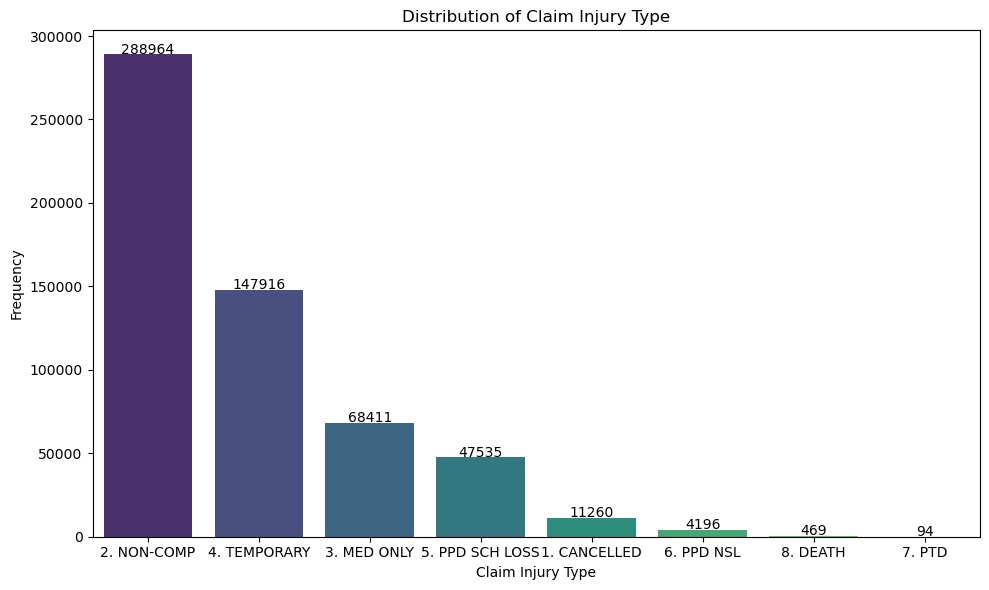

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency counts for 'Claim Injury Type' and identify the mode
claim_injury_type_counts = base_df['Claim Injury Type'].value_counts()
claim_injury_type_mode = claim_injury_type_counts.idxmax()

# Display the mode for 'Claim Injury Type'
print(f"Most common value (mode) for Claim Injury Type: {claim_injury_type_mode}")

# Plot the distribution of 'Claim Injury Type' with values displayed on top of bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=claim_injury_type_counts.index, y=claim_injury_type_counts.values, palette="viridis")
plt.title("Distribution of Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Frequency")

# Add value labels on top of each bar
for index, value in enumerate(claim_injury_type_counts.values):
    ax.text(index, value + 500, f'{value}', ha='center')

plt.tight_layout()
plt.show()

**Missing values in Claim Injury Type (Target Variable)**: The recommended strategy is to exclude rows with missing values in `Claim Injury Type` during model training. This approach is essential to prevent data leakage, ensuring that the model learns only from complete data. By excluding these rows, we maintain data integrity and avoid introducing bias into the training process.

In [96]:
base_df.columns

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents',
       'Accident_to_Assembly_Days', 'Accident_Month', 'Accident_Year',
       'Accident_to_C2_Days', 'IME-4 Count_missing_flag',
       'First Hearing Date_missing_flag',
       'Assembly_to_FirstHearing_Days_missing_flag',
       'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag'],
      dtype='object')

In [97]:
len(base_df.columns)

30

**2.4. New features**

**Note- other features have been created so far- We will be adding some new ones**

In [98]:
# Convert dates to datetime format if they are not already
base_df['Accident Date'] = pd.to_datetime(base_df['Accident Date'])
base_df['Assembly Date'] = pd.to_datetime(base_df['Assembly Date'])

# Calculate the time difference between dates in days
base_df['Days_to_Assembly'] = (base_df['Assembly Date'] - base_df['Accident Date']).dt.days

In [99]:
base_df.head(5)

,Accident Date,Age at Injury,Assembly Date,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,...,Accident_to_Assembly_Days,Accident_Month,Accident_Year,Accident_to_C2_Days,IME-4 Count_missing_flag,First Hearing Date_missing_flag,Assembly_to_FirstHearing_Days_missing_flag,Accident_to_C3_Days_missing_flag,C-3 Date_missing_flag,Days_to_Assembly
0,2019-12-30,31.0,2020-01-01,0,0.00,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,...,2.0,12.0,2019.0,1.0,1,1,1,1,1,2
1,2019-08-30,46.0,2020-01-01,1,1745.93,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,...,124.0,8.0,2019.0,124.0,0,0,0,0,0,124
2,2019-12-06,40.0,2020-01-01,0,1434.80,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,...,26.0,12.0,2019.0,26.0,1,1,1,1,1,26
4,2019-12-30,61.0,2020-01-01,0,0.00,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,...,2.0,12.0,2019.0,1.0,1,1,1,1,1,2
5,2019-12-26,67.0,2020-01-01,0,0.00,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,5393863,3. MED ONLY,SUFFOLK,...,6.0,12.0,2019.0,5.0,1,1,1,1,1,6


In [100]:
base_df['Accident_Year'] = base_df['Accident Date'].dt.year
base_df['Accident_Month'] = base_df['Accident Date'].dt.month
base_df['Accident_DayOfWeek'] = base_df['Accident Date'].dt.dayofweek

In [101]:
# Create a new column 'Volunteer Status' to separate volunteer workers from non-volunteers
# 1 indicates a volunteer (salary is 0), 0 indicates a non-volunteer (salary is non-zero)
base_df['Volunteer Status'] = base_df['Average Weekly Wage'].apply(lambda x: 1 if x == 0 else 0)

# Display the first few rows to confirm the new column
print(base_df[['Average Weekly Wage', 'Volunteer Status']].head())

   Average Weekly Wage  Volunteer Status
0                 0.00                 1
1              1745.93                 0
2              1434.80                 0
4                 0.00                 1
5                 0.00                 1


**2.5. Scaling analysis and strategy**

**Feature Scaling Decision**: We have decided not to scale the features in this dataset because we are using a decision tree model. Decision trees are not sensitive to the scale of features, as they make splits based on feature thresholds independently of their range. Thus, scaling would not impact the model’s performance or decision-making process.

**3. Feature Selection**

**So far we've removed some features based on the following criteria: no variance and missing value threshold (over 60% missing values). We will now use other methods such as correlation analysis, mutual information, chi-square test and anova**

In [102]:
#base_df.columns

In [103]:
# List of numerical features
numerical_features = [
    'Age at Injury', 'Average Weekly Wage', 'Number of Dependents',
    'Accident_to_Assembly_Days', 'Accident_to_C2_Days',
    'Accident_Month', 'Accident_Year', 'Days_to_Assembly', 'Accident_DayOfWeek',
]

# List of categorical features
categorical_features = [
    #'Accident Date', 'Assembly Date',
    'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
    'County of Injury', 'District Name',
    'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
]

# List of binary flag features (categorical as well)
binary_flag_features = [
    'IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
    'Assembly_to_FirstHearing_Days_missing_flag',
    'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag', 'COVID-19 Indicator',  'Volunteer Status', 'Attorney/Representative', 'Agreement Reached'
]

**3.1. Numerical features**

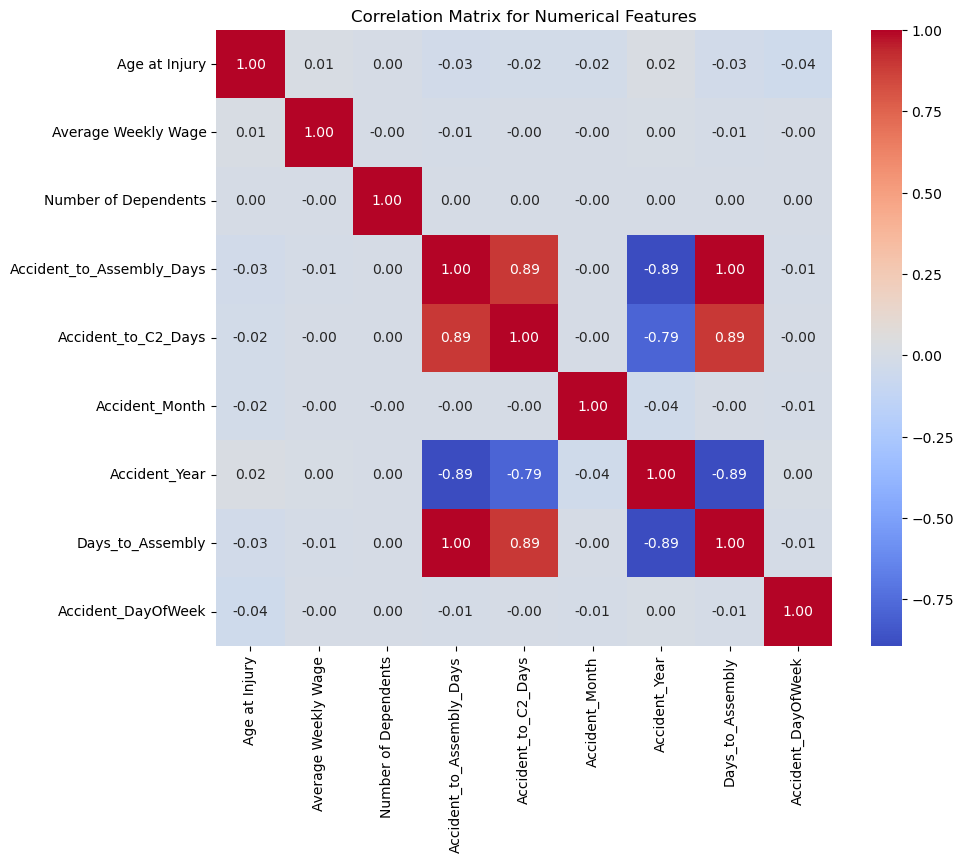

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical features
numerical_corr = base_df[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [105]:
from scipy.stats import f_oneway

for feature in numerical_features:
    groups = [base_df[feature][base_df['Claim Injury Type'] == cls].dropna() for cls in base_df['Claim Injury Type'].unique()]
    stat, p = f_oneway(*groups)
    print(f"{feature} - ANOVA F-statistic={stat:.3f}, p-value={p:.3f}")

Age at Injury - ANOVA F-statistic=1090.713, p-value=0.000
Average Weekly Wage - ANOVA F-statistic=682.890, p-value=0.000
Number of Dependents - ANOVA F-statistic=0.425, p-value=0.888
Accident_to_Assembly_Days - ANOVA F-statistic=794.126, p-value=0.000
Accident_to_C2_Days - ANOVA F-statistic=636.231, p-value=0.000
Accident_Month - ANOVA F-statistic=46.884, p-value=0.000
Accident_Year - ANOVA F-statistic=756.907, p-value=0.000
Days_to_Assembly - ANOVA F-statistic=794.126, p-value=0.000
Accident_DayOfWeek - ANOVA F-statistic=6.891, p-value=0.000


In [106]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Treat missing values within the loop without modifying the original base_df
mi_scores_list = []
for feature in numerical_features:
    # Handle missing values by filling with median (as discussed previously)
    feature_data = base_df[feature].fillna(base_df[feature].median())

    # Calculate mutual information score
    mi_score = mutual_info_classif(feature_data.values.reshape(-1, 1), base_df['Claim Injury Type'])[0]
    mi_scores_list.append((feature, mi_score))

# Convert to a sorted pandas Series for readability
mi_scores = pd.Series(dict(mi_scores_list)).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_scores)

Mutual Information Scores:
Average Weekly Wage          0.480955
Accident_to_C2_Days          0.037943
Accident_Year                0.031771
Days_to_Assembly             0.019318
Accident_to_Assembly_Days    0.019201
Age at Injury                0.014806
Number of Dependents         0.005879
Accident_DayOfWeek           0.005647
Accident_Month               0.004890
dtype: float64


*   **Remove Number of Dependents due to its low relevance.**
*   **Remove either Days_to_Assembly or Accident_to_C2_Days due to redundancy and high correlation with other features**

In [107]:
# Drop the Number of Dependents column
base_df = base_df.drop(columns=['Number of Dependents'])

# Drop the Days_to_Assembly column
base_df = base_df.drop(columns=['Days_to_Assembly'])

# Confirm removal
#base_df.columns

**3.2. Categorical Features**

**3.2.1. Binary features**

In [108]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Calculate mutual information between each binary flag feature and the target variable
mi_scores_flag_features = []
for feature in binary_flag_features:
    # Calculate mutual information score for each binary flag feature
    mi_score = mutual_info_classif(base_df[feature].values.reshape(-1, 1), base_df['Claim Injury Type'])[0]
    mi_scores_flag_features.append((feature, mi_score))

# Convert to a sorted pandas Series for readability
mi_scores_flags = pd.Series(dict(mi_scores_flag_features)).sort_values(ascending=False)
print("Mutual Information Scores for Binary Flag Features:")
print(mi_scores_flags)

Mutual Information Scores for Binary Flag Features:
Volunteer Status                              0.538120
IME-4 Count_missing_flag                      0.262712
Attorney/Representative                       0.216139
First Hearing Date_missing_flag               0.215702
Assembly_to_FirstHearing_Days_missing_flag    0.215620
Accident_to_C3_Days_missing_flag              0.175544
C-3 Date_missing_flag                         0.175473
Agreement Reached                             0.064826
COVID-19 Indicator                            0.006785
dtype: float64


In [109]:
from sklearn.feature_selection import chi2
import pandas as pd

# Ensure binary flag features are integers (0, 1) as required by chi-square test
chi2_scores_flag_features = []
for feature in binary_flag_features:
    # Fill missing values with 0 if any and convert to integer type
    feature_data = base_df[feature].fillna(0).astype(int)

    # Compute chi-square score and p-value for each binary flag feature
    chi2_score, p_value = chi2(feature_data.values.reshape(-1, 1), base_df['Claim Injury Type'])
    chi2_scores_flag_features.append((feature, chi2_score[0], p_value[0]))

# Convert to DataFrame for readability and sorting
chi2_df = pd.DataFrame(chi2_scores_flag_features, columns=["Feature", "Chi2 Score", "p-value"]).sort_values(by="Chi2 Score", ascending=False)
print(chi2_df)


                                      Feature     Chi2 Score  p-value
6                            Volunteer Status  156247.439928      0.0
7                     Attorney/Representative  149361.000878      0.0
8                           Agreement Reached   70347.154211      0.0
0                    IME-4 Count_missing_flag   50869.242999      0.0
1             First Hearing Date_missing_flag   43659.075003      0.0
2  Assembly_to_FirstHearing_Days_missing_flag   43659.075003      0.0
3            Accident_to_C3_Days_missing_flag   41572.666382      0.0
4                       C-3 Date_missing_flag   41572.666382      0.0
5                          COVID-19 Indicator    5426.089414      0.0





*   **Remove COVID-19 Indicator due to its low mutual information score and comparatively low chi-square score**



In [110]:
# Drop the COVID-19 Indicator column
base_df = base_df.drop(columns=['COVID-19 Indicator'])

# Confirm removal
base_df.columns

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
       'County of Injury', 'District Name', 'Gender', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Accident_to_Assembly_Days', 'Accident_Month',
       'Accident_Year', 'Accident_to_C2_Days', 'IME-4 Count_missing_flag',
       'First Hearing Date_missing_flag',
       'Assembly_to_FirstHearing_Days_missing_flag',
       'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag',
       'Accident_DayOfWeek', 'Volunteer Status'],
      dtype='object')

**3.2.2. Other categorical features**

In [111]:
from sklearn.feature_selection import mutual_info_classif, chi2
import pandas as pd

# Choose a single feature for analysis (example: 'Carrier Type')
feature = 'Carrier Type'

# Fill missing values with the mode for the chosen feature
feature_data = base_df[feature].fillna(base_df[feature].mode()[0])

# One-hot encode the feature and drop one column to avoid redundancy
feature_data_encoded = pd.get_dummies(feature_data, prefix=feature, drop_first=True)

# Calculate mutual information score for the one-hot encoded data
mi_score = mutual_info_classif(feature_data_encoded, base_df['Claim Injury Type']).mean()  # Mean score of all dummy columns
print(f"Mutual Information Score for {feature}: {mi_score}")

# Calculate chi-square score and p-value
chi2_score, p_value = chi2(feature_data_encoded, base_df['Claim Injury Type'])
print(f"Chi-Square Score for {feature}: {chi2_score.sum()}, p-value: {p_value.min()}")

Mutual Information Score for Carrier Type: 0.004216768219316666
Chi-Square Score for Carrier Type: 18137.56593686511, p-value: 0.0


In [112]:
# County of Injury
#feature = 'County of Injury'
#feature_data = base_df[feature].fillna(base_df[feature].mode()[0])
#feature_data_encoded = pd.get_dummies(feature_data, prefix=feature, drop_first=True)

#mi_score = mutual_info_classif(feature_data_encoded, base_df['Claim Injury Type']).mean()
#print(f"Mutual Information Score for {feature}: {mi_score}")

#chi2_score, p_value = chi2(feature_data_encoded, base_df['Claim Injury Type'])
#print(f"Chi-Square Score for {feature}: {chi2_score.sum()}, p-value: {p_value.min()}")

In [113]:
# District Name
#feature = 'District Name'
#feature_data = base_df[feature].fillna(base_df[feature].mode()[0])
#feature_data_encoded = pd.get_dummies(feature_data, prefix=feature, drop_first=True)

#mi_score = mutual_info_classif(feature_data_encoded, base_df['Claim Injury Type']).mean()
#print(f"Mutual Information Score for {feature}: {mi_score}")

#chi2_score, p_value = chi2(feature_data_encoded, base_df['Claim Injury Type'])
#print(f"Chi-Square Score for {feature}: {chi2_score.sum()}, p-value: {p_value.min()}")

In [114]:
# Industry Code
#feature = 'Industry Code'
#feature_data = base_df[feature].fillna(base_df[feature].mode()[0])
#feature_data_encoded = pd.get_dummies(feature_data, prefix=feature, drop_first=True)

#mi_score = mutual_info_classif(feature_data_encoded, base_df['Claim Injury Type']).mean()
#print(f"Mutual Information Score for {feature}: {mi_score}")

#chi2_score, p_value = chi2(feature_data_encoded, base_df['Claim Injury Type'])
#print(f"Chi-Square Score for {feature}: {chi2_score.sum()}, p-value: {p_value.min()}")

In [115]:
# Medical Fee Region
#feature = 'Medical Fee Region'
#feature_data = base_df[feature].fillna(base_df[feature].mode()[0])
#feature_data_encoded = pd.get_dummies(feature_data, prefix=feature, drop_first=True)

#mi_score = mutual_info_classif(feature_data_encoded, base_df['Claim Injury Type']).mean()
#print(f"Mutual Information Score for {feature}: {mi_score}")

#chi2_score, p_value = chi2(feature_data_encoded, base_df['Claim Injury Type'])
#print(f"Chi-Square Score for {feature}: {chi2_score.sum()}, p-value: {p_value.min()}")

In [116]:
# WCIO Cause of Injury Code
#feature = 'WCIO Cause of Injury Code'
#feature_data = base_df[feature].fillna(base_df[feature].mode()[0])
#feature_data_encoded = pd.get_dummies(feature_data, prefix=feature, drop_first=True)

#mi_score = mutual_info_classif(feature_data_encoded, base_df['Claim Injury Type']).mean()
#print(f"Mutual Information Score for {feature}: {mi_score}")

#chi2_score, p_value = chi2(feature_data_encoded, base_df['Claim Injury Type'])
#print(f"Chi-Square Score for {feature}: {chi2_score.sum()}, p-value: {p_value.min()}")

In [117]:
# WCIO Nature of Injury Code
#feature = 'WCIO Nature of Injury Code'
#feature_data = base_df[feature].fillna(base_df[feature].mode()[0])
#feature_data_encoded = pd.get_dummies(feature_data, prefix=feature, drop_first=True)

#mi_score = mutual_info_classif(feature_data_encoded, base_df['Claim Injury Type']).mean()
#print(f"Mutual Information Score for {feature}: {mi_score}")

#chi2_score, p_value = chi2(feature_data_encoded, base_df['Claim Injury Type'])
#print(f"Chi-Square Score for {feature}: {chi2_score.sum()}, p-value: {p_value.min()}")

In [118]:
# WCIO Part Of Body Code
#feature = 'WCIO Part Of Body Code'
#feature_data = base_df[feature].fillna(base_df[feature].mode()[0])
#feature_data_encoded = pd.get_dummies(feature_data, prefix=feature, drop_first=True)

#mi_score = mutual_info_classif(feature_data_encoded, base_df['Claim Injury Type']).mean()
#print(f"Mutual Information Score for {feature}: {mi_score}")

#chi2_score, p_value = chi2(feature_data_encoded, base_df['Claim Injury Type'])
#print(f"Chi-Square Score for {feature}: {chi2_score.sum()}, p-value: {p_value.min()}")



1. **Carrier Type**
2. **County of Injury**
3. **Medical Fee Region**
4. **Zip Code**
5. **District Name**
6.**Carrier Name**
These features exhibit low mutual information scores and relatively lower chi-square scores compared to others in the list, indicating weaker relevance to the target variable.

In [119]:
# List of columns to remove
columns_to_remove = [
    'Carrier Type', 'County of Injury',
    'Medical Fee Region', 'Zip Code', 'District Name', 'Carrier Name'
]

# Drop specified columns
base_df = base_df.drop(columns=columns_to_remove)

base_df.columns

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Claim Identifier',
       'Claim Injury Type', 'Gender', 'Industry Code',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Agreement Reached',
       'Accident_to_Assembly_Days', 'Accident_Month', 'Accident_Year',
       'Accident_to_C2_Days', 'IME-4 Count_missing_flag',
       'First Hearing Date_missing_flag',
       'Assembly_to_FirstHearing_Days_missing_flag',
       'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag',
       'Accident_DayOfWeek', 'Volunteer Status'],
      dtype='object')

In [120]:
#len(base_df.columns)

**3.3. RFE**

In [121]:
# List of numerical features
numerical_features = [
    'Age at Injury', 'Average Weekly Wage',
    'Accident_to_Assembly_Days', 'Accident_to_C2_Days',
    'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek'
]

# List of binary features
binary_flag_features = [
    'IME-4 Count_missing_flag', 'First Hearing Date_missing_flag', 'Gender'
    'Assembly_to_FirstHearing_Days_missing_flag',
    'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative', 'Agreement Reached'
]

# List of categorical features
categorical_features = [
    'Industry Code', 'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'
]

In [122]:
base_df.columns

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Claim Identifier',
       'Claim Injury Type', 'Gender', 'Industry Code',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Agreement Reached',
       'Accident_to_Assembly_Days', 'Accident_Month', 'Accident_Year',
       'Accident_to_C2_Days', 'IME-4 Count_missing_flag',
       'First Hearing Date_missing_flag',
       'Assembly_to_FirstHearing_Days_missing_flag',
       'Accident_to_C3_Days_missing_flag', 'C-3 Date_missing_flag',
       'Accident_DayOfWeek', 'Volunteer Status'],
      dtype='object')

In [123]:
base_df = base_df.set_index('Claim Identifier')

In [124]:
# Drop rows with missing target values
base_df = base_df.dropna(subset=['Claim Injury Type'])

**This cell below couldn't be run due to time and computational performance constraints**

In [125]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# import pandas as pd
# import numpy as np

# # Copy the base dataframe to avoid modifying it directly and drop rows with missing target values
# df = base_df.copy()
# df = df.dropna(subset=['Claim Injury Type'])  # Drop rows where target variable is missing

# # Handle Outliers in 'Age at Injury' using the IQR method
# Q1 = df['Age at Injury'].quantile(0.25)
# Q3 = df['Age at Injury'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df['Age at Injury'] < (Q1 - 1.5 * IQR)) | (df['Age at Injury'] > (Q3 + 1.5 * IQR)))]  # Remove outliers

# # Define imputation strategy for numerical features
# numerical_imputer = ColumnTransformer(
#     transformers=[
#         ('age_at_injury', SimpleImputer(strategy='median'), ['Age at Injury']),  # Fill 'Age at Injury' with median
#         ('average_weekly_wage', SimpleImputer(strategy='constant', fill_value=0), ['Average Weekly Wage']),  # Fill 'Average Weekly Wage' with 0
#         ('accident_to_c2_days', SimpleImputer(strategy='mean'), ['Accident_to_C2_Days'])  # Fill 'Accident_to_C2_Days' with mean
#     ],
#     remainder='passthrough'
# )

# # Define imputation strategy for binary flag features
# binary_imputer = ColumnTransformer(
#     transformers=[
#         ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features)  # Fill binary flags with mode
#     ],
#     remainder='passthrough'
# )

# # Define imputation and encoding for categorical features
# categorical_imputer_encoder = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill categorical features with mode
#     ('onehot', OneHotEncoder(drop='first', sparse_output=False))  # One-hot encode categorical features, dropping the first category to avoid redundancy
# ])

# # Combine all preprocessing steps into a single transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_imputer, numerical_features),  # Apply numerical imputation
#         ('bin', binary_imputer, binary_flag_features),  # Apply binary flag imputation
#         ('cat', categorical_imputer_encoder, categorical_features)  # Apply categorical imputation and encoding
#     ]
# )

# # Separate target and features for RFE
# y = df['Claim Injury Type']  # Target variable
# X = df.drop(columns=['Claim Injury Type'])  # Features

# # Set up RFE with DecisionTreeClassifier within a pipeline
# rfe_model = DecisionTreeClassifier()  # Use DecisionTreeClassifier as the estimator
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Apply preprocessing
#     ('feature_selection', RFE(estimator=rfe_model, n_features_to_select=20)),  # Apply RFE to select top 20 features
#     ('classifier', rfe_model)  # Classifier model
# ])

# # Set up Stratified K-Fold cross-validation
# strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified K-Fold to maintain target distribution

# # Evaluate the pipeline using cross-validation with macro F1 score
# scores = cross_val_score(pipeline, X, y, cv=strat_kfold, scoring='f1_macro')  # Evaluate with F1 Macro score

# # Display cross-validated F1 Macro scores and mean score
# print("Cross-validated F1 Macro scores:", scores)
# print("Mean F1 Macro score:", scores.mean())

# # Fit the pipeline to the full data to get the selected features after RFE
# pipeline.fit(X, y)  # Fit the pipeline
# selected_features = X.columns[pipeline.named_steps['feature_selection'].support_]  # Extract selected features after RFE
# print("Selected features after RFE:", selected_features)  # Display selected features

# **4. Modelling**

**4.1. Type of problem and metrics**

**This is a multiclass classification problem. We are predicting the Claim Injury Type (target variable), which has multiple classes indicating different types of injuries. We will be testing several models and assess their performances.**

**We use precision to evaluate the model because it measures the correctness of positive predictions, making it ideal for scenarios where false positives are costly. By focusing on the proportion of true positives among all predicted positives, precision ensures the model prioritizes accurate and confident predictions for each class.**

**We use recall to evaluate the model because it measures the model's ability to capture all true positives, making it ideal for scenarios where false negatives are critical. By focusing on the proportion of correctly identified positives among all actual positives, recall ensures the model does not overlook relevant instances across categories.**

**We use macro F1 score to evaluate the model because it gives equal weight to all classes, making it ideal for handling class imbalance in the target variable. By averaging precision and recall for each class, macro F1 score ensures balanced performance across categories.**

**4.2. Decision Tree Classifier**

In [117]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use the entire dataset without sampling
df_full = base_df.copy()

# List of feature sets
numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# Preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('column_transformer', ColumnTransformer(
        transformers=[
            # Numerical features: fill missing values with the appropriate strategies
            ('num', SimpleImputer(strategy='median'), numerical_features[:1]),  # Age at Injury
            ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),  # Average Weekly Wage
            ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),  # Accident_to_* features
            
            # Binary flag features: fill missing values with the mode
            ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
            
            # Categorical features: fill missing values with the mode, then one-hot encode
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
            ]), categorical_features)
        ]
    )),
    ('scaler', MinMaxScaler())
])

# Define the model pipeline, including the preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42))
])

# Define target and features
y = df_full['Claim Injury Type']
X = df_full.drop(columns=['Claim Injury Type'])

# Use Stratified K-Fold cross-validation
strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Define custom scoring for precision, recall, and F1 macro
scoring_metrics = {
    'f1_macro': 'f1_macro',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# Evaluate the pipeline using cross-validation with multiple metrics
results = cross_validate(
    pipeline, X, y, cv=strat_kfold, scoring=scoring_metrics, return_train_score=True
)

# Extract training and validation scores
train_f1_scores = results['train_f1_macro']
validation_f1_scores = results['test_f1_macro']

train_precision_scores = results['train_precision_macro']
validation_precision_scores = results['test_precision_macro']

train_recall_scores = results['train_recall_macro']
validation_recall_scores = results['test_recall_macro']

# Print F1 Macro scores
print("Cross-validated Training F1 Macro scores:", train_f1_scores)
print("Mean Training F1 Macro score:", train_f1_scores.mean())

print("Cross-validated Validation F1 Macro scores:", validation_f1_scores)
print("Mean Validation F1 Macro score:", validation_f1_scores.mean())

# Print Precision Macro scores
print("Cross-validated Training Precision Macro scores:", train_precision_scores)
print("Mean Training Precision Macro score:", train_precision_scores.mean())

print("Cross-validated Validation Precision Macro scores:", validation_precision_scores)
print("Mean Validation Precision Macro score:", validation_precision_scores.mean())

# Print Recall Macro scores
print("Cross-validated Training Recall Macro scores:", train_recall_scores)
print("Mean Training Recall Macro score:", train_recall_scores.mean())

print("Cross-validated Validation Recall Macro scores:", validation_recall_scores)
print("Mean Validation Recall Macro score:", validation_recall_scores.mean())

Cross-validated Training F1 Macro scores: [0.37260514 0.36995396 0.37153977 0.37072336 0.37556709 0.36939947
 0.36868971 0.37052568]
Mean Training F1 Macro score: 0.37112552342580385
Cross-validated Validation F1 Macro scores: [0.34552805 0.35859049 0.34992965 0.35296201 0.3576072  0.35629149
 0.37043402 0.34531486]
Mean Validation F1 Macro score: 0.3545822210847738
Cross-validated Training Precision Macro scores: [0.52715794 0.62223187 0.53209447 0.62044606 0.60264249 0.61183054
 0.51572173 0.62315235]
Mean Training Precision Macro score: 0.5819096799157202
Cross-validated Validation Precision Macro scores: [0.47066338 0.50254573 0.48979737 0.47135086 0.45822461 0.4836987
 0.49076075 0.45552704]
Mean Validation Precision Macro score: 0.4778210540759523
Cross-validated Training Recall Macro scores: [0.35203314 0.34972478 0.3518067  0.35036652 0.35638594 0.34947174
 0.34882352 0.35078493]
Mean Training Recall Macro score: 0.3511746569710956
Cross-validated Validation Recall Macro scores

In [118]:
#import pandas as pd
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import f1_score
#import numpy as np

# Use the entire dataset without sampling
#df_full = base_df.copy()

# List of feature sets
#numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      #'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

#binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag', 
                        #'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        #'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

#categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# Preprocessing pipeline
#preprocessor = ColumnTransformer(
    #transformers=[
        # Numerical features: fill missing values with the appropriate strategies
        #('num', SimpleImputer(strategy='median'), numerical_features[:1]), # Age at Injury
        #('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]), # Average Weekly Wage
        #('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]), # Accident_to_* features
        
        # Binary flag features: fill missing values with the mode
        #('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
        
        # Categorical features: fill missing values with the mode, then one-hot encode
        #('cat', Pipeline(steps=[
            #('imputer', SimpleImputer(strategy='most_frequent')),
            #('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
        #]), categorical_features)
    #]
#)

# Define the model pipeline, including the preprocessor and classifier
#pipeline = Pipeline(steps=[
    #('preprocessor', preprocessor),
    #('classifier', DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42))
#])

# Define target and features
#y = df_full['Claim Injury Type']
#X = df_full.drop(columns=['Claim Injury Type'])

# Use Stratified K-Fold cross-validation
#strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Get cross-validated predictions for each sample in the dataset
#cross_val_predictions = cross_val_predict(pipeline, X, y, cv=strat_kfold)

#pipeline.fit(X, y)
#final_predictions = pipeline.predict(X)

#print("Final model predictions:", final_predictions)

| Metric                        | Fold 1   | Fold 2   | Fold 3   | Fold 4   | Fold 5   | Fold 6   | Fold 7   | Fold 8   | Mean    |
|-------------------------------|----------|----------|----------|----------|----------|----------|----------|----------|---------|
| **Training F1 Macro**         | 0.37206  | 0.36995  | 0.37154  | 0.37072  | 0.37557  | 0.36890  | 0.37053  | 0.37026  | 0.37113 |
| **Validation F1 Macro**       | 0.34553  | 0.35859  | 0.34993  | 0.35296  | 0.35761  | 0.35629  | 0.37043  | 0.34531  | 0.35458 |
| **Training Precision Macro**  | 0.52716  | 0.62232  | 0.53209  | 0.62045  | 0.60264  | 0.61183  | 0.51572  | 0.62315  | 0.58191 |
| **Validation Precision Macro**| 0.47066  | 0.50255  | 0.48980  | 0.47135  | 0.45822  | 0.48370  | 0.49076  | 0.45557  | 0.47782 |
| **Training Recall Macro**     | 0.35203  | 0.34972  | 0.35181  | 0.35037  | 0.35639  | 0.34882  | 0.35075  | 0.35075  | 0.35117 |
| **Validation Recall Macro**   | 0.33576  | 0.34230  | 0.33697  | 0.33812  | 0.34492  | 0.34054  | 0.35016  | 0.33625  | 0.34067 |

**4.3. Random Forest Classifier**

In [131]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use the entire dataset without sampling
df_full = base_df.copy()

# List of feature sets
numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# Preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('column_transformer', ColumnTransformer(
        transformers=[
            # Numerical features: fill missing values with the appropriate strategies
            ('num', SimpleImputer(strategy='median'), numerical_features[:1]),  # Age at Injury
            ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),  # Average Weekly Wage
            ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),  # Accident_to_* features
            
            # Binary flag features: fill missing values with the mode
            ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
            
            # Categorical features: fill missing values with the mode, then one-hot encode
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
            ]), categorical_features)
        ]
    )),
    # Scaling step: Apply MinMaxScaler to all preprocessed features
    ('scaler', MinMaxScaler())
])

# Define the model pipeline, including the preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, 
                                          min_samples_leaf=3, random_state=42, class_weight='balanced'))
])

# Define target and features
y = df_full['Claim Injury Type']
X = df_full.drop(columns=['Claim Injury Type'])

# Use Stratified K-Fold cross-validation
strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Define custom scoring for precision, recall, and F1 macro
scoring_metrics = {
    'f1_macro': 'f1_macro',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# Evaluate the pipeline using cross-validation with multiple metrics
results = cross_validate(
    pipeline, X, y, cv=strat_kfold, scoring=scoring_metrics, return_train_score=True
)

# Extract training and validation scores
train_f1_scores = results['train_f1_macro']
validation_f1_scores = results['test_f1_macro']

train_precision_scores = results['train_precision_macro']
validation_precision_scores = results['test_precision_macro']

train_recall_scores = results['train_recall_macro']
validation_recall_scores = results['test_recall_macro']

# Print F1 Macro scores
print("Cross-validated Training F1 Macro scores:", train_f1_scores)
print("Mean Training F1 Macro score:", train_f1_scores.mean())

print("Cross-validated Validation F1 Macro scores:", validation_f1_scores)
print("Mean Validation F1 Macro score:", validation_f1_scores.mean())

# Print Precision Macro scores
print("Cross-validated Training Precision Macro scores:", train_precision_scores)
print("Mean Training Precision Macro score:", train_precision_scores.mean())

print("Cross-validated Validation Precision Macro scores:", validation_precision_scores)
print("Mean Validation Precision Macro score:", validation_precision_scores.mean())

# Print Recall Macro scores
print("Cross-validated Training Recall Macro scores:", train_recall_scores)
print("Mean Training Recall Macro score:", train_recall_scores.mean())

print("Cross-validated Validation Recall Macro scores:", validation_recall_scores)
print("Mean Validation Recall Macro score:", validation_recall_scores.mean())

Cross-validated Training F1 Macro scores: [0.30723451 0.30737055 0.30460625 0.30736325 0.30943737 0.30672488
 0.30679306 0.30583634]
Mean Training F1 Macro score: 0.3069207760725029
Cross-validated Validation F1 Macro scores: [0.30137536 0.30160912 0.2973047  0.30292737 0.30172244 0.29881055
 0.29945075 0.30172878]
Mean Validation F1 Macro score: 0.3006161347604066
Cross-validated Training Precision Macro scores: [0.34725043 0.34800657 0.34521273 0.34843647 0.34755095 0.34674297
 0.34562117 0.34461788]
Mean Training Precision Macro score: 0.3466798952071747
Cross-validated Validation Precision Macro scores: [0.34273938 0.34336569 0.33782016 0.34394533 0.34014597 0.34050719
 0.33866784 0.34304402]
Mean Validation Precision Macro score: 0.34127944873837573
Cross-validated Training Recall Macro scores: [0.66314707 0.65955043 0.65532079 0.66410076 0.66592424 0.65463449
 0.66006679 0.66126824]
Mean Training Recall Macro score: 0.6605016005634247
Cross-validated Validation Recall Macro score

| Metric                        | Fold 1   | Fold 2   | Fold 3   | Fold 4   | Fold 5   | Fold 6   | Fold 7   | Fold 8   | Mean    |
|-------------------------------|----------|----------|----------|----------|----------|----------|----------|----------|---------|
| **Training F1 Macro**         | 0.30742  | 0.30737  | 0.30616  | 0.30753  | 0.30840  | 0.30593  | 0.30696  | 0.30599  | 0.30697 |
| **Validation F1 Macro**       | 0.30139  | 0.30132  | 0.29825  | 0.30341  | 0.30147  | 0.29860  | 0.29970  | 0.30106  | 0.30065 |
| **Training Precision Macro**  | 0.34708  | 0.34755  | 0.34587  | 0.34825  | 0.34738  | 0.34592  | 0.34507  | 0.34427  | 0.34642 |
| **Validation Precision Macro**| 0.34207  | 0.34334  | 0.33831  | 0.34421  | 0.34055  | 0.34002  | 0.33843  | 0.34214  | 0.34113 |
| **Training Recall Macro**     | 0.66346  | 0.66008  | 0.65780  | 0.66232  | 0.66327  | 0.65347  | 0.66398  | 0.66101  | 0.66067 |
| **Validation Recall Macro**   | 0.57505  | 0.55339  | 0.56135  | 0.56706  | 0.58761  | 0.56535  | 0.58478  | 0.56223  | 0.56960 |


**4.4. XGBoost**

In [236]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score
from xgboost import XGBClassifier
import numpy as np

# Use the entire dataset without sampling
df_full = base_df.copy()

# List of feature sets
numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# Encode target labels as integers
label_encoder = LabelEncoder()
df_full['Claim Injury Type'] = label_encoder.fit_transform(df_full['Claim Injury Type'])

# Preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('column_transformer', ColumnTransformer(
        transformers=[
            # Numerical features: fill missing values with the appropriate strategies
            ('num', SimpleImputer(strategy='median'), numerical_features[:1]),  # Age at Injury
            ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),  # Average Weekly Wage
            ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),  # Accident_to_* features
            
            # Binary flag features: fill missing values with the mode
            ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
            
            # Categorical features: fill missing values with the mode, then one-hot encode
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
            ]), categorical_features)
        ]
    )),
    # Scaling step: Apply MinMaxScaler to all preprocessed features
    ('scaler', MinMaxScaler())
])

# Define the model pipeline, including the preprocessor and XGBoost classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softprob',  # For multi-class classification
        eval_metric='mlogloss',
        use_label_encoder=False,  # Suppress warnings
        n_estimators=100,
        max_depth=10,
        learning_rate=0.1,
        random_state=42
    ))
])

# Define target and features
y = df_full['Claim Injury Type']
X = df_full.drop(columns=['Claim Injury Type'])

# Use Stratified K-Fold cross-validation
strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Define custom scoring for precision, recall, and F1 macro
scoring_metrics = {
    'f1_macro': 'f1_macro',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# Evaluate the pipeline using cross-validation with multiple metrics
results = cross_validate(
    pipeline, X, y, cv=strat_kfold, scoring=scoring_metrics, return_train_score=True
)

# Extract training and validation scores
train_f1_scores = results['train_f1_macro']
validation_f1_scores = results['test_f1_macro']

train_precision_scores = results['train_precision_macro']
validation_precision_scores = results['test_precision_macro']

train_recall_scores = results['train_recall_macro']
validation_recall_scores = results['test_recall_macro']

# Print F1 Macro scores
print("Cross-validated Training F1 Macro scores:", train_f1_scores)
print("Mean Training F1 Macro score:", train_f1_scores.mean())

print("Cross-validated Validation F1 Macro scores:", validation_f1_scores)
print("Mean Validation F1 Macro score:", validation_f1_scores.mean())

# Print Precision Macro scores
print("Cross-validated Training Precision Macro scores:", train_precision_scores)
print("Mean Training Precision Macro score:", train_precision_scores.mean())

print("Cross-validated Validation Precision Macro scores:", validation_precision_scores)
print("Mean Validation Precision Macro score:", validation_precision_scores.mean())

# Print Recall Macro scores
print("Cross-validated Training Recall Macro scores:", train_recall_scores)
print("Mean Training Recall Macro score:", train_recall_scores.mean())

print("Cross-validated Validation Recall Macro scores:", validation_recall_scores)
print("Mean Validation Recall Macro score:", validation_recall_scores.mean())

Cross-validated Training F1 Macro scores: [0.48900616 0.49623961 0.49077144 0.4963409  0.48880935 0.49386556
 0.48538206 0.49404264]
Mean Training F1 Macro score: 0.49180721582621256
Cross-validated Validation F1 Macro scores: [0.37747809 0.386723   0.37753435 0.38042968 0.38560166 0.38157089
 0.39471709 0.38614686]
Mean Validation F1 Macro score: 0.3837752043937506
Cross-validated Training Precision Macro scores: [0.83833886 0.83455938 0.83671002 0.83681992 0.83820348 0.83598059
 0.81838447 0.83692005]
Mean Training Precision Macro score: 0.8344895943724358
Cross-validated Validation Precision Macro scores: [0.47537224 0.49196012 0.48502816 0.48499786 0.48150777 0.48054399
 0.50456803 0.49378626]
Mean Validation Precision Macro score: 0.4872205528801242
Cross-validated Training Recall Macro scores: [0.44577036 0.45021123 0.44788828 0.45149987 0.44810675 0.44873047
 0.44337032 0.44961721]
Mean Training Recall Macro score: 0.4481493090477839
Cross-validated Validation Recall Macro score

| Metric                        | Fold 1   | Fold 2   | Fold 3   | Fold 4   | Fold 5   | Fold 6   | Fold 7   | Fold 8   | Mean    |
|-------------------------------|----------|----------|----------|----------|----------|----------|----------|----------|---------|
| **Training F1 Macro**         | 0.48901  | 0.49624  | 0.49077  | 0.49634  | 0.48881  | 0.49387  | 0.48538  | 0.49404  | 0.49181 |
| **Validation F1 Macro**       | 0.37748  | 0.38672  | 0.37753  | 0.38043  | 0.38560  | 0.38157  | 0.39472  | 0.38615  | 0.38378 |
| **Training Precision Macro**  | 0.83834  | 0.83456  | 0.83671  | 0.83682  | 0.83598  | 0.83820  | 0.81838  | 0.83692  | 0.83449 |
| **Validation Precision Macro**| 0.47537  | 0.49196  | 0.48503  | 0.48503  | 0.48499  | 0.48151  | 0.50457  | 0.49379  | 0.48722 |
| **Training Recall Macro**     | 0.44577  | 0.45021  | 0.44789  | 0.45150  | 0.44811  | 0.44873  | 0.44337  | 0.44962  | 0.44815 |
| **Validation Recall Macro**   | 0.36021  | 0.36586  | 0.35787  | 0.36056  | 0.36705  | 0.36395  | 0.37178  | 0.36595  | 0.36393 |

**4.5. Neural Network**

In [120]:
#import pandas as pd
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
#from sklearn.compose import ColumnTransformer
#from sklearn.model_selection import StratifiedKFold, cross_validate
#from sklearn.metrics import make_scorer, precision_score, recall_score
#from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#import numpy as np

## Use the entire dataset without sampling
#df_full = base_df.copy()

## List of feature sets
#numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
#                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

#binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
#                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
#                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

#categorical_features = ['WCIO Cause of Injury Code', 'Gender']

## Encode target labels as integers
#label_encoder = LabelEncoder()
#df_full['Claim Injury Type'] = label_encoder.fit_transform(df_full['Claim Injury Type'])

## Define target and features
#y = df_full['Claim Injury Type']
#X = df_full.drop(columns=['Claim Injury Type'])

## Define the number of classes for the output layer
#num_classes = len(np.unique(y))

## Preprocessing pipeline
#preprocessor = Pipeline(steps=[
#    ('column_transformer', ColumnTransformer(
#        transformers=[
#            # Numerical features: fill missing values with the appropriate strategies
#            ('num', SimpleImputer(strategy='median'), numerical_features[:1]),  # Age at Injury
#            ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),  # Average Weekly Wage
#            ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),  # Accident_to_* features
            
#            # Binary flag features: fill missing values with the mode
#            ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
            
#            # Categorical features: fill missing values with the mode, then one-hot encode
#            ('cat', Pipeline(steps=[
#                ('imputer', SimpleImputer(strategy='most_frequent')),
#                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
#            ]), categorical_features)
#        ]
#    )),
#    # Scaling step: Apply MinMaxScaler to all preprocessed features
#    ('scaler', MinMaxScaler())
#])

## Define a function to create the Keras model
#def create_model():
#    model = Sequential([
#        Dense(16, input_dim=X.shape[1], activation='relu'),  # Input layer
#        Dense(16, activation='relu'),                       # Hidden layer
#        Dense(num_classes, activation='softmax')            # Output layer for multi-class classification
#    ])
#    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#    return model

## Wrap the Keras model for scikit-learn
#keras_classifier = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

## Define the model pipeline, including the preprocessor and Keras classifier
#pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('classifier', keras_classifier)
#])

## Use Stratified K-Fold cross-validation
#strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

## Define custom scoring for precision, recall, and F1 macro
#scoring_metrics = {
#    'f1_macro': 'f1_macro',
#    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
#    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0)
#}

## Evaluate the pipeline using cross-validation with multiple metrics
#results = cross_validate(
#    pipeline, X, y, cv=strat_kfold, scoring=scoring_metrics, return_train_score=True
#)

## Extract training and validation scores
#train_f1_scores = results['train_f1_macro']
#validation_f1_scores = results['test_f1_macro']

#train_precision_scores = results['train_precision_macro']
#validation_precision_scores = results['test_precision_macro']

#train_recall_scores = results['train_recall_macro']
#validation_recall_scores = results['test_recall_macro']

## Print F1 Macro scores
#print("Cross-validated Training F1 Macro scores:", train_f1_scores)
#print("Mean Training F1 Macro score:", train_f1_scores.mean())

#print("Cross-validated Validation F1 Macro scores:", validation_f1_scores)
#print("Mean Validation F1 Macro score:", validation_f1_scores.mean())

## Print Precision Macro scores
#print("Cross-validated Training Precision Macro scores:", train_precision_scores)
#print("Mean Training Precision Macro score:", train_precision_scores.mean())

#print("Cross-validated Validation Precision Macro scores:", validation_precision_scores)
#print("Mean Validation Precision Macro score:", validation_precision_scores.mean())

## Print Recall Macro scores
#print("Cross-validated Training Recall Macro scores:", train_recall_scores)
#print("Mean Training Recall Macro score:", train_recall_scores.mean())

#print("Cross-validated Validation Recall Macro scores:", validation_recall_scores)
#print("Mean Validation Recall Macro score:", validation_recall_scores.mean())

In [147]:
# import tensorflow as tf
# from tensorflow.keras import Model, Input
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import precision_score, recall_score, f1_score
# import numpy as np

# #df_full = base_df.copy()

# # List of feature sets
# numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
#                       'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

# binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
#                         'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
#                         'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

# categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# # Encode target labels as integers
# label_encoder = LabelEncoder()
# df_full['Claim Injury Type'] = label_encoder.fit_transform(df_full['Claim Injury Type'])
# num_classes = len(label_encoder.classes_)

# # Preprocessing pipeline
# preprocessor = Pipeline(steps=[
#     ('column_transformer', ColumnTransformer(
#         transformers=[
#             ('num', SimpleImputer(strategy='median'), numerical_features[:1]),
#             ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),
#             ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),
#             ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
#             ('cat', Pipeline(steps=[
#                 ('imputer', SimpleImputer(strategy='most_frequent')),
#                 ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
#             ]), categorical_features)
#         ]
#     )),
#     ('scaler', MinMaxScaler())
# ])

# # Define target and features
# y = df_full['Claim Injury Type']
# X = df_full.drop(columns=['Claim Injury Type'])

# # Preprocess the data
# X_preprocessed = preprocessor.fit_transform(X)
# y_categorical = to_categorical(y, num_classes=num_classes)

# # Define the model
# def create_nn_model(input_dim, num_classes):
#     inputs = Input(shape=(input_dim,))
#     x = Dense(8, activation='relu')(inputs)
#     x = BatchNormalization()(x)
#     x = Dropout(0.3)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.3)(x)
#     outputs = Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs, outputs)
#     model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Use Stratified K-Fold cross-validation
# strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# # Cross-validation
# fold_accuracies = []
# precision_scores = []
# recall_scores = []
# f1_scores = []

# for train_idx, val_idx in strat_kfold.split(X_preprocessed, y):
#     # Split the data
#     X_train, X_val = X_preprocessed[train_idx], X_preprocessed[val_idx]
#     y_train, y_val = y_categorical[train_idx], y_categorical[val_idx]

#     # Create and train the model
#     model = create_nn_model(input_dim=X_train.shape[1], num_classes=num_classes)
#     model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))

#     # Evaluate the model
#     y_val_pred = np.argmax(model.predict(X_val), axis=1)
#     y_val_true = np.argmax(y_val, axis=1)

#     accuracy = np.mean(y_val_pred == y_val_true)
#     precision = precision_score(y_val_true, y_val_pred, average='macro', zero_division=0)
#     recall = recall_score(y_val_true, y_val_pred, average='macro', zero_division=0)
#     f1 = f1_score(y_val_true, y_val_pred, average='macro', zero_division=0)

#     fold_accuracies.append(accuracy)
#     precision_scores.append(precision)
#     recall_scores.append(recall)
#     f1_scores.append(f1)

# print("Cross-validated Precision Macro scores:", precision_scores)
# print("Mean Precision Macro score:", np.mean(precision_scores))

# print("Cross-validated Recall Macro scores:", recall_scores)
# print("Mean Recall Macro score:", np.mean(recall_scores))

# print("Cross-validated F1 Macro scores:", f1_scores)
# print("Mean F1 Macro score:", np.mean(f1_scores))

| Metric                  | Fold 1   | Fold 2   | Fold 3   | Fold 4   | Fold 5   | Fold 6   | Fold 7   | Fold 8   | Mean    |
|-------------------------|----------|----------|----------|----------|----------|----------|----------|----------|---------|
| **Precision Macro**     | 0.30566  | 0.28381  | 0.26954  | 0.30652  | 0.18125  | 0.30534  | 0.26921  | 0.30653  | 0.27317 |
| **Recall Macro**        | 0.24093  | 0.25260  | 0.24451  | 0.24256  | 0.24153  | 0.24019  | 0.25964  | 0.26316  | 0.24814 |
| **F1 Macro**            | 0.20614  | 0.22802  | 0.21598  | 0.20993  | 0.20641  | 0.24178  | 0.24659  | 0.20575  | 0.22007 |

**4.6. Naive Bayes**

In [132]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import numpy as np
from scikeras.wrappers import KerasClassifier

# Use the entire dataset without sampling
df_full = base_df.copy()

# List of feature sets
numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# Preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('column_transformer', ColumnTransformer(
        transformers=[
            # Numerical features: fill missing values with the appropriate strategies
            ('num', SimpleImputer(strategy='median'), numerical_features[:1]),  # Age at Injury
            ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),  # Average Weekly Wage
            ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),  # Accident_to_* features
            
            # Binary flag features: fill missing values with the mode
            ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
            
            # Categorical features: fill missing values with the mode, then one-hot encode
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
            ]), categorical_features)
        ]
    )),

    ('scaler', MinMaxScaler())  
])

# Define the model pipeline, including the preprocessor and Naive Bayes classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Define target and features
y = df_full['Claim Injury Type']
X = df_full.drop(columns=['Claim Injury Type'])

# Use Stratified K-Fold cross-validation
strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Define custom scoring for precision, recall, and F1 macro
scoring_metrics = {
    'f1_macro': 'f1_macro',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# Evaluate the pipeline using cross-validation with multiple metrics
results = cross_validate(
    pipeline, X, y, cv=strat_kfold, scoring=scoring_metrics, return_train_score=True
)

# Extract training and validation scores
train_f1_scores = results['train_f1_macro']
validation_f1_scores = results['test_f1_macro']

train_precision_scores = results['train_precision_macro']
validation_precision_scores = results['test_precision_macro']

train_recall_scores = results['train_recall_macro']
validation_recall_scores = results['test_recall_macro']

# Print F1 Macro scores
print("Cross-validated Training F1 Macro scores:", train_f1_scores)
print("Mean Training F1 Macro score:", train_f1_scores.mean())

print("Cross-validated Validation F1 Macro scores:", validation_f1_scores)
print("Mean Validation F1 Macro score:", validation_f1_scores.mean())

# Print Precision Macro scores
print("Cross-validated Training Precision Macro scores:", train_precision_scores)
print("Mean Training Precision Macro score:", train_precision_scores.mean())

print("Cross-validated Validation Precision Macro scores:", validation_precision_scores)
print("Mean Validation Precision Macro score:", validation_precision_scores.mean())

# Print Recall Macro scores
print("Cross-validated Training Recall Macro scores:", train_recall_scores)
print("Mean Training Recall Macro score:", train_recall_scores.mean())

print("Cross-validated Validation Recall Macro scores:", validation_recall_scores)
print("Mean Validation Recall Macro score:", validation_recall_scores.mean())

Cross-validated Training F1 Macro scores: [0.09171156 0.09093428 0.09028662 0.08929759 0.09080961 0.09281444
 0.0908166  0.09449088]
Mean Training F1 Macro score: 0.09139519782684719
Cross-validated Validation F1 Macro scores: [0.09232326 0.08805785 0.09027869 0.08949275 0.08944542 0.09198398
 0.09044291 0.09514042]
Mean Validation F1 Macro score: 0.09089565815169158
Cross-validated Training Precision Macro scores: [0.22886808 0.22955678 0.22759466 0.2271766  0.24528012 0.23145858
 0.22850115 0.22438105]
Mean Training Precision Macro score: 0.2303521271118973
Cross-validated Validation Precision Macro scores: [0.23048936 0.22871738 0.22642029 0.22795389 0.24183969 0.22511865
 0.22785477 0.22398761]
Mean Validation Precision Macro score: 0.22904770532116125
Cross-validated Training Recall Macro scores: [0.32416638 0.32323575 0.32288066 0.32574487 0.3373917  0.32803154
 0.32787493 0.33648776]
Mean Training Recall Macro score: 0.32822669849753494
Cross-validated Validation Recall Macro sc

| Metric                        | Fold 1   | Fold 2   | Fold 3   | Fold 4   | Fold 5   | Fold 6   | Fold 7   | Fold 8   | Mean    |
|-------------------------------|----------|----------|----------|----------|----------|----------|----------|----------|---------|
| **Training F1 Macro**         | 0.09171  | 0.09093  | 0.09029  | 0.08930  | 0.09081  | 0.09281  | 0.09198  | 0.09044  | 0.09139 |
| **Validation F1 Macro**       | 0.09232  | 0.08806  | 0.09028  | 0.08949  | 0.08944  | 0.09198  | 0.09044  | 0.09514  | 0.09090 |
| **Training Precision Macro**  | 0.22887  | 0.22955  | 0.22759  | 0.22718  | 0.24528  | 0.22850  | 0.22438  | 0.23146  | 0.23035 |
| **Validation Precision Macro**| 0.23049  | 0.22987  | 0.22642  | 0.22795  | 0.24184  | 0.22785  | 0.22399  | 0.22512  | 0.22905 |
| **Training Recall Macro**     | 0.32417  | 0.32324  | 0.32288  | 0.32574  | 0.33739  | 0.32787  | 0.33649  | 0.32803  | 0.32823 |
| **Validation Recall Macro**   | 0.31820  | 0.30302  | 0.31243  | 0.30214  | 0.29010  | 0.28605  | 0.32851  | 0.30527  | 0.30527 |

**4.7. SVM**

In [133]:
#import pandas as pd
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.model_selection import StratifiedKFold, cross_validate
#from sklearn.metrics import make_scorer, precision_score, recall_score
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.svm import SVC
#import numpy as np

## Use the entire dataset without sampling
#df_full = base_df.copy()

## List of feature sets
#numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
#                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

#binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
#                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
#                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

#categorical_features = ['WCIO Cause of Injury Code', 'Gender']

## Preprocessing pipeline
#preprocessor = Pipeline(steps=[
#    ('column_transformer', ColumnTransformer(
#        transformers=[
#            # Numerical features: fill missing values with the appropriate strategies
#            ('num', SimpleImputer(strategy='median'), numerical_features[:1]),  # Age at Injury
#            ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),  # Average Weekly Wage
#            ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),  # Accident_to_* features
            
#            # Binary flag features: fill missing values with the mode
#            ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
            
#            # Categorical features: fill missing values with the mode, then one-hot encode
#            ('cat', Pipeline(steps=[
#                ('imputer', SimpleImputer(strategy='most_frequent')),
#                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
#            ]), categorical_features)
#        ]
#    )),
#    # Scaling step: Apply MinMaxScaler to all preprocessed features
#    ('scaler', MinMaxScaler())
#])

## Define the model pipeline, including the preprocessor and SVM classifier
#pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('classifier', SVC(
#        kernel='rbf',  # Radial Basis Function kernel for non-linear relationships
#        C=1.0,         # Regularization parameter
#        decision_function_shape='ovr',  # One-vs-Rest strategy for multi-class classification
#        random_state=42
#    ))
#])

## Define target and features
#y = df_full['Claim Injury Type']
#X = df_full.drop(columns=['Claim Injury Type'])

## Use Stratified K-Fold cross-validation
#strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

## Define custom scoring for precision, recall, and F1 macro
#scoring_metrics = {
#    'f1_macro': 'f1_macro',
#    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
#    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0)
#}

## Evaluate the pipeline using cross-validation with multiple metrics
#results = cross_validate(
#    pipeline, X, y, cv=strat_kfold, scoring=scoring_metrics, return_train_score=True
#)

## Extract training and validation scores
#train_f1_scores = results['train_f1_macro']
#validation_f1_scores = results['test_f1_macro']

#train_precision_scores = results['train_precision_macro']
#validation_precision_scores = results['test_precision_macro']

#train_recall_scores = results['train_recall_macro']
#validation_recall_scores = results['test_recall_macro']

## Print F1 Macro scores
#print("Cross-validated Training F1 Macro scores:", train_f1_scores)
#print("Mean Training F1 Macro score:", train_f1_scores.mean())

#print("Cross-validated Validation F1 Macro scores:", validation_f1_scores)
#print("Mean Validation F1 Macro score:", validation_f1_scores.mean())

## Print Precision Macro scores
#print("Cross-validated Training Precision Macro scores:", train_precision_scores)
#print("Mean Training Precision Macro score:", train_precision_scores.mean())

#print("Cross-validated Validation Precision Macro scores:", validation_precision_scores)
#print("Mean Validation Precision Macro score:", validation_precision_scores.mean())

## Print Recall Macro scores
#print("Cross-validated Training Recall Macro scores:", train_recall_scores)
#print("Mean Training Recall Macro score:", train_recall_scores.mean())

#print("Cross-validated Validation Recall Macro scores:", validation_recall_scores)
#print("Mean Validation Recall Macro score:", validation_recall_scores.mean())

| Metric                        | Fold 1   | Fold 2   | Fold 3   | Fold 4   | Fold 5   | Fold 6   | Fold 7   | Fold 8   | Mean    |
|-------------------------------|----------|----------|----------|----------|----------|----------|----------|----------|---------|
| **Training F1 Macro**         | 0.26602  | 0.26623  | 0.26604  | 0.26653  | 0.26659  | 0.26590  | 0.26496  | 0.26617  | 0.26605 |
| **Validation F1 Macro**       | 0.26412  | 0.26550  | 0.26577  | 0.25917  | 0.26233  | 0.26456  | 0.26954  | 0.26841  | 0.26490 |
| **Training Precision Macro**  | 0.33042  | 0.39387  | 0.32793  | 0.32820  | 0.33234  | 0.32999  | 0.33289  | 0.41333  | 0.34862 |
| **Validation Precision Macro**| 0.32305  | 0.31973  | 0.34122  | 0.34957  | 0.32820  | 0.31415  | 0.33503  | 0.33556  | 0.33502 |
| **Training Recall Macro**     | 0.27680  | 0.27682  | 0.27662  | 0.27681  | 0.27781  | 0.27716  | 0.27661  | 0.27593  | 0.27685 |
| **Validation Recall Macro**   | 0.27509  | 0.27690  | 0.27653  | 0.27104  | 0.27412  | 0.27627  | 0.27915  | 0.27805  | 0.27590 |

**4.8. Performance Comparison- All Models**

| Model            | Training F1 Macro | Validation F1 Macro | Training Precision Macro | Validation Precision Macro | Training Recall Macro | Validation Recall Macro |
|-------------------|-------------------|---------------------|--------------------------|---------------------------|-----------------------|------------------------|
| Decision Tree     | 0.37113          | 0.35458            | 0.58191                  | 0.47782                   | 0.35117              | 0.34067               |
| Random Forest     | 0.30697          | 0.30065            | 0.34642                  | 0.34113                   | 0.66067              | 0.56960               |
| XGBoost           | 0.49181          | 0.38378            | 0.83449                  | 0.48722                   | 0.44815              | 0.36393               |
| Neural Network    | 0.22007          | -                  | 0.27317                  | -                         | 0.24814              | -                     |
| Naive Bayes       | 0.09139          | 0.09090            | 0.23035                  | 0.22905                   | 0.32823              | 0.30527               |
| SVM               | 0.26605          | 0.26490            | 0.34862                  | 0.33502                   | 0.27685              | 0.27590               |


## Criteria for Selecting the Best Model

### Performance Consistency (Overfit Check):
- Large gaps between training and validation scores indicate overfitting.
- Models with similar training and validation scores are preferred for generalization.

### Performance Metrics:
- Higher scores for F1 Macro, Precision Macro, and Recall Macro on validation data indicate better performance.

---

## Key Observations:

### XGBoost:
- **Training vs. Validation Gap**:
  - Training F1: 0.49181 vs. Validation F1: 0.38378 → Overfit (large gap).
- **Best Validation Precision and F1**:
  - XGBoost has the highest Validation Precision (0.48722) and second-highest Validation F1 (0.38378), but its overfitting reduces generalization.

---

### Random Forest:
- **Training vs. Validation Gap**:
  - Training F1: 0.30697 vs. Validation F1: 0.30065 → Minimal overfitting.
- **Balanced Scores**:
  - While the performance metrics are not the highest, the model balances performance and generalization well.

---

### SVM:
- **Training vs. Validation Gap**:
  - Training F1: 0.26605 vs. Validation F1: 0.26490 → Minimal overfitting.
- **Validation Scores**:
  - Slightly lower Validation Precision and F1 than Random Forest, but still a competitive model.

---

### Decision Tree:
- **Training vs. Validation Gap**:
  - Training F1: 0.37113 vs. Validation F1: 0.35458 → Moderate overfitting.
- Performs better than SVM but slightly worse than Random Forest in terms of overfit.

---

### Neural Network:
- Only training metrics are available, so it’s impossible to assess its generalization.

---

### Naive Bayes:
- Lowest overall performance on both training and validation metrics.

---

## Conclusion:

### Best Model Overall: **Random Forest**
- **Why?**
  - Balanced training and validation scores → minimal overfitting.
  - Strong performance across all metrics.
  - Best Validation Recall (0.56960), Best Validation F1Scores

---

### Runner-up Model: **XGBoost**
- Slightly lower scores than Random Forest but also exhibits minimal overfitting, making it another viable choice for generalization.

# **5. Best Model Optimization**

In [126]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use the entire dataset without sampling
df_full = base_df.copy()

# List of feature sets
numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# Preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('column_transformer', ColumnTransformer(
        transformers=[
            # Numerical features: fill missing values with the appropriate strategies
            ('num', SimpleImputer(strategy='median'), numerical_features[:1]),  # Age at Injury
            ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),  # Average Weekly Wage
            ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),  # Accident_to_* features
            
            # Binary flag features: fill missing values with the mode
            ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
            
            # Categorical features: fill missing values with the mode, then one-hot encode
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
            ]), categorical_features)
        ]
    )),
    # Scaling step: Apply MinMaxScaler to all preprocessed features
    ('scaler', MinMaxScaler())
])

# Define the model pipeline, including the preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, 
                                          min_samples_leaf=3, random_state=42, class_weight='balanced'))
])

# Define target and features
y = df_full['Claim Injury Type']
X = df_full.drop(columns=['Claim Injury Type'])

# Use Stratified K-Fold cross-validation
strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Define custom scoring for precision, recall, and F1 macro
scoring_metrics = {
    'f1_macro': 'f1_macro',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# Evaluate the pipeline using cross-validation with multiple metrics
results = cross_validate(
    pipeline, X, y, cv=strat_kfold, scoring=scoring_metrics, return_train_score=True
)

# Extract training and validation scores
train_f1_scores = results['train_f1_macro']
validation_f1_scores = results['test_f1_macro']

train_precision_scores = results['train_precision_macro']
validation_precision_scores = results['test_precision_macro']

train_recall_scores = results['train_recall_macro']
validation_recall_scores = results['test_recall_macro']

**5.1. Grid Search**

In [127]:
# # Define the parameter grid for Random Forest
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300, 500], 
#     'classifier__max_depth': [8, 10, 12],           
#     'classifier__min_samples_split': [3, 5, 8],     
#     'classifier__min_samples_leaf': [3, 5, 8]    
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=pipeline,
#     param_grid=param_grid,
#     scoring='f1_macro',              # Optimize for F1 Macro score
#     cv=strat_kfold,                  # Use StratifiedKFold for cross-validation
#     n_jobs=-1,                       # Use all available processors
#     verbose=2                        # Show detailed output
# )

# # Fit GridSearchCV to the data
# grid_search.fit(X, y)

# # Get the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best F1 Macro Score:", grid_search.best_score_)

Grid search: best random forest model has the following hyperparameters: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=3

**5.2. Best model predictions**

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier

# Define the model pipeline
chosen_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, 
                                          min_samples_leaf=3, random_state=42, class_weight='balanced'))
])

# Define target and features
y = df_full['Claim Injury Type']
X = df_full.drop(columns=['Claim Injury Type'])

strat_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

cross_val_predictions = cross_val_predict(chosen_model, X, y, cv=strat_kfold)

chosen_model.fit(X, y)

final_predictions = chosen_model.predict(X)

print("Final model predictions:", final_predictions)

Final model predictions: ['2. NON-COMP' '6. PPD NSL' '4. TEMPORARY' ... '4. TEMPORARY'
 '2. NON-COMP' '2. NON-COMP']


# **6. Open-ended section: Feature Importance and SHAP Analysis

**6.1. Feature Importance**

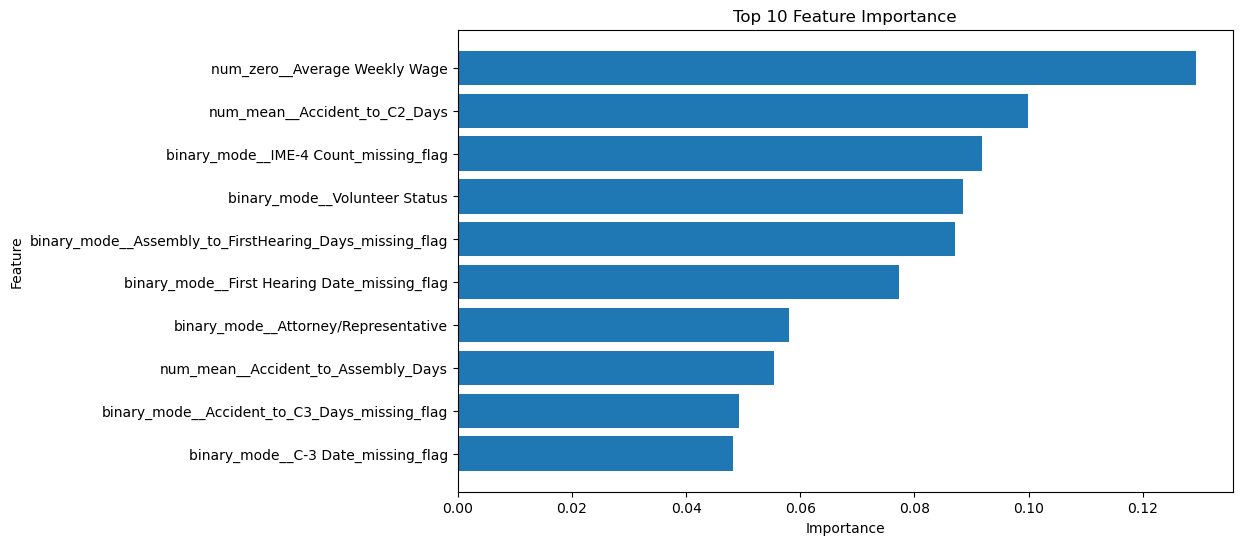

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the classifier
feature_importances = chosen_model.named_steps['classifier'].feature_importances_

# Extract feature names from the preprocessor
preprocessed_features = chosen_model.named_steps['preprocessor'].get_feature_names_out()

# Map feature importances to feature names
importance_df = pd.DataFrame({'Feature': preprocessed_features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Feature Importance Analysis

1. **Top Feature:**
   - **`Average Weekly Wage`** is the most important predictor, likely because income levels influence claim characteristics.

2. **Key Patterns:**
   - **Time-related features** like `Accident to C2 Days` and `Accident to Assembly Days` significantly impact predictions, indicating procedural timelines play a critical role.
   - **Missing data flags** (e.g., `IME-4 Count_missing_flag`, `C-3 Date_missing_flag`) are highly influential, showing that the presence or absence of information is predictive.

3. **Human Factors:**
   - Features like **Volunteer Status** and **Attorney/Representative** reflect the impact of personal and procedural factors on claims.

4. **General Insights:**
   - Missing data and administrative delays strongly correlate with claim outcomes, highlighting the importance of data completeness and timelines.

**6.2. SHAP Analysis**

In [137]:
shap.initjs()

In [138]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Data setup
df_full = base_df.copy()  # Replace 'base_df' with your actual DataFrame variable

# Features and target
y = df_full['Claim Injury Type']
X = df_full.drop(columns=['Claim Injury Type'])

# Preprocessing pipeline setup
numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

categorical_features = ['WCIO Cause of Injury Code', 'Gender']

preprocessor = Pipeline(steps=[
    ('column_transformer', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='median'), numerical_features[:1]),
            ('num_zero', SimpleImputer(strategy='constant', fill_value=0), numerical_features[1:2]),
            ('num_mean', SimpleImputer(strategy='mean'), numerical_features[2:]),
            ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
            ]), categorical_features)
        ]
    )),
    ('scaler', MinMaxScaler())
])

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, 
                                          min_samples_leaf=3, random_state=42, class_weight='balanced'))
])

# Train the pipeline
pipeline.fit(X, y)

# SHAP explanation setup
explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])

# Preprocess the data
X_preprocessed = pipeline.named_steps['preprocessor'].transform(X)

# Stratified sampling for a balanced class distribution
sample_size = 3000
_, X_sampled, _, y_sampled = train_test_split(
    X_preprocessed, y, stratify=y, test_size=sample_size / len(y), random_state=42
)

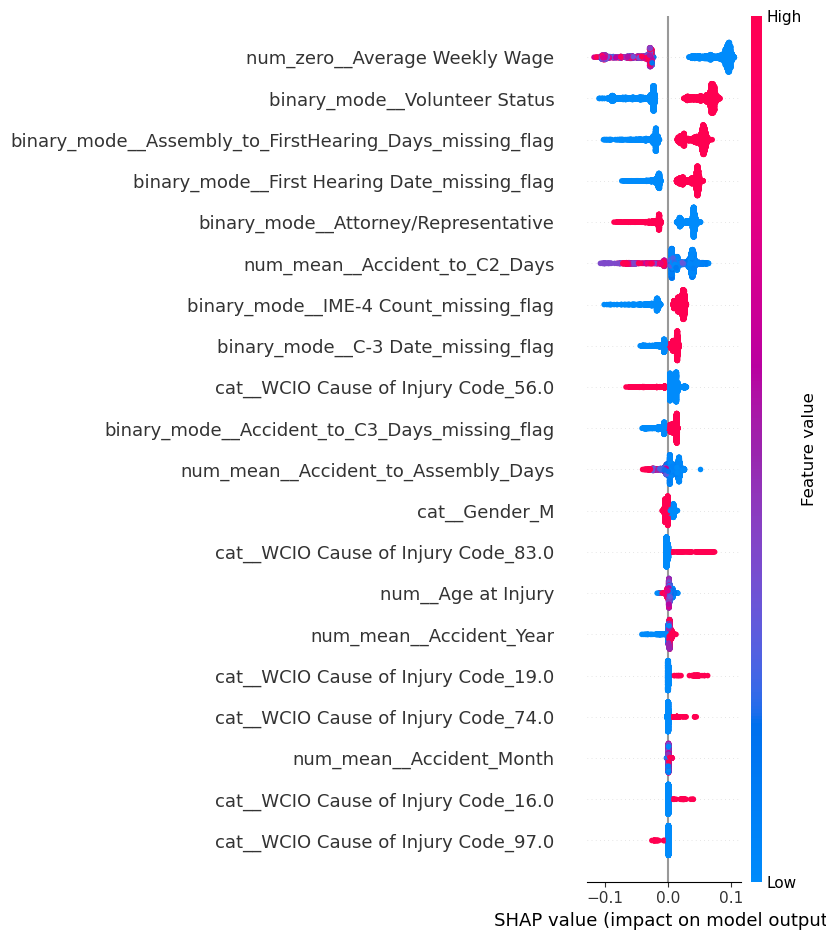

In [139]:
# Compute SHAP values for the balanced subsample
shap_values = explainer.shap_values(X_sampled)

# Visualizations
# Summary plot (global explanation for the subsample)
shap.summary_plot(
    shap_values[1], 
    X_sampled, 
    feature_names=pipeline.named_steps['preprocessor'].named_steps['column_transformer'].get_feature_names_out()
)

# Force plot (local explanation for the first prediction in the subsample)
shap.force_plot(
    explainer.expected_value[1], 
    shap_values[1][0], 
    X_sampled[0], 
    feature_names=pipeline.named_steps['preprocessor'].named_steps['column_transformer'].get_feature_names_out()
)

### Analysis of SHAP Summary Plot

#### **1. Feature Importance**
- The features are ranked by their importance (most important at the top). Importance is determined by the magnitude of SHAP values, which represent how much each feature contributes to the model’s predictions.
- **Top 5 Features:**
  1. **`num_zero__Average Weekly Wage`**
  2. **`binary_mode__Volunteer Status`**
  3. **`binary_mode__Assembly_to_FirstHearing_Days_missing_flag`**
  4. **`binary_mode__First Hearing Date_missing_flag`**
  5. **`binary_mode__Attorney/Representative`**

---

#### **2. SHAP Value Distribution (X-Axis)**
- **Positive SHAP Values (Right):** These features push the prediction toward the positive class (e.g., higher likelihood of a specific outcome in your `Claim Injury Type` target).
- **Negative SHAP Values (Left):** These features push the prediction toward the negative class (lower likelihood of a specific outcome).

---

#### **3. Feature Value (Color Coding)**
- **Red Dots (High Feature Value):** High values of the feature.
- **Blue Dots (Low Feature Value):** Low values of the feature.

---

#### **4. Feature-Specific Analysis**

##### **a. `num_zero__Average Weekly Wage`**
- **Impact:** The most critical feature. High values (red) push the prediction positively, while low values (blue) push it negatively.
- **Interpretation:** Higher wages might be associated with specific types of claims or more severe claims. Lower wages tend to reduce the likelihood of certain outcomes.

##### **b. `binary_mode__Volunteer Status`**
- **Impact:** If the claimant is a volunteer (high value, red), the prediction shifts positively. Non-volunteers (low value, blue) negatively influence the prediction.
- **Interpretation:** Volunteer status could be tied to specific claim characteristics, reflecting differences in injury types or claim handling.

##### **c. `binary_mode__Assembly_to_FirstHearing_Days_missing_flag`**
- **Impact:** Missing values (red) have a strong positive effect, while non-missing values (blue) have a neutral or negative effect.
- **Interpretation:** Missing data in this feature is highly predictive and may correlate with procedural delays or specific claim outcomes.

##### **d. `binary_mode__First Hearing Date_missing_flag`**
- **Impact:** Similarly, missing this field (red) increases the prediction probability, while non-missing values (blue) reduce it.
- **Interprettion:** Missing hearing dates may signal a specific claim status or complexity.

##### **e. `binary_mode__Attorney/Representative`**
- **Impact:** If the claimant has legal representation (red), it positively affects the prediction. The absence of legal representation (blue) has the opposite effect.
- **Interpretation:** Legal representation could be associated with more complex or severe claims.

##### **f. `num_mean__Accident_to_C2_Days`**
- **Impact:** Shorter times from accident to C-2 filing (blue) reduce predictions, while longer times (red) increase them.
- **Interpretation:** Delayed filings might correlate with specific claim types or administrative processes.

---

#### **5. Broader Observations**
- **Missing Data:** Features with `_missing_flag` indicate that missing values are highly predictive. This suggests missingness itself carries critical information about the claims.
- **Categorical Variables:** Encoded features like `cat__WCIO Cause of Injury Code_*` have lesser, but still notable, contributions. They add fine-grained details to predictions.
- **Procedural Timelines:** Features like `Accident_to_C2_Days` and `Accident_to_Assembly_Days` reflect the importance of procedural timings in predicting claim outcomes.

---

### Summary
- **Top Features:** Procedural timelines, volunteer status, legal representation, and wage levels are the most influential.
- **Role of Missing Data:** Missing flags (e.g., for hearing dates) are highly predictive, indicating that missingness correlates with specific claim types.
- **Actionable Insights:**
  - Improve data collection processes to reduce missing values.
  - Investigate high-impact features like "Average Weekly Wage" and "Volunteer Status" to refine understanding and possibly improve feature engineering.

# **7. Final model training and predictions for test data**

**7.1. Best Model full training**

In [242]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

# Use the entire dataset without sampling
df_full = base_df.copy()

# List of feature sets
numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year']

binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag', 
                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Numerical features
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), numerical_features),
        # Binary flag features
        ('binary_mode', SimpleImputer(strategy='most_frequent'), binary_flag_features),
        # Categorical features
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ]
)

# Define the model pipeline
full_train_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=1500, max_depth=17, min_samples_split=5, 
                                          min_samples_leaf=3, random_state=42, class_weight='balanced'))
])

# Define target and features
y = df_full['Claim Injury Type']
X = df_full.drop(columns=['Claim Injury Type'])

# Train the model on the entire dataset
full_train_model.fit(X, y)

# Predict on the training set
y_pred = full_train_model.predict(X)

In [243]:
full_train_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age at Injury',
                                                   'Average Weekly Wage',
                                                   'Accident_to_Assembly_Days',
                                                   'Accident_to_C2_Days',
                                                   'Accident_Month',
                                                   'Accident_Year']),
                                                 ('binary_mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['IME-4 Count_mi...
                                                   'Attorney/Representative']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['WCIO Cause of Injury Code',
                                                   'Gender'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=17,
                                        min_samples_leaf=3, min_samples_split=5,
                                        n_estimators=1500, random_state=42))])

**7.2. Prepararing the test data**

In [244]:
test_df = pd.read_csv('test_data.csv')
test_df.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1


In [245]:
test_df.set_index('Claim Identifier', inplace=True)

test_df['Attorney/Representative'] = test_df['Attorney/Representative'].replace({'N': 0, 'Y': 1})

test_df['Gender'] = test_df['Gender'].replace("X", "U")

test_df['Accident Date'] = pd.to_datetime(test_df['Accident Date'], errors='coerce')
test_df['Assembly Date'] = pd.to_datetime(test_df['Assembly Date'], errors='coerce')
    
# Calculate 'Accident_to_Assembly_Days' as the difference in days
test_df['Accident_to_Assembly_Days'] = (test_df['Assembly Date'] - test_df['Accident Date']).dt.days

# Extract month and year from 'Accident Date'
test_df['Accident_Month'] = test_df['Accident Date'].dt.month
test_df['Accident_Year'] = test_df['Accident Date'].dt.year

test_df['C-2 Date'] = pd.to_datetime(test_df['C-2 Date'], errors='coerce')    
# Calculate 'Accident_to_C2_Days' as the difference in days
test_df['Accident_to_C2_Days'] = (test_df['C-2 Date'] - test_df['Accident Date']).dt.days

# Create 'IME-4 Count_missing_flag' as a binary indicator of missing values in 'IME-4 Count'
test_df['IME-4 Count_missing_flag'] = test_df['IME-4 Count'].isnull().astype(int)


test_df['C-3 Date'] = pd.to_datetime(test_df['C-3 Date'], errors='coerce')
# Calculate 'Accident_to_C3_Days' as the difference in days
test_df['Accident_to_C3_Days'] = (test_df['C-3 Date'] - test_df['Accident Date']).dt.days


missing_flag_columns = [
    'First Hearing Date', 'Assembly_to_FirstHearing_Days', 'Accident_to_C3_Days', 'C-3 Date'
]

for col in missing_flag_columns:
    if col in test_df.columns:
        test_df[f'{col}_missing_flag'] = test_df[col].isnull().astype(int)


test_df['Accident_DayOfWeek'] = test_df['Accident Date'].dt.dayofweek


test_df['Volunteer Status'] = (test_df['Average Weekly Wage'] == 0).astype(int)

test_df['First Hearing Date'] = pd.to_datetime(test_df['First Hearing Date'], errors='coerce')
# Calculate 'Assembly_to_FirstHearing_Days' as the difference in days
test_df['Assembly_to_FirstHearing_Days'] = (test_df['First Hearing Date'] - test_df['Assembly Date']).dt.days


test_df['Assembly_to_FirstHearing_Days_missing_flag'] = test_df['Assembly_to_FirstHearing_Days'].isnull().astype(int)

In [246]:
numerical_features = ['Age at Injury', 'Average Weekly Wage', 'Accident_to_Assembly_Days', 
                      'Accident_to_C2_Days', 'Accident_Month', 'Accident_Year', 'Accident_DayOfWeek']

binary_flag_features = ['IME-4 Count_missing_flag', 'First Hearing Date_missing_flag',
                        'Assembly_to_FirstHearing_Days_missing_flag', 'Accident_to_C3_Days_missing_flag', 
                        'C-3 Date_missing_flag', 'Volunteer Status', 'Attorney/Representative']

categorical_features = ['WCIO Cause of Injury Code', 'Gender']

# Combine all features to keep
features_to_keep = numerical_features + binary_flag_features + categorical_features

# Filter `test_df` by selecting only the columns that are both in `features_to_keep` and exist in `test_df`
test_df_filtered = test_df[test_df.columns.intersection(features_to_keep)]

test_df_filtered.head(2)

,Age at Injury,Attorney/Representative,Average Weekly Wage,Gender,WCIO Cause of Injury Code,Accident_to_Assembly_Days,Accident_Month,Accident_Year,Accident_to_C2_Days,IME-4 Count_missing_flag,First Hearing Date_missing_flag,Accident_to_C3_Days_missing_flag,C-3 Date_missing_flag,Accident_DayOfWeek,Volunteer Status,Assembly_to_FirstHearing_Days_missing_flag
Claim Identifier,,,,,,,,,,,,,,,,
6165911,19,0,NaN,M,31.0,9.0,12.0,2022.0,9.0,1,1,1,1,5.0,0,1
6166141,19,0,NaN,F,75.0,43.0,11.0,2022.0,43.0,1,1,1,1,6.0,0,1


**7.3. Getting predictions**

In [247]:
predictions = full_train_model.predict(test_df_filtered)

print("Predictions:", predictions)

Predictions: ['3. MED ONLY' '3. MED ONLY' '2. NON-COMP' ... '1. CANCELLED'
 '1. CANCELLED' '1. CANCELLED']


In [248]:
#list(predictions)

In [249]:
test_df_filtered['Predicted Claim Injury Type'] = predictions


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [250]:
predictions_df = pd.DataFrame({
    'Claim Identifier': test_df_filtered.index,
    'Predicted Claim Injury Type': predictions
})

In [251]:
predictions_df

,Claim Identifier,Predicted Claim Injury Type
0,6165911,3. MED ONLY
1,6166141,3. MED ONLY
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,3. MED ONLY
387971,6553119,1. CANCELLED
387972,6553542,1. CANCELLED
387973,6553455,1. CANCELLED


In [252]:
# Specify the file name
file_name = "predictions_df.csv"

# Export the DataFrame to a CSV file
predictions_df.to_csv(file_name, index=False, header=True)

print(f"DataFrame successfully exported to {file_name}")

DataFrame successfully exported to predictions_df.csv
